# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**  
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  

## Изучение данных из файла

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Зададим размер графиков для Seaborn

In [2]:
sns.set(rc={'figure.figsize':(8, 4)})

Сохраним данные в переменную `data`

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None) #отдадим команду pandas отображать все столбцы

In [4]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0         51.0      8          NaN   False   
1             NaN          11.0         18.6      1          NaN   False   
2             NaN           5.0         34.3      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0         32.0     13          NaN   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0      False          25.0      NaN  Санкт-Петербург           18863.0   
1      False          11.0      2.0   посёлок Шушары           12817.0   
2      False           8.3      0.0  Санкт-Петербург           21741.0   
3      False           NaN      0.0  Санкт-Петербург           28098.0   
4      False          41.0      NaN  Санкт-Петербург           31856.0   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0               1.0          482.0               2.0   
1              18603.0               0.0            NaN               0.0   
2              13933.0               1.0           90.0               2.0   
3               6800.0               2.0           84.0               3.0   
4               8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Выведем количество и названия столцов, содержащих пропущенные значения. Сохраним их в переменную `nan_columns`.

In [6]:
nan_columns = data.columns[data.isna().sum() > 1] #Список (массив) наименования стобцов с пропущенными значениями.

nan_columns_count = pd.DataFrame(data[nan_columns].isna().sum(), #Создадим датафрейм, в котором отобразим список столбцов
                                 columns=['count'])              #с пропущенными значениями, их количество.
nan_columns_count['% of all'] = nan_columns_count['count'] / data.shape[0] #И также отобразим их долю от общего количества строк.

print(f'Количество столбцов с пропущенными значениями: {len(nan_columns)}')
print(nan_columns_count.sort_values(by='count',
                                    ascending=False)) #Выведем таблицу в порядке убывания количества пропущенных значений

Количество столбцов с пропущенными значениями: 14
                     count  % of all
is_apartment         20924  0.882906
parks_nearest        15620  0.659100
ponds_nearest        14589  0.615596
balcony              11519  0.486054
ceiling_height        9195  0.387991
airports_nearest      5542  0.233850
cityCenters_nearest   5519  0.232879
parks_around3000      5518  0.232837
ponds_around3000      5518  0.232837
days_exposition       3181  0.134225
kitchen_area          2278  0.096122
living_area           1903  0.080299
floors_total            86  0.003629
locality_name           49  0.002068


Посмотрим, какие данные храянтся с типом **object** и что с ними можно сделать.

In [7]:
data.select_dtypes('object').head()

first_day_exposition is_apartment    locality_name
0  2019-03-07T00:00:00          NaN  Санкт-Петербург
1  2018-12-04T00:00:00          NaN   посёлок Шушары
2  2015-08-20T00:00:00          NaN  Санкт-Петербург
3  2015-07-24T00:00:00          NaN  Санкт-Петербург
4  2018-06-19T00:00:00          NaN  Санкт-Петербург

В типе **object** хранится:  
- first_day_exposition (дата публикации) - переведем ее в формат datetime
- is_apartment - переведем его в формат int, со значениями 1 и 0
- Название населённого пункта - оставим в таком формате.

Проверим стобец `locality_name` на наличие неявных дубликатов

In [8]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Сложно анализировать такое большое количество наименований, однако даже невооруженным взглядом видны неявные дубликаты по типу "посёлок Пансионат Зелёный Бор" и "поселок Пансионат Зелёный Бор", "посёлок Мурино"-"поселок Мурино"-"Мурино" и тд.  
Будем от них избавляться на этапе предобработки

Посмотрим, есть ли явные дубликаты на данном этапе.

In [9]:
data.duplicated().sum()

0

Явных дубликатов на данном этапе не выявлено.

В каких еще столбцах следует изменить формат данных? Отфильтруем данные по каждому из оставшихся типов и изучим их по отдельности.

Изучим булевые столбцы

In [10]:
data.select_dtypes('bool').head()

studio  open_plan
0   False      False
1   False      False
2   False      False
3   False      False
4   False      False

**Вывод**: Возможно, для построения гистограм нам будет удобнее переименовать "True-False" в числовой формат "1-0"

Изучим столбцы `int64`

In [11]:
data.select_dtypes('int64').head()

total_images  rooms  floor
0            20      3      8
1             7      1      1
2            10      2      4
3             0      3      9
4             2      2     13

**Вывод**: Здесь все в порядке. Можно их перевести в формат `int8` с целью оптимизации использования памяти. Но в целом, не критично

In [12]:
data.select_dtypes('float64').tail()

last_price  total_area  ceiling_height  floors_total  living_area  \
23694   9700000.0      133.81             3.7           5.0         73.3   
23695   3100000.0       59.00             NaN           5.0         38.0   
23696   2500000.0       56.70             NaN           3.0         29.7   
23697  11475000.0       76.75             3.0          17.0          NaN   
23698   1350000.0       32.30             2.5           5.0         12.3   

       kitchen_area  balcony  airports_nearest  cityCenters_nearest  \
23694         13.83      NaN           24665.0               4232.0   
23695          8.50      NaN               NaN                  NaN   
23696           NaN      NaN               NaN                  NaN   
23697         23.30      2.0           39140.0              10364.0   
23698          9.00      NaN               NaN                  NaN   

       parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
23694               1.0          796.0               3.0          381.0   
23695               NaN            NaN               NaN            NaN   
23696               NaN            NaN               NaN            NaN   
23697               2.0          173.0               3.0          196.0   
23698               NaN            NaN               NaN            NaN   

       days_exposition  
23694              NaN  
23695             45.0  
23696              NaN  
23697            602.0  
23698              NaN

In [13]:
data.days_exposition.unique()

array([  nan,   81.,  558., ..., 1360., 1007.,  971.])

- last_price - можно перевести в `int`
- total_area - можно для удобства округлить в ближайшую сторону и перевести в `int`
- floors_total - переведем в `int`
- balcony - переведем в `int`
- airports_nearest, cityCenters_nearest - переведем в `int`
- parks_around3000, ponds_around3000 - переведем в `int`
- parks_nearest, ponds_nearest - можно для удобства округлить в ближайшую сторону и перевести в `int`
- days_exposition - переведем в `int`
---
- living_area, kitchen_area - оставим `float`
- ceiling_height - можно оставить `float`

### Вывод

В данных имеются:
- Пропущенные значения (14 столбцов)
- Столбцы, в которых стоит изменить формат хранения данных.
- Неявные дубликаты (в стобце `locality_name`)

## Предобработка данных

На этом шаге мы:
- Заполним пропущенные значения
- Изменим формат данных там, где это необходимо
- Избавимся от неявных дубликатов

### Избавление от неявных дубликатов в столбце `locality_name`

Ознакомимся со списком населенных пунктов.

In [14]:
data.locality_name.unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Можно заметить, что все наименования типа населенного пункта (деревня, поселок и тд) начинаются с маленькой буквы, в то время как сами наименования - с заглавной. Важно также отметить, что после слова с заглавной буквой могут идти цифры (Платформа 69-й километр)

Избавимся от наименования типа населенного пункта.

Зададим функцию, которая будет принимать на вход строку и выдавать на выходе обновленную строку. Функция будет содержать цикл, внутри которого мы будем брать каждый символ строки, если этот символ не является заглавным или если это пробел - символ будет удаляться (`str.lstrip()`). Как только цикл дойдет до первой заглавной буквы - цикл останавливается и возвращается новая строка.

In [15]:
def shorten(string):
    try:
        for i in string:
            if i != i.capitalize() or i == ' ': 
                string = string.lstrip(i)       #удаляем символ, если это строчная буква либо пробел.
            else:
                break       #в ином случае - мы попали на заглавную букву, здесь мы выходим из цикла.
    except:
        string = 'no_name'  #добавим блок, который обработает nan значения
    return string           #возвращаем измененную строку.

Проверим функцию на всех уникальных значениях столбца `locality_name`

In [16]:
test = pd.Series(data.locality_name.unique())
print('Уникальных значений в столбце locality_name до предобработки', len(data.locality_name.unique()))

Уникальных значений в столбце locality_name до предобработки 365


In [17]:
test_after_pp = test.apply(shorten)

Выведем значения отсортированным списком.

In [18]:
test_after_pp_list = list(test_after_pp.unique())
sorted(test_after_pp_list)

['no_name',
 'Агалатово',
 'Александровская',
 'Алексеевка',
 'Аннино',
 'Аро',
 'Барышево',
 'Батово',
 'Бегуницы',
 'Белогорка',
 'Белоостров',
 'Бокситогорск',
 'Большая Вруда',
 'Большая Ижора',
 'Большая Пустомержа',
 'Большие Колпаны',
 'Большое Рейзино',
 'Большой Сабск',
 'Бор',
 'Борисова Грива',
 'Бугры',
 'Будогощь',
 'Ваганово',
 'Важины',
 'Вартемяги',
 'Вахнова Кара',
 'Вещево',
 'Виллози',
 'Вознесенье',
 'Возрождение',
 'Войсковицы',
 'Войскорово',
 'Володарское',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Вырица',
 'Выскатка',
 'Высокоключевой',
 'Высоцк',
 'Гаврилово',
 'Гарболово',
 'Гатчина',
 'Гладкое',
 'Глажево',
 'Глебычево',
 'Глинка',
 'Гончарово',
 'Горбунки',
 'Гостилицы',
 'Громово',
 'Дзержинского',
 'Дружная Горка',
 'Дружноселье',
 'Дубровка',
 'Елизаветино',
 'Ефимовский',
 'Жилгородок',
 'Жилпосёлок',
 'Житково',
 'Заводской',
 'Заклинье',
 'Заневка',
 'Запорожское',
 'Зеленогорск',
 'Зимитицы',
 'Ивангород',
 'Извара',
 'Ильичёво',
 'Иссад',


In [19]:
print('Уникальных значений locality_name после предобработки', len(test_after_pp_list))
print('Мы сократили список уникальных значений с', len(data.locality_name.unique()), 'до', len(test_after_pp_list), 'значений')

Уникальных значений locality_name после предобработки 306
Мы сократили список уникальных значений с 365 до 306 значений


Важно отметить, что в течение этого процесса мы избавились от пропусков в данном столбце, заменив значения на "no_name"

Теперь применим функцию к стобцу `locality_name` датафрейма.

In [20]:
data.locality_name = data.locality_name.apply(shorten)

len(data.locality_name.unique())
print('Уникальных значений в столбце locality_name после предобработки', len(data.locality_name.unique()))

Уникальных значений в столбце locality_name после предобработки 306


Видим, что количество уникальных значений изменилось. Теперь данный столец можно использовать для группировки данных и анализа.

### Заполнение пропущенных значений

Пойдем по порядку. Вспомним, в каких стобцах у нас встречаются пропущенные значения:

In [21]:
nan_columns_count

count  % of all
ceiling_height        9195  0.387991
floors_total            86  0.003629
living_area           1903  0.080299
is_apartment         20924  0.882906
kitchen_area          2278  0.096122
balcony              11519  0.486054
locality_name           49  0.002068
airports_nearest      5542  0.233850
cityCenters_nearest   5519  0.232879
parks_around3000      5518  0.232837
parks_nearest        15620  0.659100
ponds_around3000      5518  0.232837
ponds_nearest        14589  0.615596
days_exposition       3181  0.134225

#### Столбец `ceiling_height`. Высота потолков

Изучим, какие значения принимают величины из `ceiling_height`

In [22]:
data.ceiling_height.describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Минимальная высота - 1 метр.  
Максимальная - 100 метров. Похоже на выброс.  
Средняя и медиана - 2,77м и 2,65м

Посмотрим, как выглядит расределение значений высоты потолков.

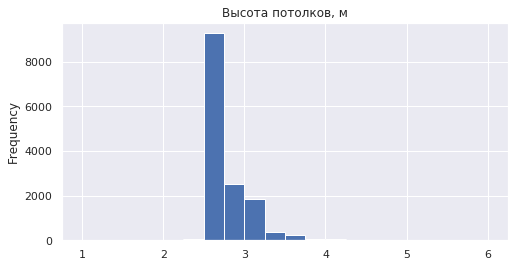

In [23]:
data['ceiling_height'].plot(kind='hist', bins=20, range=(1, 6), title='Высота потолков, м');

Действительно, пик приходится на значения 2,5м - 3м.

Посмотрим, коррелирует ли высота потолков с каким-либо иным признаком в данных.

In [24]:
data.corr()['ceiling_height']

total_images          -0.001987
last_price             0.085430
total_area             0.095490
rooms                  0.054457
ceiling_height         1.000000
floors_total          -0.028732
living_area            0.090650
floor                 -0.011798
studio                 0.001674
open_plan              0.042777
kitchen_area           0.087641
balcony                0.040523
airports_nearest      -0.023947
cityCenters_nearest   -0.091689
parks_around3000       0.065915
parks_nearest         -0.019167
ponds_around3000       0.078209
ponds_nearest         -0.059090
days_exposition        0.019091
Name: ceiling_height, dtype: float64

Очевидных линейных корреляций нет.

Не смотря на то, что количество объектов недвижимости с высотой потолков 2,5 - 3 м преобладает, разумнее всего будет оставить в данном столбце пропуски. Если мы заполним 9000 значений медианной, мы сильно исказим распределение в сторону медианы. Это будет искажать наши дальнейшие статистические выводы относительно высоты потолков. Гораздо лучше будет проанализировать имеющиеся значения.

#### Столбец` floors_total`. Количество этажей, всего

Посмотрим на срез с пропущенными данными в столбце `floors_total`

In [33]:
data[(data.floors_total.isna())].head()

total_images  last_price  total_area first_day_exposition  rooms  \
186             12  11640000.0        65.2  2018-10-02T00:00:00      2   
237              4   2438033.0        28.1  2016-11-23T00:00:00      1   
457              4   9788348.0        70.8  2015-08-01T00:00:00      2   
671              4   6051191.0        93.6  2017-04-06T00:00:00      3   
1757             5   3600000.0        39.0  2017-04-22T00:00:00      1   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
186              NaN           NaN        30.80      4          NaN   False   
237              NaN           NaN        20.75      1          NaN   False   
457              NaN           NaN        38.40     12          NaN   False   
671              NaN           NaN        47.10      8          NaN   False   
1757             NaN           NaN          NaN      9          NaN   False   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
186       False         12.00      NaN  Санкт-Петербург           39197.0   
237       False           NaN      0.0  Санкт-Петербург           22041.0   
457       False         10.63      0.0  Санкт-Петербург           37364.0   
671       False         16.80      0.0  Санкт-Петербург           22041.0   
1757      False           NaN      0.0  Санкт-Петербург           22735.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
186               12373.0               1.0          123.0               0.0   
237               17369.0               0.0            NaN               1.0   
457                8322.0               2.0          309.0               2.0   
671               17369.0               0.0            NaN               1.0   
1757              11618.0               1.0          835.0               1.0   

      ponds_nearest  days_exposition  
186             NaN             49.0  
237           374.0            251.0  
457           706.0            727.0  
671           374.0            123.0  
1757          652.0             77.0

Посмотрим как распределены значения в данном столбце

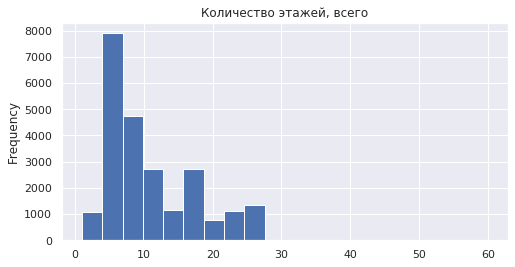

In [34]:
data.floors_total.plot(kind='hist', bins=20, title='Количество этажей, всего');

Видим пик в районе 8-9 этажа. Однако имеется достаточно тяжелый хвост справа, что говорит о том, что достаточно большое количество зданий содержат большее количество этажей.

Посмотрим описание данных.

In [35]:
data.describe().floors_total

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

Действительно, медиана сообщает нам о том, что среднее число этаже для домов из выгрузки - это 9.  
Однако, мы скорее всего не сможем импользовать это число для заполнение пропусков. Посмотрим, как распределены значения из столбца `floor` в полученном срезе с пропусками.

In [36]:
data[data.floors_total.isna()].floor.describe()

count    86.000000
mean     10.023256
std       6.210005
min       1.000000
25%       5.000000
50%       8.000000
75%      13.750000
max      24.000000
Name: floor, dtype: float64

Можно увидеть, что 50% квартир находятся на меньшем чем 8-м этаже. Однако максимальный этаж, на котором находится квартира в данном срезе - 24. Значит мы точно не можем использовать медианное значение для заполнения пропусков в данном случае.

Посмотрим, есть ли корреляция данного столбца с остальными столбцами в таблице.

In [37]:
data.corr().floors_total

total_images           0.010427
last_price            -0.006984
total_area            -0.075774
rooms                 -0.228215
ceiling_height        -0.028732
floors_total           1.000000
living_area           -0.169311
floor                  0.678059
studio                 0.070151
open_plan              0.050791
kitchen_area           0.163944
balcony                0.194065
airports_nearest       0.108288
cityCenters_nearest    0.019774
parks_around3000      -0.252833
parks_nearest          0.097527
ponds_around3000      -0.122735
ponds_nearest          0.038864
days_exposition       -0.052234
Name: floors_total, dtype: float64

Интересно, что есть небольшая корреляция между этажом, на котором расположена квартира, и количеством этажей в этом доме.

Однако в данном столбце мы сохраним пропуски. Так как неточное его заполнение может привести к искажению выводов, когда речь пойдет о квартирах, расположенных на последнем этаже.

#### Столбец `living_area`

In [38]:
data[data.living_area.isna()].head()

total_images  last_price  total_area first_day_exposition  rooms  \
3              0  64900000.0       159.0  2015-07-24T00:00:00      3   
7              5   7915000.0        71.6  2019-04-18T00:00:00      2   
30            12   2200000.0        32.8  2018-02-19T00:00:00      1   
37            10   1990000.0        45.8  2017-10-28T00:00:00      2   
44            13   5350000.0        40.0  2018-11-18T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
3              NaN          14.0          NaN      9          NaN   False   
7              NaN          24.0          NaN     22          NaN   False   
30             NaN           9.0          NaN      2          NaN   False   
37             2.5           5.0          NaN      1          NaN   False   
44             NaN          22.0          NaN      3          NaN   False   

    open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
3       False           NaN      0.0  Санкт-Петербург           28098.0   
7       False          18.9      2.0  Санкт-Петербург           23982.0   
30      False           NaN      NaN         Коммунар               NaN   
37      False           NaN      NaN      Красный Бор               NaN   
44      False           NaN      1.0  Санкт-Петербург           30471.0   

    cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
3                6800.0               2.0           84.0               3.0   
7               11634.0               0.0            NaN               0.0   
30                  NaN               NaN            NaN               NaN   
37                  NaN               NaN            NaN               NaN   
44              11603.0               1.0          620.0               1.0   

    ponds_nearest  days_exposition  
3           234.0            424.0  
7             NaN              NaN  
30            NaN             63.0  
37            NaN            196.0  
44         1152.0              NaN

Посмотрим, есть ли корреляция данного столбца с остальными признаками в таблице.

In [39]:
data.corr().living_area

total_images           0.104780
last_price             0.566492
total_area             0.939537
rooms                  0.845977
ceiling_height         0.090650
floors_total          -0.169311
living_area            1.000000
floor                 -0.097210
studio                -0.056231
open_plan             -0.033711
kitchen_area           0.428674
balcony                0.018849
airports_nearest      -0.057912
cityCenters_nearest   -0.231368
parks_around3000       0.184453
parks_nearest         -0.050167
ponds_around3000       0.148933
ponds_nearest         -0.081674
days_exposition        0.142454
Name: living_area, dtype: float64

Значения столбца `living_area` имеют сильную корреляцию со столбцом `total_area` (Коэффициент = 0,94)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


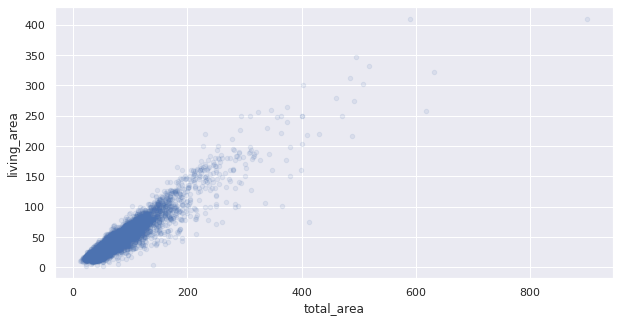

In [40]:
data.plot(kind='scatter', x='total_area', y='living_area', alpha=0.1, figsize=(10, 5));

Наибольшая плотность значений находится на отрезке total_area = 0 - 200 м. Затем, разброс значений увеличивается.

В данном столбце мы также оставим пропуски. Так как значения, которые мы предскажем могут значительно отличаться от реальных показателей.  
Причиной пропусков может являться тот факт, что собственник квартиры просто не захотел измерять жилую площадь, а сразу указал полную.

#### Столбец `is_apartment`

In [46]:
nan_columns_count.loc['is_apartment', ]

count       20924.000000
% of all        0.882906
Name: is_apartment, dtype: float64

Первым прихожит в голову вывод, что человек, который заполнял данные о квартире не отметил ничего в этом столбце так как квартира не является апартаментами.
Однако посмотрим на количество уникальных значений данного столбца.

In [47]:
data.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

По данной логике, из более чем 20000 объявлений о квартирах, всего лишь 50 являются апартаментами. Это кажется маловероятным.  
Возможно, человек не отметил данный пункт в объявлении, потому что посчитал, что знание того факта, что квартира является апартаментами - может отпугнуть потенциальных жильцов. Ведь в апартаментах, к примеру, нельзя прописаться. И решил данный пункт не указывать.  
Рекомендация: стоит сделать данный пункт обязательным для заполнения при размещении объявления.

Данные пропуски мы заполним значением "-1". Тогда, если нам нужно будет отфильтровать только заполненные значения, будет удобно воспользоваться булевым фильтром `is_apartment >= 0`

In [48]:
data['is_apartment'] = data['is_apartment'].fillna(-1) #заполним пропуски

data['is_apartment'].isna().sum() #проверим рещультат заполнения

0

#### Столбец `kitchen_area`. Площадь кухни, кв.м

In [49]:
print(data[(data.kitchen_area.isna())].shape[0])
data[(data.kitchen_area.isna())].head()

2278


total_images  last_price  total_area first_day_exposition  rooms  \
3              0  64900000.0       159.0  2015-07-24T00:00:00      3   
30            12   2200000.0        32.8  2018-02-19T00:00:00      1   
37            10   1990000.0        45.8  2017-10-28T00:00:00      2   
44            13   5350000.0        40.0  2018-11-18T00:00:00      1   
59            15   6300000.0        46.5  2017-03-06T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
3              NaN          14.0          NaN      9           -1   False   
30             NaN           9.0          NaN      2           -1   False   
37             2.5           5.0          NaN      1           -1   False   
44             NaN          22.0          NaN      3           -1   False   
59             NaN          13.0          NaN     13           -1   False   

    open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
3       False           NaN      0.0  Санкт-Петербург           28098.0   
30      False           NaN      NaN         Коммунар               NaN   
37      False           NaN      NaN      Красный Бор               NaN   
44      False           NaN      1.0  Санкт-Петербург           30471.0   
59      False           NaN      NaN  Санкт-Петербург           11125.0   

    cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
3                6800.0               2.0           84.0               3.0   
30                  NaN               NaN            NaN               NaN   
37                  NaN               NaN            NaN               NaN   
44              11603.0               1.0          620.0               1.0   
59              14501.0               0.0            NaN               0.0   

    ponds_nearest  days_exposition  
3           234.0            424.0  
30            NaN             63.0  
37            NaN            196.0  
44         1152.0              NaN  
59            NaN            336.0

В 2278 строках (менее 10% данных) имеются пропуски. Логично предположить, что либо собственник просто решил не указывать площадь кухни, либо это студия, в которой кухня входит в жилую площадь.  
Посмотрим, сколько студий находится в данном срезе.

In [50]:
print(data[(data.kitchen_area.isna()) & (data.studio == True)].shape[0])
data[(data.kitchen_area.isna()) & (data.studio == True)].head()

149


total_images  last_price  total_area first_day_exposition  rooms  \
144             1   2450000.0       27.00  2017-03-30T00:00:00      0   
440             8   2480000.0       27.11  2018-03-12T00:00:00      0   
608             2   1850000.0       25.00  2019-02-20T00:00:00      0   
697            12   2500000.0       24.10  2017-12-01T00:00:00      0   
716             5   1500000.0       17.00  2017-06-07T00:00:00      0   

     ceiling_height  floors_total  living_area  floor is_apartment  studio  \
144             NaN          24.0        15.50      2           -1    True   
440             NaN          17.0        24.75      4           -1    True   
608             NaN          10.0          NaN      7           -1    True   
697            2.75          25.0        17.50     21           -1    True   
716            2.70           9.0        12.00      1           -1    True   

     open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
144      False           NaN      2.0           Мурино               NaN   
440      False           NaN      2.0  Санкт-Петербург           38171.0   
608      False           NaN      NaN           Шушары               NaN   
697      False           NaN      NaN          Кудрово               NaN   
716      False           NaN      0.0           Шушары           18654.0   

     cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
144                  NaN               NaN            NaN               NaN   
440              15015.0               0.0            NaN               2.0   
608                  NaN               NaN            NaN               NaN   
697                  NaN               NaN            NaN               NaN   
716              29846.0               0.0            NaN               0.0   

     ponds_nearest  days_exposition  
144            NaN            181.0  
440          982.0             64.0  
608            NaN             29.0  
697            NaN            201.0  
716            NaN             40.0

Всего лишь 149 объектов из 2278 являются студиями. 

Заменим в них значения на 0, в остальных же придется оставить пропуски.

Посмотрим также, есть ли студии, для которых указана площадь кухния

In [51]:
data[data.studio == True].kitchen_area.unique()

array([nan])

Нет, у студий площадь кухни не указана.

Заменим в студиях значения на 0, в остальных же придется оставить пропуски.

In [52]:
data.loc[(data.kitchen_area.isna()) & (data.studio == True), 'kitchen_area'] = data.loc[(data.kitchen_area.isna()) & 
                                                                                        (data.studio == True), 'kitchen_area'].fillna(0)


Проверим результат заполнения.

In [53]:
print('Количество пропусков в столбце kithen_area в срезе по студиям:', len(data.query('kitchen_area.isna() and studio == True')))
print('Оставшиеся пропуски в столбце kithen_area:', data[data.kitchen_area.isna()].shape[0])

Количество пропусков в столбце kithen_area в срезе по студиям: 0
Оставшиеся пропуски в столбце kithen_area: 2129


Оставшиеся пропуски нам придется оставить без изменений.

#### Столбец `balcony`. Количество балконов.

In [54]:
print(data[data.balcony.isna()].shape[0])
data[data.balcony.isna()].head()

11519


total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0      108.00  2019-03-07T00:00:00      3   
4              2  10000000.0      100.00  2018-06-19T00:00:00      2   
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
10             5   5050000.0       39.60  2017-11-16T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70          16.0        51.00      8           -1   False   
4             3.03          14.0        32.00     13           -1   False   
5              NaN          12.0        14.40      5           -1   False   
8              NaN          27.0        15.43     26           -1   False   
10            2.67          12.0        20.30      3           -1   False   

    open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0       False         25.00      NaN  Санкт-Петербург           18863.0   
4       False         41.00      NaN  Санкт-Петербург           31856.0   
5       False          9.10      NaN          Янино-1               NaN   
8       False          8.81      NaN           Мурино               NaN   
10      False          8.50      NaN  Санкт-Петербург           38357.0   

    cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0               1.0          482.0               2.0   
4                8098.0               2.0          112.0               1.0   
5                   NaN               NaN            NaN               NaN   
8                   NaN               NaN            NaN               NaN   
10              13878.0               1.0          310.0               2.0   

    ponds_nearest  days_exposition  
0           755.0              NaN  
4            48.0            121.0  
5             NaN             55.0  
8             NaN            189.0  
10          553.0            137.0

11519 пропущенных значений. В данном случае логично предположить, что если собственник не указал количество балконов, скорее всего их нет.  
Иначе бы оно было указано, так как наличие балкона добавляет некое преимущество квартире.

Заполним пропущенные значения нулями.

In [56]:
data.loc[:, 'balcony'] = data.loc[:, 'balcony'].fillna(0)

print('Количество пропущенных значений в столбце balcony после предобработки:', data.loc[data.balcony.isna(), ].shape[0])

Количество пропущенных значений в столбце balcony после предобработки: 0


#### Столбец `locality_name`. Название населенного пункта

Помним, что на этапе избавления от неявлных дубликатов, в этом столбце все пропуски были заменены на "no_name".   
Проверим:

In [57]:
print(data[data.locality_name.isna()].shape[0])

0


Отобразим все значения "no_name"

In [58]:
print(data[data.locality_name == 'no_name'].shape[0])
data[data.locality_name == 'no_name'].head()

49


total_images  last_price  total_area first_day_exposition  rooms  \
1097             3   8600000.0        81.7  2016-04-15T00:00:00      3   
2033             6   5398000.0        80.0  2017-05-30T00:00:00      3   
2603            20   3351765.0        42.7  2015-09-20T00:00:00      1   
2632             2   5130593.0        62.4  2015-10-11T00:00:00      2   
3574            10   4200000.0        46.5  2016-05-28T00:00:00      2   

      ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1097            3.55           5.0         50.8      2           -1   False   
2033             NaN           4.0         42.6      2           -1   False   
2603             NaN          24.0         15.6      3           -1   False   
2632             NaN          24.0         33.1     21           -1   False   
3574             NaN           5.0         30.8      5           -1   False   

      open_plan  kitchen_area  balcony locality_name  airports_nearest  \
1097      False           8.8      0.0       no_name           23478.0   
2033      False          18.6      0.0       no_name               NaN   
2603      False          10.7      0.0       no_name           22041.0   
2632      False           8.2      0.0       no_name           22041.0   
3574      False           6.5      0.0       no_name           27419.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1097               4258.0               0.0            NaN               0.0   
2033                  NaN               NaN            NaN               NaN   
2603              17369.0               0.0            NaN               1.0   
2632              17369.0               0.0            NaN               1.0   
3574               8127.0               0.0            NaN               1.0   

      ponds_nearest  days_exposition  
1097            NaN            147.0  
2033            NaN             34.0  
2603          374.0            276.0  
2632          374.0            256.0  
3574          603.0             45.0

49 пропущенных значений. Если эти данные заполнялись автоматически. Возможно, произошел сбой в системе и не удалось определеить местоположение. Возможно, объект недвижимости расположен на какой-то новой локации, которая еще не размечена на картах,, либо же для отмеченной хозяином области карта не смогла подобрать название населенного пункта. Однако не смотря на это, данные по отдаленности от центра либо аэропрорта присутвуют в некоторых строках, что говорит о том, что какая-то точка на карте все же была отмечена хозяином.

Данные значения придется также оставить без изменений, с пропусками. А точнее, со значениями "no_name"

#### Столбец `airports_nearest`. Расстояние до ближайшего аеропорта

In [59]:
print(data[data.airports_nearest.isna()].shape[0])
data[data.airports_nearest.isna()].head(5)

5542


total_images  last_price  total_area first_day_exposition  rooms  \
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
22            20   5000000.0       58.00  2017-04-24T00:00:00      2   
30            12   2200000.0       32.80  2018-02-19T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5              NaN          12.0        14.40      5           -1   False   
8              NaN          27.0        15.43     26           -1   False   
12             NaN           5.0        30.00      5           -1   False   
22            2.75          25.0        30.00     15           -1   False   
30             NaN           9.0          NaN      2           -1   False   

    open_plan  kitchen_area  balcony locality_name  airports_nearest  \
5       False          9.10      0.0       Янино-1               NaN   
8       False          8.81      0.0        Мурино               NaN   
12      False          9.00      0.0     Сертолово               NaN   
22      False         11.00      2.0       Кудрово               NaN   
30      False           NaN      0.0      Коммунар               NaN   

    cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
5                   NaN               NaN            NaN               NaN   
8                   NaN               NaN            NaN               NaN   
12                  NaN               NaN            NaN               NaN   
22                  NaN               NaN            NaN               NaN   
30                  NaN               NaN            NaN               NaN   

    ponds_nearest  days_exposition  
5             NaN             55.0  
8             NaN            189.0  
12            NaN             90.0  
22            NaN             60.0  
30            NaN             63.0

5542 строки с пропущенными значениями относительно расстояния до ближайшего аэропорта.

Можно предоложить, что если взять локации, и к каждой локации найти медианное значение расстояния до ближайшего аеропорта, то будет правдободно. Однако, посмотрим на разброс значений хотя для Санкт-Петербурга.

In [60]:
data.describe().airports_nearest

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Медианное значение - 18,5 км, в то время как максимальное - 84,8 км. Для одного города. Слишком большая разница между этими значениями.

Предположим, мы все же захотим взять такое значение для остальных городов.  
Возьмем местоположение объектов недвижимости с пропущенными значениями в столбце `airports_nearest`. И также возмем местоположения объектов с заполненными значениями в стобце `airports_nearest`. Сравним, для какого количества городов, мы сможем найти совпадающие города.

In [61]:
(
    pd.Series(data[data.airports_nearest.isna()].locality_name.unique()) #уникальные наименования локаций, с отсутвующими значениями в столбце airports_nearest
    .isin
    (pd.Series(data[~data.airports_nearest.isna()].locality_name.unique())) #уникальные наименования локаций, с заполнеными значениями в столбце airports_nearest
    .sum()
)

9

Только для 9-и локаций мы сможем подобрать расстояние до аэропорта, опираясь на среднее значение для схожего города.  
А всего локаций с пропусками в столбце `airports_nearest`:

In [62]:
pd.Series(data[data.airports_nearest.isna()].locality_name.unique())

0             Янино-1
1              Мурино
2           Сертолово
3             Кудрово
4            Коммунар
            ...      
282       Володарское
283            Нижняя
284         Тихковицы
285    Борисова Грива
286      Дзержинского
Length: 287, dtype: object

Всего таких локаций 287

А для скольких локаций имеется информация?

In [63]:
pd.Series(data[~data.airports_nearest.isna()].locality_name.unique())

0     Санкт-Петербург
1              Шушары
2           Парголово
3           Ломоносов
4            Петергоф
5              Пушкин
6             Колпино
7           Кронштадт
8        Металлострой
9            Павловск
10         Сестрорецк
11       Красное Село
12          Понтонный
13        Зеленогорск
14         Молодёжное
15           Стрельна
16    Александровская
17            no_name
18           Песочный
19     Петро-Славянка
20             Репино
21           Сапёрный
22            Щеглово
23          Лисий Нос
24           Левашово
25         Белоостров
26             Мурино
27         Усть-Ижора
dtype: object

Всего лишь для 28 локаций известна информация об удаленности до аэропорта.

В данном столбце также придется оставить пропуски.

#### Столбец `cityCenters_nearest`. Расстояние до центра города

In [64]:
print(data[data.cityCenters_nearest.isna()].shape[0])
data[data.cityCenters_nearest.isna()].head()

5519


total_images  last_price  total_area first_day_exposition  rooms  \
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
22            20   5000000.0       58.00  2017-04-24T00:00:00      2   
30            12   2200000.0       32.80  2018-02-19T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5              NaN          12.0        14.40      5           -1   False   
8              NaN          27.0        15.43     26           -1   False   
12             NaN           5.0        30.00      5           -1   False   
22            2.75          25.0        30.00     15           -1   False   
30             NaN           9.0          NaN      2           -1   False   

    open_plan  kitchen_area  balcony locality_name  airports_nearest  \
5       False          9.10      0.0       Янино-1               NaN   
8       False          8.81      0.0        Мурино               NaN   
12      False          9.00      0.0     Сертолово               NaN   
22      False         11.00      2.0       Кудрово               NaN   
30      False           NaN      0.0      Коммунар               NaN   

    cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
5                   NaN               NaN            NaN               NaN   
8                   NaN               NaN            NaN               NaN   
12                  NaN               NaN            NaN               NaN   
22                  NaN               NaN            NaN               NaN   
30                  NaN               NaN            NaN               NaN   

    ponds_nearest  days_exposition  
5             NaN             55.0  
8             NaN            189.0  
12            NaN             90.0  
22            NaN             60.0  
30            NaN             63.0

Возможно, расстояние до центра указано только для объектов, находищихся в самом городе Санкт-Петербург. Тогда, для него не должно быть пропущенных значений. Проверим эту гипотезу

In [65]:
data[(data.cityCenters_nearest.isna()) & (data.locality_name == 'Санкт-Петербург')].shape[0]

61

Гипотеза опровергнута. Для Санкт-Петербурга также присутвуют пропущенные значения.  

А для каких еще населенных пунктов указано расстояние до центра города?

In [66]:
data[~(data.cityCenters_nearest.isna())].locality_name.unique()

array(['Санкт-Петербург', 'Шушары', 'Парголово', 'Ломоносов', 'Петергоф',
       'Пушкин', 'Колпино', 'Кронштадт', 'Металлострой', 'Павловск',
       'Сестрорецк', 'Красное Село', 'Понтонный', 'Зеленогорск',
       'Молодёжное', 'Стрельна', 'Александровская', 'no_name', 'Песочный',
       'Петро-Славянка', 'Репино', 'Сапёрный', 'Щеглово', 'Лисий Нос',
       'Левашово', 'Белоостров', 'Мурино', 'Усть-Ижора'], dtype=object)

In [67]:
print('Количество населенных пунктов, в которых указано расстояние до центра города:', 
      len(data[~(data.cityCenters_nearest.isna())].locality_name.unique()))

Количество населенных пунктов, в которых указано расстояние до центра города: 28


Может быть, отделенность от центра указана только в объектах не сильно удаленных от центра? Проверим

In [68]:
data[~(data.cityCenters_nearest.isna())].describe().cityCenters_nearest

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Разброс достаточно большой. Среднее расстояние до центра данных объектов недвижимости составляет 14 км, а стандартное отклонение - 8,6 км. При этом наиболее отдаленный объект нахожится на расстоянии практически 66 км от центра.  
Однако, здесь возникает вопрос, что мы считаем за "не сильно отдаленные". Может быть, иные местоположения отдалены еще больше?

Видимо причина пропусков иная. Скорее всего, произошла ошибка при выгрузке данных и расстояние до центра почему то не сохранилось в этих строках. 

Данные строки оставим с пропусками.

Интересно, совпадают ли населенные пункты, для которых в данных указана информация об отдаленности до аэропорта с населенными пунктами, для которых в данных указана информация об отдаленности до центра города. 

In [69]:
               #населенные пункты, для которых известна информация об отдаленности до аэропорта
sum(pd.Series(data[~data.airports_nearest.isna()].locality_name.unique()) == 
                #населенные пункты, для которых известна информация об отдаленности до центра
    pd.Series(data[~(data.cityCenters_nearest.isna())].locality_name.unique())) 


28

28 совпадений из 28-и. Все они действительно совпадают.

Видимо, есть какие-то определнные локации, для которых картографическая система яндекса не смогла определить расстояние до аэопорта и до центра города. Можно задать этот вопрос соответсвующим специалистам и узнать, почему такое может происходить.  
На данном этапе, эти строки оставим с пропусками.

#### Столбец `parks_around3000`. Число парков в радиусе 3 км

In [70]:
print(data[data.parks_around3000.isna()].shape[0])
data[data.parks_around3000.isna()].head()

5518


total_images  last_price  total_area first_day_exposition  rooms  \
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
22            20   5000000.0       58.00  2017-04-24T00:00:00      2   
30            12   2200000.0       32.80  2018-02-19T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5              NaN          12.0        14.40      5           -1   False   
8              NaN          27.0        15.43     26           -1   False   
12             NaN           5.0        30.00      5           -1   False   
22            2.75          25.0        30.00     15           -1   False   
30             NaN           9.0          NaN      2           -1   False   

    open_plan  kitchen_area  balcony locality_name  airports_nearest  \
5       False          9.10      0.0       Янино-1               NaN   
8       False          8.81      0.0        Мурино               NaN   
12      False          9.00      0.0     Сертолово               NaN   
22      False         11.00      2.0       Кудрово               NaN   
30      False           NaN      0.0      Коммунар               NaN   

    cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
5                   NaN               NaN            NaN               NaN   
8                   NaN               NaN            NaN               NaN   
12                  NaN               NaN            NaN               NaN   
22                  NaN               NaN            NaN               NaN   
30                  NaN               NaN            NaN               NaN   

    ponds_nearest  days_exposition  
5             NaN             55.0  
8             NaN            189.0  
12            NaN             90.0  
22            NaN             60.0  
30            NaN             63.0

Вероятнее всего, пропущенные значения предполагают отсутствие парков в диапазоне 3км.  
Посмотрим, на уникальные значения столбца.

In [71]:
data.parks_around3000.unique()

array([ 1.,  0.,  2., nan,  3.])

А также посмотрим, как распределены данные.

In [72]:
data.parks_around3000.value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

Большая часть объектов не имеет ни одного парка в диапазоне 3км.  
Вероятнее всего пропуски появились, в результате ошибки при выгрузке.

Заменим пропущенные данные на 0

In [73]:
data.loc[data.parks_around3000.isna(), 'parks_around3000'] = data.loc[data.parks_around3000.isna(), 'parks_around3000'].fillna(0)

print('Количество пропущенных значений в стобце parks_around3000 после заполнения пропусков:', 
      data.loc[data.parks_around3000.isna(), 'parks_around3000'].shape[0])

Количество пропущенных значений в стобце parks_around3000 после заполнения пропусков: 0


#### Столбец `parks_nearest`. Расстояние до ближайшего парка

In [74]:
print(data[data.parks_nearest.isna()].shape[0])
data[data.parks_nearest.isna()].head()

15620


total_images  last_price  total_area first_day_exposition  rooms  \
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1             NaN          11.0        18.60      1           -1   False   
5             NaN          12.0        14.40      5           -1   False   
6             NaN          26.0        10.60      6           -1   False   
7             NaN          24.0          NaN     22           -1   False   
8             NaN          27.0        15.43     26           -1   False   

   open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
1      False         11.00      2.0           Шушары           12817.0   
5      False          9.10      0.0          Янино-1               NaN   
6      False         14.40      1.0        Парголово           52996.0   
7      False         18.90      2.0  Санкт-Петербург           23982.0   
8      False          8.81      0.0           Мурино               NaN   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1              18603.0               0.0            NaN               0.0   
5                  NaN               0.0            NaN               NaN   
6              19143.0               0.0            NaN               0.0   
7              11634.0               0.0            NaN               0.0   
8                  NaN               0.0            NaN               NaN   

   ponds_nearest  days_exposition  
1            NaN             81.0  
5            NaN             55.0  
6            NaN            155.0  
7            NaN              NaN  
8            NaN            189.0

В части данных, имеются пропуски, так как ближайших парков (в радиусе 3 км) просто нет. В остальной же части данных возможно отсутвуют значения по иным причинам.

Выведем на экран строки, в которых присутвует парк, но не определено до него расстояние.

In [75]:
print(data[(data.parks_nearest.isna()) & (data.parks_around3000 != 0)].shape[0])
data[(data.parks_nearest.isna()) & (data.parks_around3000 != 0)].head()

0


Empty DataFrame
Columns: [total_images, last_price, total_area, first_day_exposition, rooms, ceiling_height, floors_total, living_area, floor, is_apartment, studio, open_plan, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition]
Index: []

Таких строк нет. Это означает, что для всех объектов, имеющих хотя бы 1 парк в радиусе 3 км присутствует расстояние до него.  

А что же с объектами, которые не имеют ни одного парка в близи 3км? Может быть в них как раз таки и содержатся пропуски?

In [76]:
print('Объекты с неуказанным расстоянием до ближайшего парка', len(data[data.parks_nearest.isna()]))
print('Объекты, которые не имеют ни одного парка в радиусе 3км', len(data[data.parks_around3000 == 0]))

Объекты с неуказанным расстоянием до ближайшего парка 15620
Объекты, которые не имеют ни одного парка в радиусе 3км 15624


Получается, есть объекты, которые не имеют ни одного парка в радиусе 3км, но при этом у них указано расстояние до ближайшего парка. И таких объектов всего лишь 4. Для всех остальных объектов, не имеющих в радиусе 3км ни одного парка, мы видим пропущенные значения в столбце `parks_nearest`   
Посмотрим на строки, содержащие такие объекты, а также на разброс значений столбца `parks_nearest` для таких объектов.

In [77]:
data[~(data.parks_nearest.isna()) & (data.parks_around3000 == 0)]

total_images  last_price  total_area first_day_exposition  rooms  \
1590              3   7500000.0        70.0  2017-07-11T00:00:00      2   
10959             9   3000000.0        31.1  2017-03-21T00:00:00      1   
19208            17  14950000.0       187.0  2017-10-12T00:00:00      5   
19430             9   3900000.0        30.5  2018-02-22T00:00:00      1   

       ceiling_height  floors_total  living_area  floor is_apartment  studio  \
1590              NaN          18.0         37.0     13           -1   False   
10959             NaN           5.0         17.7      2           -1   False   
19208             3.0           2.0         80.0      2           -1   False   
19430             2.6           5.0         16.5      1           -1   False   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
1590       False          10.0      0.0  Санкт-Петербург           14878.0   
10959      False           5.5      0.0  Санкт-Петербург           14821.0   
19208      False          17.0      1.0  Санкт-Петербург           36805.0   
19430      False           5.5      0.0  Санкт-Петербург           14821.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
1590                9791.0               0.0         3064.0               1.0   
10959               9734.0               0.0         3190.0               1.0   
19208               8656.0               0.0         3013.0               3.0   
19430               9734.0               0.0         3190.0               1.0   

       ponds_nearest  days_exposition  
1590           264.0              4.0  
10959          431.0            234.0  
19208          537.0             49.0  
19430          431.0            176.0

In [78]:
data[(~data.parks_nearest.isna()) & (data.parks_around3000 == 0)].describe().parks_nearest

count       4.000000
mean     3114.250000
std        89.912457
min      3013.000000
25%      3051.250000
50%      3127.000000
75%      3190.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Все логично. Для объектов, которые не имеют в радиусе 3км ни одного парка, указано расстояние большее 3000м.  
Следовательно, мы можем предположить, что объекты, которые не имеют ни одного парка в радиусе 3км и имеют в стобце `parks_nearest` пропуски, имеют расстояние до парка больше 3000м.  
Так как мы не сможем на основании текущих данных определить какое именно это расстояние, оставим на их месте пропуски.

#### Столбец `ponds_around3000`. Число водоёмов в радиусе 3 км

In [79]:
print(data[data.ponds_around3000.isna()].shape[0])
data[data.ponds_around3000.isna()].head()

5518


total_images  last_price  total_area first_day_exposition  rooms  \
5             10   2890000.0       30.40  2018-09-10T00:00:00      1   
8             20   2900000.0       33.16  2018-05-23T00:00:00      1   
12            10   3890000.0       54.00  2016-06-30T00:00:00      2   
22            20   5000000.0       58.00  2017-04-24T00:00:00      2   
30            12   2200000.0       32.80  2018-02-19T00:00:00      1   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
5              NaN          12.0        14.40      5           -1   False   
8              NaN          27.0        15.43     26           -1   False   
12             NaN           5.0        30.00      5           -1   False   
22            2.75          25.0        30.00     15           -1   False   
30             NaN           9.0          NaN      2           -1   False   

    open_plan  kitchen_area  balcony locality_name  airports_nearest  \
5       False          9.10      0.0       Янино-1               NaN   
8       False          8.81      0.0        Мурино               NaN   
12      False          9.00      0.0     Сертолово               NaN   
22      False         11.00      2.0       Кудрово               NaN   
30      False           NaN      0.0      Коммунар               NaN   

    cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
5                   NaN               0.0            NaN               NaN   
8                   NaN               0.0            NaN               NaN   
12                  NaN               0.0            NaN               NaN   
22                  NaN               0.0            NaN               NaN   
30                  NaN               0.0            NaN               NaN   

    ponds_nearest  days_exposition  
5             NaN             55.0  
8             NaN            189.0  
12            NaN             90.0  
22            NaN             60.0  
30            NaN             63.0

5518 пропущенных значений в столбце `ponds_around3000`

Посмотрим, какие значения есть в этом столбце и с какой частотой они встречаются.

In [80]:
data.ponds_around3000.value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

Наиболее часто встречающееся значение - 0. Мы можем предположить, что пропуски в данном столбце обозначают отсутсвие прудов в радиусе 3 км, аналогично кейсу с наличием парков в радиусе 3км.  
Причиной появления пропусков в данном столбце может служить ошибочное считывание данных при выгрузке, в резудьтате чего некоторые нули заменились на пропуски.  
Пропуски в даном столбце заполним нулями.  

In [81]:
data.loc[data.ponds_around3000.isna(), 'ponds_around3000'] = data.loc[data.ponds_around3000.isna(), 'ponds_around3000'].fillna(0)

print('Количество пропущенных значений в стобце parks_around3000 после заполнения пропусков:', 
      data.loc[data.ponds_around3000.isna()].shape[0])

Количество пропущенных значений в стобце parks_around3000 после заполнения пропусков: 0


#### Столбец `ponds_nearest`. Расстояние до ближайшего водоёма (м)

Проверим, есть ли пропуски в строках с объектами, рядом с которыми расположен хотя бы 1 пруд.

In [82]:
data[(data.ponds_nearest.isna()) & (data.ponds_nearest > 0)].shape[0]

0

Таких строк нет. Следовательно, пропуски находятся в строках с объектами, рядом с которыми в радиусе 3км отсутсвуют пруды.  
Наиболее вероятной причиной появления пропусков в данном столбце по аналогии с появлением пропусков в столбце `parks_nearest` является тот факт, что система при выгрузке не нашла подходящего значения для заполнения.   

Указано ли у нас расстояние до ближайшего пруда для хотя бы для одного объекта, не имеющего в радиусе 3км ни одного пруда?

In [83]:
data[~(data.ponds_nearest.isna()) & (data.ponds_around3000 == 0)].shape[0]

0

Нет, такие объекты отсутствуют.

Судя по всему, ближайший пруд в данном случае считается пруд в радиусе 3000м. Если подобного пруда нет, то картографическая система не задавала никакого значения. И как результат - мы получили пропуски в данных

Данные пропуски мы оставим без заполнений.

#### Столбец `days_exposition`. Сколько дней было размещено объявление (от публикации до снятия)

In [84]:
print(data[data.days_exposition.isna()].shape[0])
data[data.days_exposition.isna()].head()

3181


total_images  last_price  total_area first_day_exposition  rooms  \
0             20  13000000.0       108.0  2019-03-07T00:00:00      3   
7              5   7915000.0        71.6  2019-04-18T00:00:00      2   
44            13   5350000.0        40.0  2018-11-18T00:00:00      1   
45            17   5200000.0        50.6  2018-12-02T00:00:00      2   
46            17   6600000.0        52.1  2019-01-31T00:00:00      2   

    ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0             2.70          16.0         51.0      8           -1   False   
7              NaN          24.0          NaN     22           -1   False   
44             NaN          22.0          NaN      3           -1   False   
45            2.65           9.0         30.3      7           -1   False   
46            2.60          24.0         29.7      9           -1   False   

    open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
0       False          25.0      0.0  Санкт-Петербург           18863.0   
7       False          18.9      2.0  Санкт-Петербург           23982.0   
44      False           NaN      1.0  Санкт-Петербург           30471.0   
45      False           7.0      0.0  Санкт-Петербург           30011.0   
46      False           8.3      2.0  Санкт-Петербург           15114.0   

    cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0               16028.0               1.0          482.0               2.0   
7               11634.0               0.0            NaN               0.0   
44              11603.0               1.0          620.0               1.0   
45              12872.0               0.0            NaN               0.0   
46              12702.0               0.0            NaN               0.0   

    ponds_nearest  days_exposition  
0           755.0              NaN  
7             NaN              NaN  
44         1152.0              NaN  
45            NaN              NaN  
46            NaN              NaN

В столбце `days_exposition` мы имеем 3181 пропуск.

Посмотрим, какие значения принимает данный столбец.

In [85]:
data.describe().days_exposition

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

От 1-го дня до 1580 дней длились продажи объектов.

Может быть, есть какие-то осособые локации, для которых объявления провисели меньше одного дня. Тогда, для большинства локаций, в которых отсутствует срок размещения, не найдется объектов в той же локации с заполненным сроком.

Посмотрим, сколько всего у нас населенных пунктов, в которых для объектов недвижимости не указан срок размещения.

In [86]:
print('Количество населенных пунктов, в которых для объектов недвижимости не указан срок размещения:', len(data[data.days_exposition.isna()].locality_name.unique()))

Количество населенных пунктов, в которых для объектов недвижимости не указан срок размещения: 192


А теперь посмотрим, в скольких из этих 192 населенных пунктов присутствуют объекты недвижимости с указанным сроком размещения.

In [87]:
pd.Series(data[data.days_exposition.isna()].locality_name.unique()).isin(
    pd.Series(data[~data.days_exposition.isna()].locality_name.unique())).sum()

168

В 168 населенных пунктов из 192 присутствуют как объекты с неуказанной длительностью размещения, так и с указанной.
Следовательно, можно предположить, что дело здесь не в населенном пункте.

Можно предположить, что данные объявления провисели меньше одного дня. Иными словами, они были сняты в тот же день, когда были размещены. Можно предположить, что причиной тому явилось какое-либо нарушение в объявлении, в результате которого объявление было снято с публикации в тот же самый день.

Посмотрим, одинаково ли распределены значения по столбцам в срезе данных с пропущенными значениями в столбце `days_exposition` и в срезе данных, в котором значения `days_exposition` присутсвуют. Для этого построим гистограммы для каждого столбца.

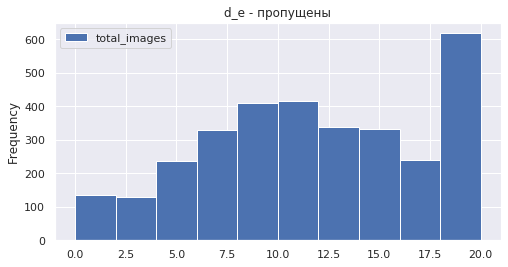

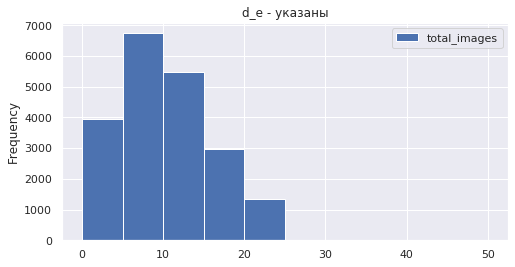

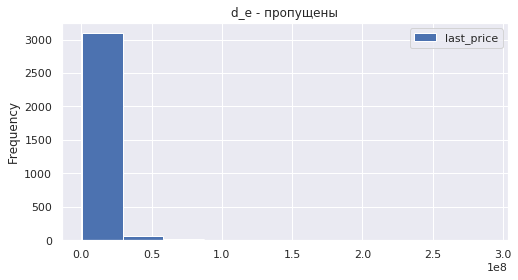

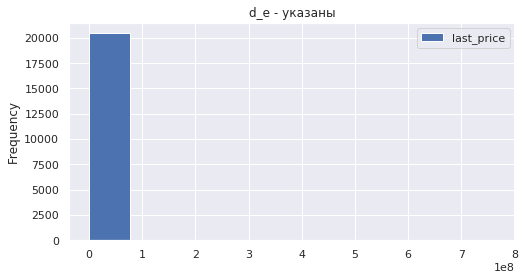

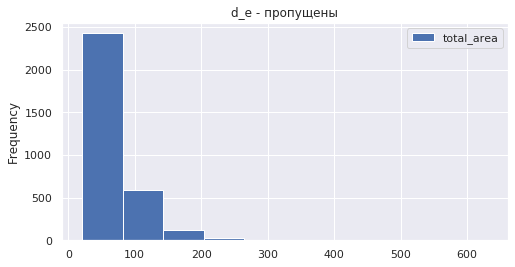

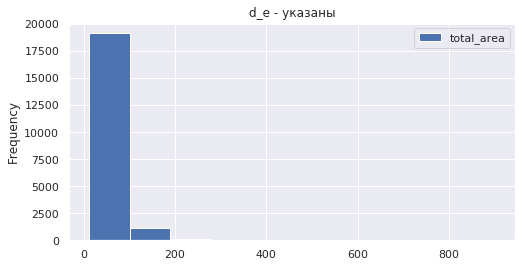

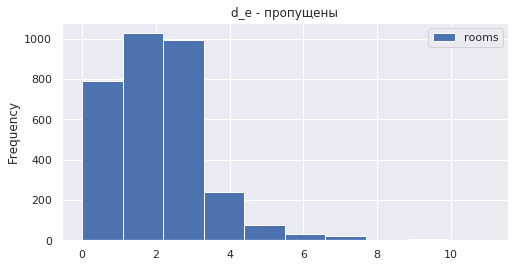

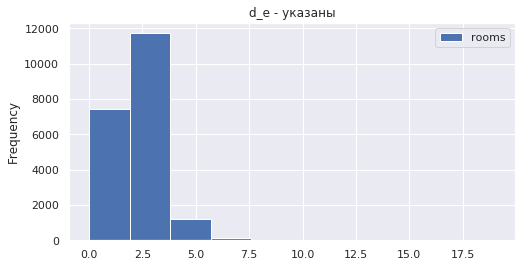

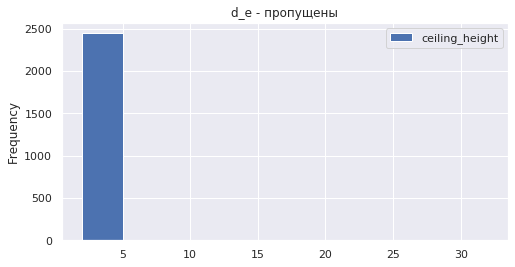

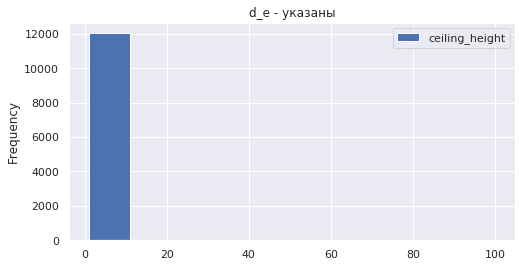

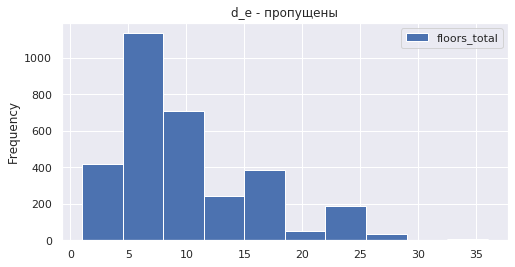

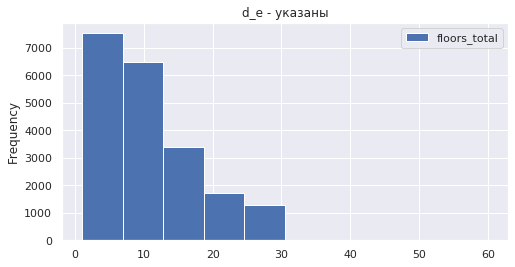

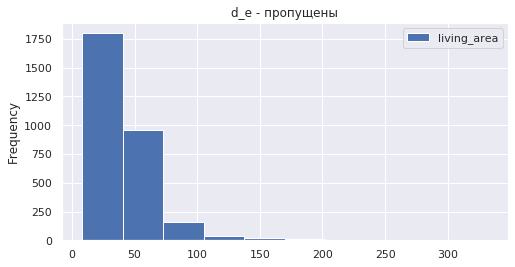

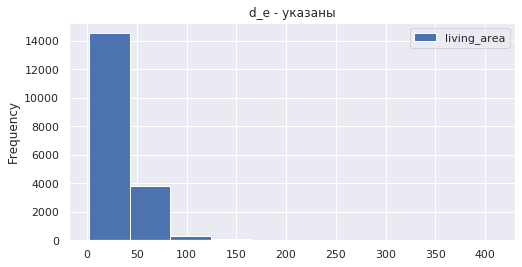

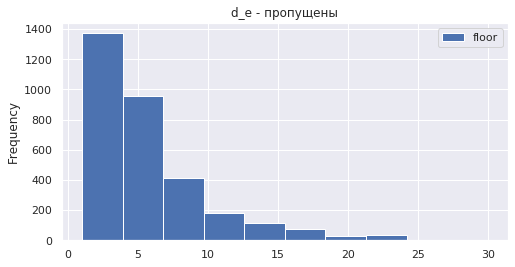

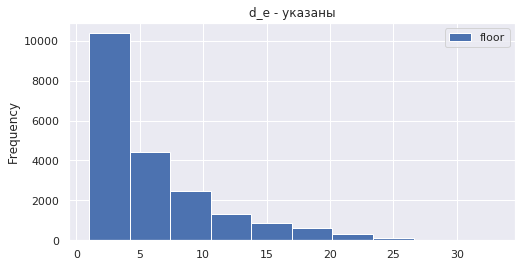

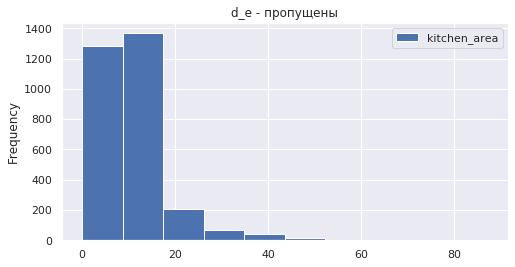

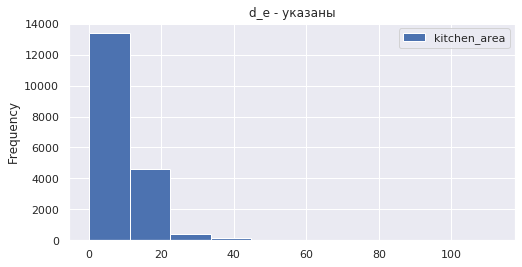

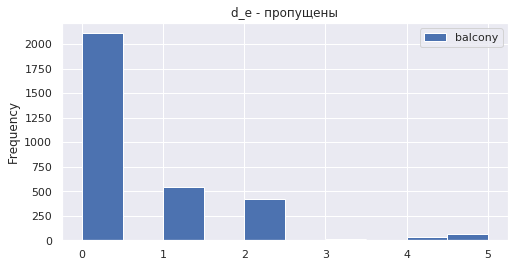

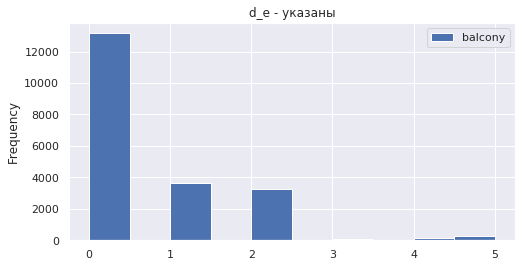

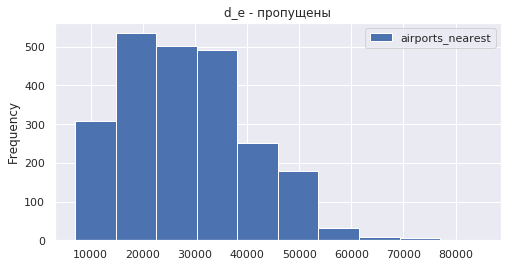

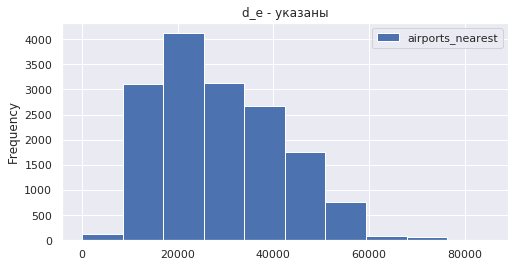

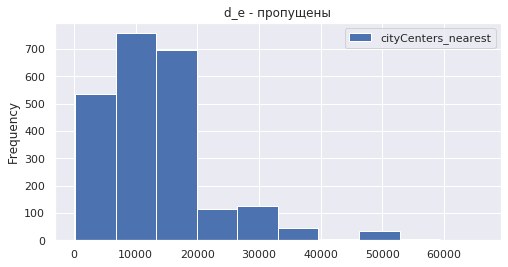

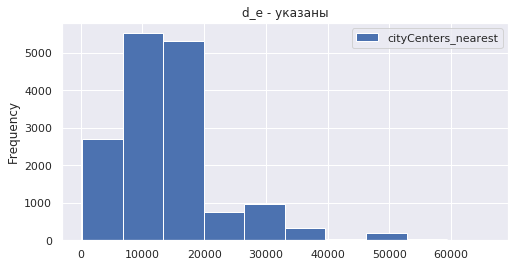

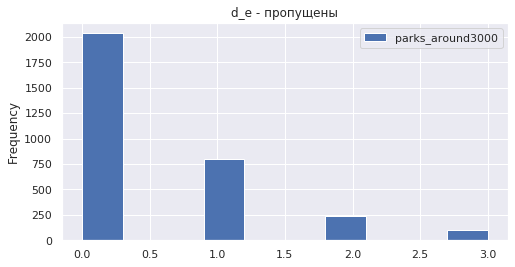

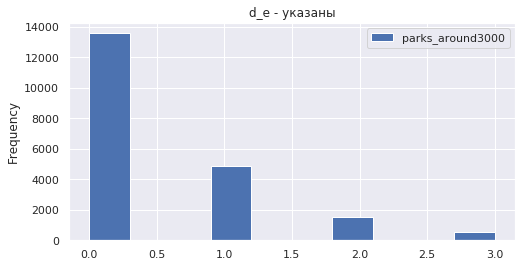

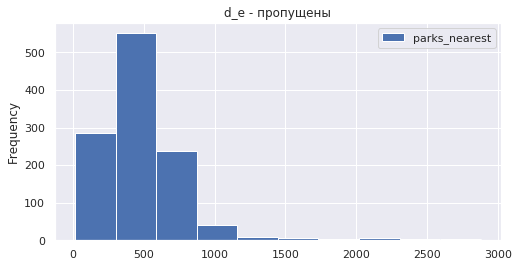

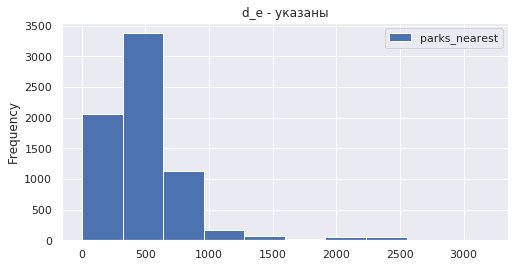

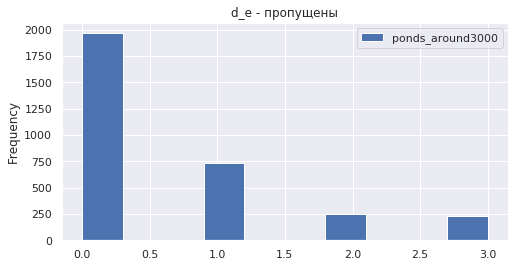

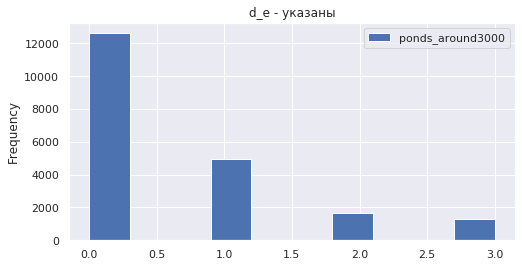

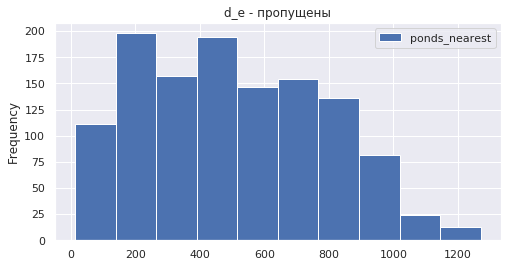

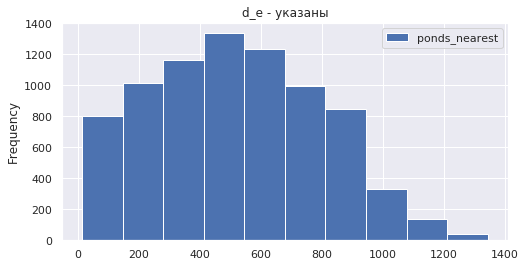

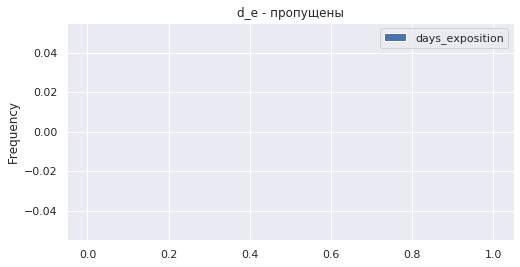

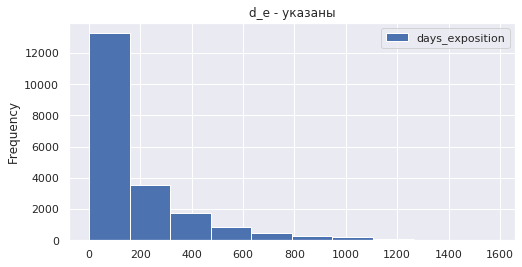

In [88]:
for col_name in data.select_dtypes(exclude=['bool', 'object']).columns: #возмем только числовые строки
    data[data.days_exposition.isna()].plot(y=col_name, kind='hist', grid=True, title='d_e - пропущены')
    data[~data.days_exposition.isna()].plot(y=col_name, kind='hist', grid=True, title='d_e - указаны')

Для наглядности также попробуем изобразить гистограммы срезов с пропущенными данными и с не пропущенными так, чтобы данные по каждому столбцу были на одном графике.

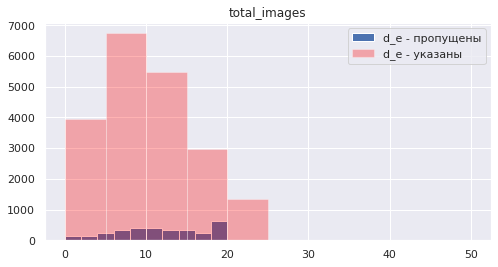

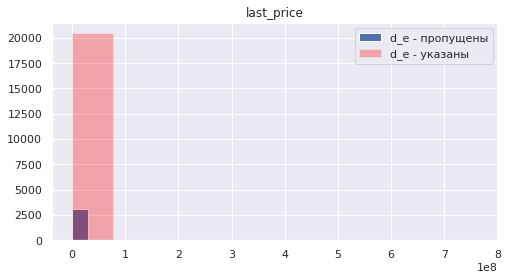

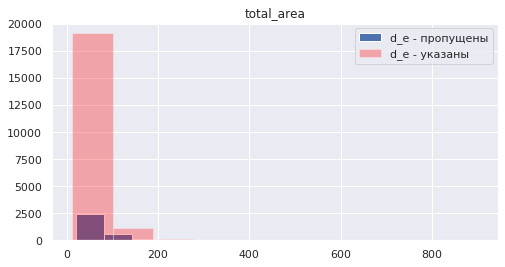

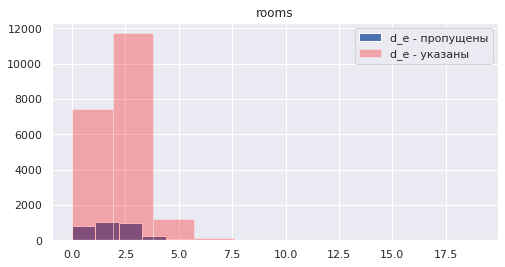

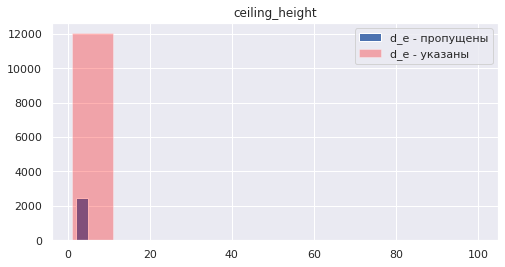

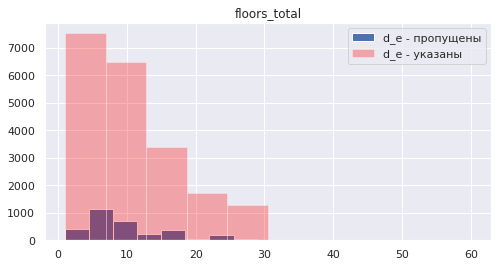

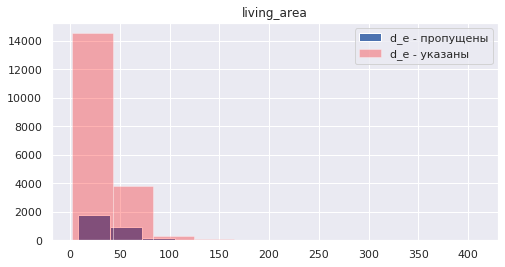

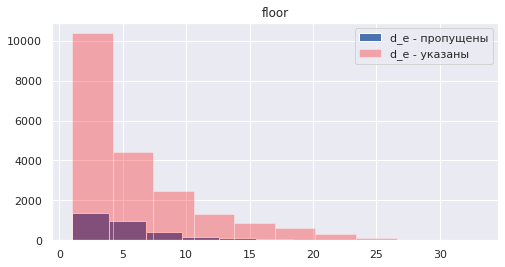

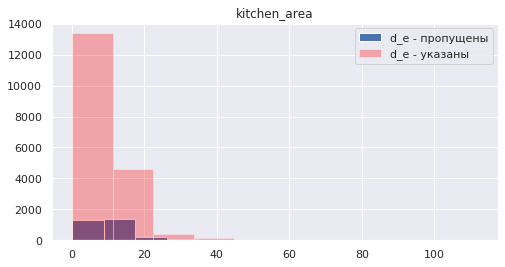

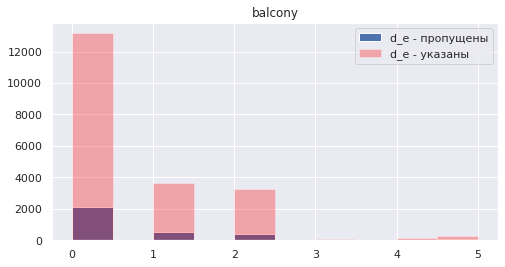

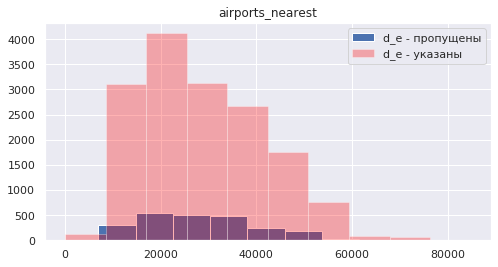

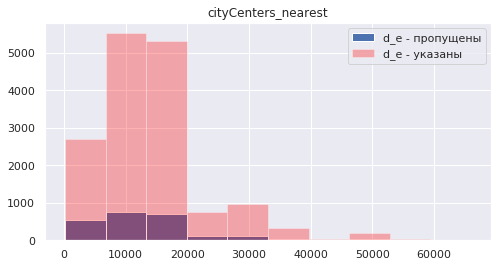

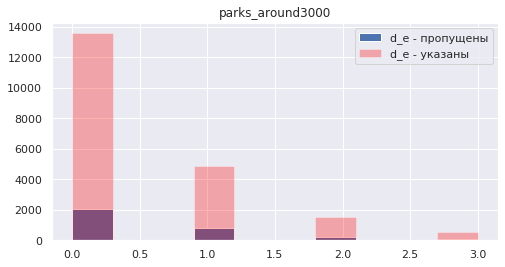

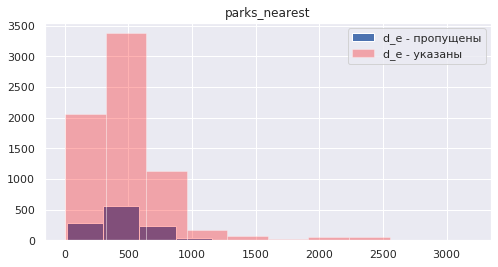

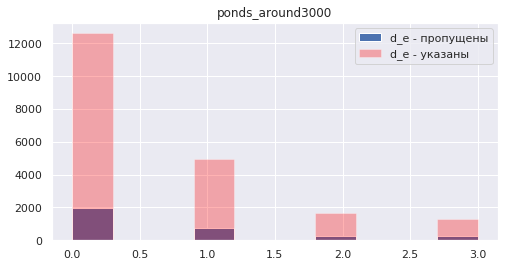

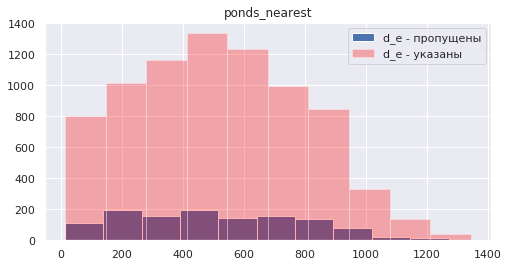

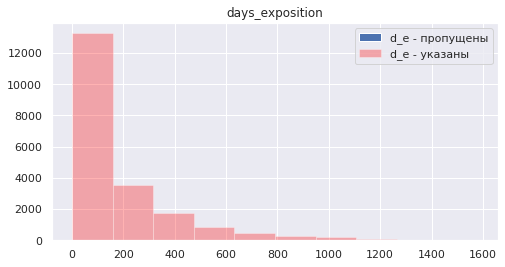

In [89]:
for col_name in data.select_dtypes(exclude=['bool', 'object']).columns:
    fig, ax = plt.subplots()
    ax.hist(data[data.days_exposition.isna()][col_name].dropna(), label='d_e - пропущены');
    ax.hist(data[~data.days_exposition.isna()][col_name].dropna(), label='d_e - указаны', color='red', alpha=.3);
    ax.legend()
    plt.title(col_name)

Столбцы `ceiling_height` и `last_price` плохо видны. Построим для них отдельные гистограммы

Посмотрим на максимальные, средние и минимальные значения столбца `last_price`, чтобы задать параметр `range` гистограмме.

In [90]:
data.describe().last_price

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

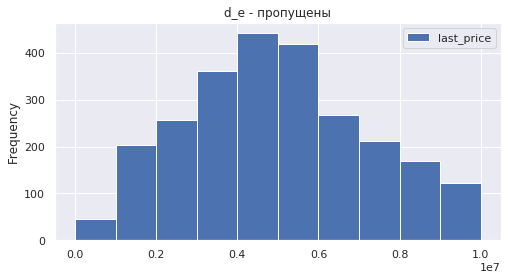

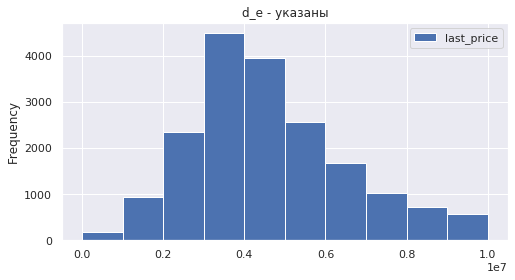

In [91]:
#Для last_price
data[data.days_exposition.isna()].plot(y='last_price', bins=10, kind='hist', 
                                       grid=True, title='d_e - пропущены', range=(0, 10**7));
data[~data.days_exposition.isna()].plot(y='last_price', bins=10, kind='hist', 
                                        grid=True, title='d_e - указаны',  range=(0, 10**7));

Посмотрим на максимальные, средние и минимальные значения столбца `ceiling_height`, чтобы задать параметр `range` гистограмме.

In [92]:
data.describe().ceiling_height

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

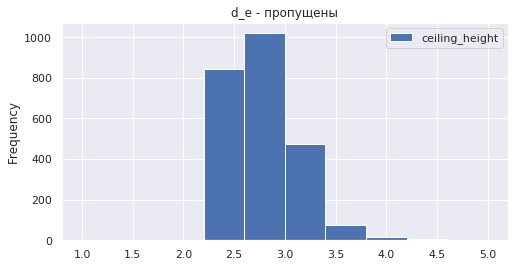

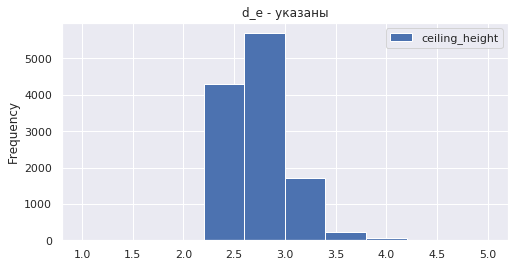

In [93]:
#Для ceiling_height
data[data.days_exposition.isna()].plot(y='ceiling_height', bins=10, kind='hist', 
                                       grid=True, title='d_e - пропущены', range=(1, 5));
data[~data.days_exposition.isna()].plot(y='ceiling_height', bins=10, kind='hist', 
                                        grid=True, title='d_e - указаны',  range=(1, 5));

В целом, распределения данных по каждому из столбцов (в срезе с пропущенными значениями и в срезе с присутствующими значенниями) похожи между собой.  

Единственное различие было обнаружено в столбце `total_images`. Выведем на экран гистограммы данного столбца.

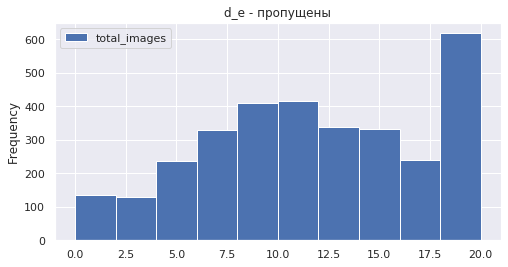

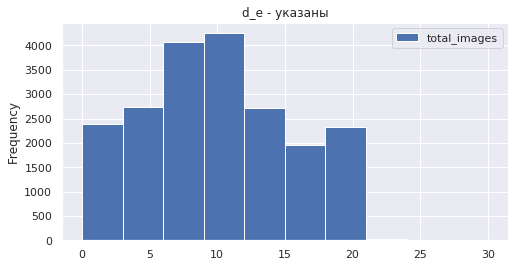

In [94]:
data[data.days_exposition.isna()].plot(y='total_images', 
                                       bins=10, 
                                       kind='hist', 
                                       grid=True, 
                                       title='d_e - пропущены');
plt.show()

data[~data.days_exposition.isna()].plot(y='total_images', 
                                        bins=10, 
                                        kind='hist', 
                                        grid=True, 
                                        title='d_e - указаны', range=(0, 30));
plt.show()

В срезе данных, в которых не указан срок размещения объявления, помимо пика на значении 10 (который также присутсвует в срезе данных с указанной длительностью размещения), присутствует второй пик на отметке 20. Может быть, причина, по которой сняли объявления была именно в таком большом количестве изображений, а точнее, в том, что на них содержалось. В данном случае, мы можем лишь строить предположения.

Лучше всего будет оставить пропуски в данном столбце, так как мы лишь предполагаем, что данные объявления провисели меньше одного дня. Если мы выставим 0, а на самом деле там окажутся объявления, которые висели больше одного дня, но по какой-то иной причине время для них все же не сохранилось в этом столбце - мы можем исказить данные.  
Да и в целом, значение 0 для данного столбца будет скорее выбросом, которое может исказить нам средние показатели.

Следовательно, разумным будет оставить данные пропуски без изменений.

#### Краткое резюме

Выведем на экран количество столбцов с пропусками после предобработки пропущенных значений.

In [95]:
nan_columns_after_pp = data.columns[data.isna().sum() > 1] #Список (массив) наименования стобцов с пропущенными значениями.

nan_columns_after_pp_count = pd.DataFrame(data[nan_columns_after_pp]
                                          .isna()
                                          .sum(),          #Создадим датафрейм, в котором отобразим список столбцов
                                 columns=['count'])        #с пропущенными значениями, их количество.
nan_columns_after_pp_count['% of all'] = nan_columns_after_pp_count['count'] / data.shape[0] #И также отобразим их долю от общего количества строк.

print(f'Количество столбцов с пропущенными значениями после предобработки: {len(nan_columns_after_pp)}')
print(nan_columns_after_pp_count.sort_values(by='count',
                                    ascending=False)) #Выведем таблицу в порядке убывания количества пропущенных значений

Количество столбцов с пропущенными значениями после предобработки: 9
                     count  % of all
parks_nearest        15620  0.659100
ponds_nearest        14589  0.615596
ceiling_height        9195  0.387991
airports_nearest      5542  0.233850
cityCenters_nearest   5519  0.232879
days_exposition       3181  0.134225
kitchen_area          2129  0.089835
living_area           1903  0.080299
floors_total            86  0.003629


Нам удалось сократить количество столбцов с пропусками с 14 до 9.

### Изменение формата хранения данных

Вновь выведем информацию о данных на экран

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21570 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null float64
parks_nearest           8079 non-null float64
ponds_around30

#### Работа с форматом `bool`

Вначале приведем столбцы формата `bool` к числовому формату, где 1 = True, 0 - False

Выведем строки на экран

In [97]:
data.select_dtypes('bool').head()

studio  open_plan
0   False      False
1   False      False
2   False      False
3   False      False
4   False      False

In [98]:
for col_name in data.select_dtypes('bool').columns:
    data[col_name] = data[col_name].astype('int')

In [99]:
data[['studio', 'open_plan']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 2 columns):
studio       23699 non-null int64
open_plan    23699 non-null int64
dtypes: int64(2)
memory usage: 370.4 KB


Мы заменили значения типа `bool` на `int`

#### Работа с форматом `object`

Выведем строки на экран

In [100]:
data.select_dtypes('object').sample(n=5)

first_day_exposition is_apartment    locality_name
9875   2017-03-09T00:00:00           -1  Санкт-Петербург
13236  2018-08-03T00:00:00           -1  Санкт-Петербург
20825  2018-04-04T00:00:00           -1  Санкт-Петербург
7501   2016-02-29T00:00:00           -1        Сертолово
12916  2015-06-25T00:00:00           -1  Санкт-Петербург

Посмотрим отдельно на уникальные значения столбца `is_apartment`

In [101]:
data.is_apartment.unique()

array([-1, False, True], dtype=object)

**first_day_exposition** - приведем к формату `datetime`, оставим только дату.  
**is_apartment** - приведем к формату `int`  
**locality_name** - оставим `object`

In [102]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

print('Формат столбца first_day_exposition:', data.first_day_exposition.dtype)
data.first_day_exposition.head()

Формат столбца first_day_exposition: datetime64[ns]


0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [103]:
data['is_apartment'] = data['is_apartment'].astype('int')

print('Формат столбца is_apartment:', data['is_apartment'].dtype)
print('Уникальные значения столбца is_apartment:', data['is_apartment'].unique())

Формат столбца is_apartment: int64
Уникальные значения столбца is_apartment: [-1  0  1]


Мы привели:  
**first_day_exposition** - к `datetime`, оставив только дату.  
**is_apartment** - к `int`  
**locality_name** - оставили `object`

#### Работа с форматом `float`

In [104]:
data.select_dtypes('float').head()

last_price  total_area  ceiling_height  floors_total  living_area  \
0  13000000.0       108.0            2.70          16.0         51.0   
1   3350000.0        40.4             NaN          11.0         18.6   
2   5196000.0        56.0             NaN           5.0         34.3   
3  64900000.0       159.0             NaN          14.0          NaN   
4  10000000.0       100.0            3.03          14.0         32.0   

   kitchen_area  balcony  airports_nearest  cityCenters_nearest  \
0          25.0      0.0           18863.0              16028.0   
1          11.0      2.0           12817.0              18603.0   
2           8.3      0.0           21741.0              13933.0   
3           NaN      0.0           28098.0               6800.0   
4          41.0      0.0           31856.0               8098.0   

   parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0               1.0          482.0               2.0          755.0   
1               0.0            NaN               0.0            NaN   
2               1.0           90.0               2.0          574.0   
3               2.0           84.0               3.0          234.0   
4               2.0          112.0               1.0           48.0   

   days_exposition  
0              NaN  
1             81.0  
2            558.0  
3            424.0  
4            121.0

Посмотрим, в каких столбцах отсутствуют пропуски. Столбцы с пропусками придется оставить в формате `float`

In [105]:
columns_not_na = data.select_dtypes('float').dropna(axis=1).columns
data[columns_not_na].head()

last_price  total_area  balcony  parks_around3000  ponds_around3000
0  13000000.0       108.0      0.0               1.0               2.0
1   3350000.0        40.4      2.0               0.0               0.0
2   5196000.0        56.0      0.0               1.0               2.0
3  64900000.0       159.0      0.0               2.0               3.0
4  10000000.0       100.0      0.0               2.0               1.0

**last_price** - приведем к `int`  
**total_area** - оставим `float`. Даже 0.5 кв.метра могут стоить значительно.  
**ceiling_height** - оставим `float`   
**parks_around3000** - приведем к `int`  
**ponds_around3000** - приведем к `int`  

Преобразуем столбцы к нужному формату.

In [106]:
columns_to_format_change = ['last_price', 'parks_around3000', 'ponds_around3000']

for col_name in columns_to_format_change:
    data[col_name] = data[col_name].astype('int')

Проверим результат преобразования

In [107]:
print(data[columns_to_format_change].info())
data[columns_to_format_change].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 3 columns):
last_price          23699 non-null int64
parks_around3000    23699 non-null int64
ponds_around3000    23699 non-null int64
dtypes: int64(3)
memory usage: 555.6 KB
None


last_price  parks_around3000  ponds_around3000
0    13000000                 1                 2
1     3350000                 0                 0
2     5196000                 1                 2
3    64900000                 2                 3
4    10000000                 2                 1

#### Работа с форматом `int`

Метод **pd.to_numeric()** позволяет нам преобразовать тип `int64` в наиболее емкое в отношении занимаемой памяти тип (например, `int8`). Для того, чтобы оптимизировать память, занимаемую данными, выберем все столбцы, которые имеют тип `int` и применим к ним метод **pd.to_numeric()**

In [108]:
int_columns = data.select_dtypes('int').columns

Посмотрим объем памяти, который данные стобцы занимают сейчас

In [109]:
print(f'{round(data[int_columns].memory_usage(deep=True).sum() / 1024 ** 2, 3)} MB')

1.627 MB


In [110]:
for col_name in int_columns:
    data[col_name] = pd.to_numeric(data[col_name], downcast='integer')

Посмотрим объем памяти, который данные стобцы занимают после преобразования

In [111]:
print(f'{round(data[int_columns].memory_usage(deep=True).sum() / 1024 ** 2, 3)} MB')

0.271 MB


In [112]:
print('Нам удалось сократить объем памяти, занимаемой столбцами с форматом int в', round(1.627 / 0.271), 'раз')

Нам удалось сократить объем памяти, занимаемой столбцами с форматом int в 6 раз


Посмотрим к каким форматом произошло преобразования

In [113]:
data[int_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 9 columns):
total_images        23699 non-null int8
last_price          23699 non-null int32
rooms               23699 non-null int8
floor               23699 non-null int8
is_apartment        23699 non-null int8
studio              23699 non-null int8
open_plan           23699 non-null int8
parks_around3000    23699 non-null int8
ponds_around3000    23699 non-null int8
dtypes: int32(1), int8(8)
memory usage: 277.8 KB


#### Краткое резюме

Посмотрим информацию о типах данных вновь.

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int8
last_price              23699 non-null int32
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int8
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int8
is_apartment            23699 non-null int8
studio                  23699 non-null int8
open_plan               23699 non-null int8
kitchen_area            21570 non-null float64
balcony                 23699 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int8
parks_nearest           8079 non-null float64
ponds_around3000

В результате изменения формата данных, мы:  
- **studio** и **open_plan** - изменили `bool` на `int`
- **first_day_exposition** - изменили `object` на `datetime`, оставив только дату.  
- **is_apartment** - изменили `object` на `int`
- **last_price**, **parks_around3000**, **ponds_around3000** - изменили `float` на `int`
- **total_images**, **last_price**, **rooms**, **floor**, **is_apartment**, **studio**, **open_plan**, **parks_around3000**, **ponds_around3000** - изменили `int` на более оптимальные с точки зрения занимаемой памяти форматы `int8` и `int32`.

## Расчёты и добавление результатов в таблицу

На данном этапе добавим в таблицу:  
- цену квадратного метра;
- день недели, месяц и год публикации объявления;
- этаж квартиры; варианты — первый, последний, другой;
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Добавим цену квадратного метра.

Создадим столбец **sqm_price** (*square meter price*), в который сохраним стоимость за квадратный метр жилья.

In [116]:
data['sqm_price'] = round(data['last_price'] / data['total_area'], 0)

In [117]:
data['sqm_price'].head()

0    120370.0
1     82921.0
2     92786.0
3    408176.0
4    100000.0
Name: sqm_price, dtype: float64

Преобразуем столбец **sqm_price** к формату `int`

In [118]:
data['sqm_price'] = pd.to_numeric(data['sqm_price'], downcast='integer')

data['sqm_price'].dtype

dtype('int32')

### Добавим день недели, месяц и год публикации объявления.

Добавим столбцы, в которые сохраним следующие значения:  
`dayofweek_first_exp` = день недели, когда объявление было впервые размещено  
`month_first_exp` = месяц, когда объявление было впервые размещено  
`year_first_exp` = год, когда объявление было впервые размещено

In [119]:
data['dayofweek_first_exp'] = data['first_day_exposition'].dt.weekday #день недели
data['month_first_exp'] = data['first_day_exposition'].dt.month #месяц
data['year_first_exp'] = data['first_day_exposition'].dt.year #год

Выведем новые стобцы на экран вместе с **first_day_exposition**

In [120]:
data[['first_day_exposition', 'dayofweek_first_exp', 'month_first_exp', 'year_first_exp']].head()

first_day_exposition  dayofweek_first_exp  month_first_exp  year_first_exp
0           2019-03-07                    3                3            2019
1           2018-12-04                    1               12            2018
2           2015-08-20                    3                8            2015
3           2015-07-24                    4                7            2015
4           2018-06-19                    1                6            2018

Посмотрим, в каком формате добавились стобцы.

In [121]:
data[['dayofweek_first_exp', 'month_first_exp', 'year_first_exp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 3 columns):
dayofweek_first_exp    23699 non-null int64
month_first_exp        23699 non-null int64
year_first_exp         23699 non-null int64
dtypes: int64(3)
memory usage: 555.6 KB


Оптимизируем формат.

In [122]:
for col_name in ['dayofweek_first_exp', 'month_first_exp', 'year_first_exp']:
    data[col_name] = pd.to_numeric(data[col_name], downcast='integer')

data[['dayofweek_first_exp', 'month_first_exp', 'year_first_exp']].info() #вновь выведем инфомацию на экран

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 3 columns):
dayofweek_first_exp    23699 non-null int8
month_first_exp        23699 non-null int8
year_first_exp         23699 non-null int16
dtypes: int16(1), int8(2)
memory usage: 92.7 KB


### Добавим этаж квартиры; варианты — первый, последний, другой, неизвестный;

Создадим категориальный столбец, в котором создадим следущие значения при следующих условиях:  
`First` - если столбец `floor` содержит 1  
`Last` - если значения столбца `floor` = `flors_total`  
`Other` - если это не первый и не последний этаж  
`Unknown` - если нам неизвестно общее количество этаже  

In [123]:
#создадим переменную, в который все значения Nan в столбце floors_total заменим на 0
floors_total_no_na = data['floors_total'].fillna(0)

#создадим столбец floor_cat, которую заполним в соответсвии с условиями.
data['floor_cat'] = ['Last'
                     if data.loc[i, 'floor'] == data.loc[i, 'floors_total'] 
                     else 'First' if data.loc[i, 'floor'] == 1 
                     else 'Unknown' if floors_total_no_na[i] == 0
                     else 'Other'
                     for i in data.index]

Проверим результат заполнения

In [124]:
data[['floor', 'floors_total', 'floor_cat']].head()

floor  floors_total floor_cat
0      8          16.0     Other
1      1          11.0     First
2      4           5.0     Other
3      9          14.0     Other
4     13          14.0     Other

Проверим, корректно ли заполнены значения, для которых в столбце `floors_total` присутствуют пропуски.

In [125]:
data.loc[data.floors_total.isna(), ['floor', 'floors_total', 'floor_cat']].head()

floor  floors_total floor_cat
186       4           NaN   Unknown
237       1           NaN     First
457      12           NaN   Unknown
671       8           NaN   Unknown
1757      9           NaN   Unknown

Проверим, корректно ли заполнены зачения для объектов, расположенных на 1-м этаже, для которых в столбце `floors_total` присутствуют пропуски.

In [126]:
data.loc[(data.floors_total.isna()) & (data.floor == 1), 'floor_cat'].unique()

array(['First'], dtype=object)

Все заполнено корректно

Посмотрим на формат стобца `floor_cat`.

In [127]:
data.floor_cat.dtype

dtype('O')

На данный момент формат столбца - `object`. Преобразуем к формату `category`

In [128]:
data['floor_cat'] = data['floor_cat'].astype('category')

data.floor_cat.dtype #вновь выведем на экран формат столбца floor_cat

CategoricalDtype(categories=['First', 'Last', 'Other', 'Unknown'], ordered=False)

### Добавим соотношение жилой и общей площади, а также отношение площади кухни к общей.

Создадим 2 новых столбца, в которые сохраним следующие значения:  
`live_to_total_area` - отношение жилой площади к общей  
`kitchen_to_total_area` - отношение площади кухни к общей площади

In [129]:
data['live_to_total_area'] = round(data['living_area'] / data['total_area'], 2) #отношение жилой площади к общей
data['kitchen_to_total_area'] = round(data['kitchen_area'] / data['total_area'], 2) #отношение площади кухни к общей площади

Проверим результат создания новых столбцов.

In [130]:
data[['total_area', 'living_area', 'kitchen_area', 'live_to_total_area', 'kitchen_to_total_area']].head()

total_area  living_area  kitchen_area  live_to_total_area  \
0       108.0         51.0          25.0                0.47   
1        40.4         18.6          11.0                0.46   
2        56.0         34.3           8.3                0.61   
3       159.0          NaN           NaN                 NaN   
4       100.0         32.0          41.0                0.32   

   kitchen_to_total_area  
0                   0.23  
1                   0.27  
2                   0.15  
3                    NaN  
4                   0.41

### Краткое резюме

На даном этапе мы создали новые столбцы, значения для которых вычислили на основе имеющихся данных:  
`sqm_price` - стоимость за квадратный метр жилья  
`dayofweek_first_exp` - день недели, когда объявление было впервые размещено  
`month_first_exp` - месяц, когда объявление было впервые размещено  
`year_first_exp` - год, когда объявление было впервые размещено  
`floor_cat` - категория этажа  
`live_to_total_area` - отношение жилой площади к общей  
`kitchen_to_total_area` - отношение площади кухни к общей площади

## Исследовательский анализ данных

### Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.

#### Площадь квартир `total_area`

Посмотрим на распределение значений столбца `total_area`

In [131]:
data.describe().total_area

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

Медианное значение - 52кв.м. Среднее чуть больше - 60,3 кв.м. 
При этом минимальная площадь квартиры, из представленных в выгрузке - 12кв.м. Максимальная - 900кв.м.  
900кв.м - подозрительное значение. Посмотрим на остальные признаки объекта.

In [132]:
data[data.total_area == 900]

total_images  last_price  total_area first_day_exposition  rooms  \
19540             8   420000000       900.0           2017-12-06     12   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
19540             2.8          25.0        409.7     25            -1       0   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
19540          0         112.0      0.0  Санкт-Петербург           30706.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
19540               7877.0                 0            NaN                 2   

       ponds_nearest  days_exposition  sqm_price  dayofweek_first_exp  \
19540          318.0            106.0     466667                    2   

       month_first_exp  year_first_exp floor_cat  live_to_total_area  \
19540               12            2017      Last                0.46   

       kitchen_to_total_area  
19540                   0.12

Последний этаж, жилая площадь составляет 46% от общей, стоимость 420 млн.р. - похоже на пентхаус с терассой. Вполне правдоподобно.

Посмотрим как распределены значения площади квартир на гистограмме.

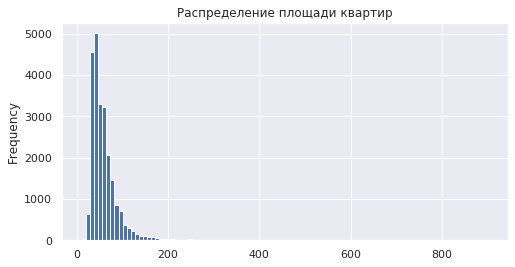

In [133]:
data.total_area.plot(kind='hist', bins=100, figsize=(8, 4));
plt.title('Распределение площади квартир');

Видим очень большой хвост справа. Небольшое количество значений, которые сильно выбиваются из общей выборки.

Посмотрим диаграмму размаха.

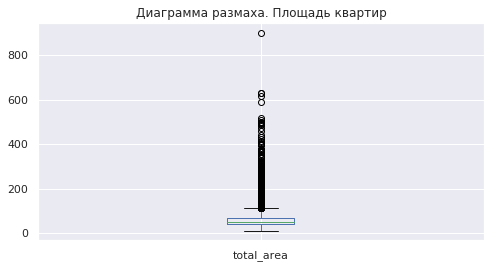

In [134]:
data.total_area.plot(kind='box');
plt.title('Диаграмма размаха. Площадь квартир');

На диаграмме размаха можно увидеть длинный хвост из выбросов.  
Такие выброс могут сильно искажать средние показатели по выборке.  
Ограничим нашу выборку дипазоном значений \[Q1 - 1,5IQR (или min) - Q3 + 1,5IQR\], где Q1 и Q3 - первый и третий квартили, а IQR - интреквантильный размах.

In [135]:
#Создадим функцию, которая будет принимать на вход столбец Series, а на выходе выдавать порог [Q1 - 1,5IQR (или min) - Q3 + 1,5IQR]

def set_thresh(series):
    Q1 = series.quantile(.25) #25%-й квантиль
    Q3 = series.quantile(.75) #75%-й квантиль
    IQR = Q3 - Q1                      #интреквантильный размах

    min_thresh = (Q1 - 1.5 * IQR if Q1 - 1.5 * IQR > series.min() else series.min()) #минимальный порог, исключающий выбросы
    max_thresh = (Q3 + 1.5 * IQR if Q3 + 1.5 * IQR < series.max() else series.max()) #максимальный порог, исключающий выбросы
    return round(min_thresh, 1), round(max_thresh, 1)

In [136]:
min_thresh_total_area, max_thresh_total_area = set_thresh(data.total_area)

print('Интервал значений, которые исключают выбросы:', [min_thresh_total_area, max_thresh_total_area])

Интервал значений, которые исключают выбросы: [12.0, 114.8]


In [137]:
data_total_area_no_outliers = data.query('@min_thresh_total_area <= total_area <= @max_thresh_total_area')

In [138]:
data_total_area_no_outliers.describe().total_area

count    22462.000000
mean        54.372978
std         19.396608
min         12.000000
25%         39.400000
50%         50.100000
75%         65.600000
max        114.800000
Name: total_area, dtype: float64

Медиана с 52 снизилась до 50 кв.м, в то время как среднее с 60 до 54,3кв.м.

Построим гистограмму по данным `data_total_area_no_outliers`

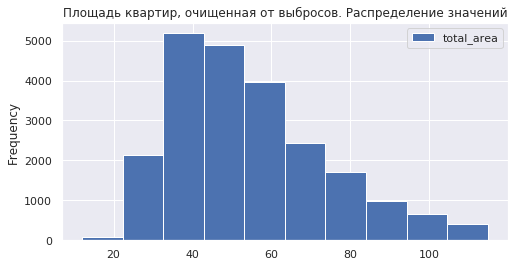

In [139]:
data_total_area_no_outliers.plot(y='total_area', kind='hist', bins=10);
plt.title('Площадь квартир, очищенная от выбросов. Распределение значений');

Видим, что гистограмма напоминает форму нормального распределения со скосом слева. Такой скос можно объяснить тем, что значения близкие к нулю праткически не возможны, либо крайне редки. Это нормально, когда речь идет о плащиди жилого объекта

Посмотрим также на диаграмму размаха `data_total_area_no_outliers`

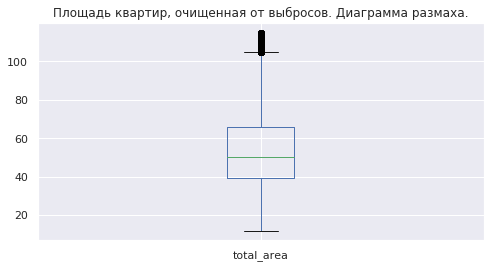

In [140]:
data_total_area_no_outliers.total_area.plot(kind='box');
plt.title('Площадь квартир, очищенная от выбросов. Диаграмма размаха.');

Можем увидеть, что на диаграмме размаха также сократилось количество выбросов.

In [141]:
print('Количество выбросов, которые были исключены из среза данных:', data.shape[0] - data_total_area_no_outliers.shape[0])
print('Их доля составляет:', 
      round(abs((data_total_area_no_outliers.shape[0] - data.shape[0]) / data.shape[0]), 3), 
      'от всего объема данных')

Количество выбросов, которые были исключены из среза данных: 1237
Их доля составляет: 0.052 от всего объема данных


**Краткое резюме:**

- Средняя площадь объектов, находящихся в выборке составляет: 50 кв.м (на основании медианы)  
- Минимальная площадь жилого объекта, из представленных в выборке: 12 кв.м.  
- Максимальная площадь жилого объекта, из представленных в выборке: 900 кв.м.  
- 94,8% объектов выборки имеют площадь в диапазоне \[12.0 кв.м., 114.8 кв.м.\]

#### Цена квартир `last_price`

In [142]:
data['last_price'].describe().apply("{:,.0f}".format)

count         23,699
mean       6,541,549
std       10,887,013
min           12,190
25%        3,400,000
50%        4,650,000
75%        6,800,000
max      763,000,000
Name: last_price, dtype: object

Средняя стоимость недвижимости - 6,5 млн.р, медианная стоимость - 4,65 млн.р.  
Стандартное отклонение  - 10,8 млн.р. Это говорит о том, что разброс цен очень высокий.  
Общий диапазон, в котором колеблется стоимость составляет от 12,190р до 763 млн.р.  

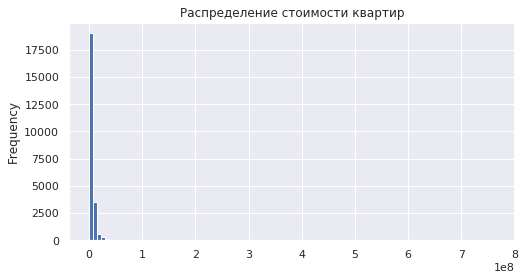

In [143]:
data['last_price'].plot(kind='hist', bins=100);
plt.title('Распределение стоимости квартир');

Воспринимать такую гистограмму не удобно. УДобнее было бы вновь избавиться от выбросов.  
Посомтрим, как выглядит диграмма размаха.

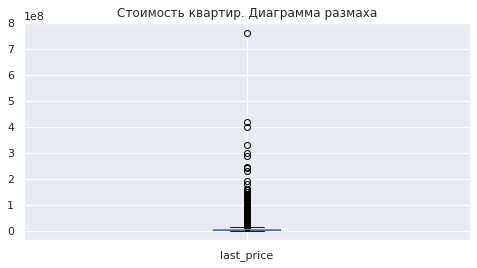

In [144]:
data['last_price'].plot(kind='box');
plt.title('Стоимость квартир. Диаграмма размаха');

Видим, что выбросы сильно искажают картину.

Зададим минимальные и максимальные пороги, которые бы исключали выбросы.

In [145]:
min_thresh_last_price, max_thresh_last_price = set_thresh(data['last_price'])
min_thresh_last_price, max_thresh_last_price

(12190, 11900000.0)

In [146]:
data_last_price_no_outliers = data.query('@min_thresh_last_price <= last_price <= @max_thresh_last_price')

In [147]:
data_last_price_no_outliers.describe().last_price.apply("{:,.0f}".format)

count        21,665
mean      4,848,768
std       2,229,914
min          12,190
25%       3,300,000
50%       4,400,000
75%       6,000,000
max      11,900,000
Name: last_price, dtype: object

Средняя стоимость недвижимости снизилась с 6,5 млн.р до 4,8 млн.р., медианная стоимость - с 4,65 млн.р. до 4,4 млн.р.  
Стандартное отклонение уменьщилось с 10,8 млн.р до 2,2 млн.р.  
Общий диапазон, в котором изменяется стоимость в данных без выбросов составляет от 12,190р до 11,9 млн.р.  
Не смотря на то, что мы избавились от выбросов, осталось немного подозрительное значение - 12,190р. Посмотрим на строку, в которой отображено данное значение.

In [148]:
data_last_price_no_outliers.query('last_price == 12190')

total_images  last_price  total_area first_day_exposition  rooms  \
8793             7       12190       109.0           2019-03-20      2   

      ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
8793            2.75          25.0         32.0     25            -1       0   

      open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
8793          0          40.5      0.0  Санкт-Петербург           36421.0   

      cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
8793               9176.0                 1          805.0                 0   

      ponds_nearest  days_exposition  sqm_price  dayofweek_first_exp  \
8793            NaN              8.0        112                    2   

      month_first_exp  year_first_exp floor_cat  live_to_total_area  \
8793                3            2019      Last                0.29   

      kitchen_to_total_area  
8793                   0.37

Общая площадь объекта, который выставлен за 12190р - 109 кв.м. Можем предположить, что данную цену заказчик выставил для привлечения внимания, не дописав 3 нуля.  
Построим гистограмму для нового датасета и диаграмму размаха.

Это значение явно похоже на выброс. Уберем его также и перезапишем значение переменной `data_last_price_no_outliers`

In [149]:
data_last_price_no_outliers = data.query('@min_thresh_last_price < last_price <= @max_thresh_last_price')

In [150]:
data_last_price_no_outliers.describe().last_price.apply("{:,.0f}".format)

count        21,664
mean      4,848,992
std       2,229,723
min         430,000
25%       3,300,000
50%       4,400,000
75%       6,000,000
max      11,900,000
Name: last_price, dtype: object

Видим, что средние показатели остались практически остались без изменений.

In [151]:
print('Количество выбросов, которые были исключены из среза данных:', data.shape[0] - data_last_price_no_outliers.shape[0])
print('Их доля составляет:', 
      round(abs((data_last_price_no_outliers.shape[0] - data.shape[0]) / data.shape[0]), 3), 
      'от всего объема данных')

Количество выбросов, которые были исключены из среза данных: 2035
Их доля составляет: 0.086 от всего объема данных


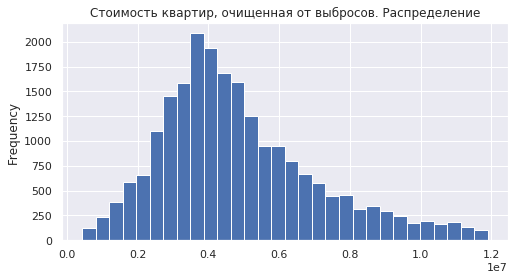

In [152]:
data_last_price_no_outliers['last_price'].plot(kind='hist', bins=30, figsize=(8, 4), grid=True);
plt.title('Стоимость квартир, очищенная от выбросов. Распределение');

Гистограмма принимает форму нормального распределения с пиком в районе 4 млн.р.

Построим диграмму разброса.

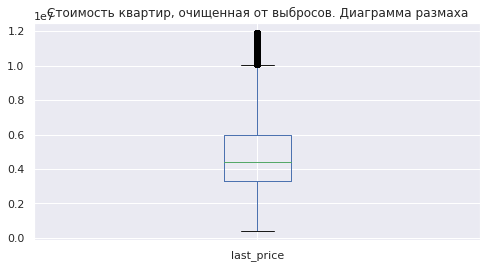

In [153]:
data_last_price_no_outliers['last_price'].plot(kind='box', grid=True);
plt.title('Стоимость квартир, очищенная от выбросов. Диаграмма размаха');

После исключения выбросов в виде особо дорогой недвижимости из данных, которая занимала лишь 8,6% от всего объема данных, видим, что значения диаграммы размаха стали более сконцентрированы вокруг среднего.  

In [154]:
print('Количество выбросов, которые были исключены из среза данных:', data.shape[0] - data_last_price_no_outliers.shape[0])
print('Их доля составляет:', 
      round(abs((data_last_price_no_outliers.shape[0] - data.shape[0]) / data.shape[0]), 3), 
      'от всего объема данных')

Количество выбросов, которые были исключены из среза данных: 2035
Их доля составляет: 0.086 от всего объема данных


Здесь также важно понимать, почему было принято решение убрать из датасета сверх дорогие объекты недвижимости. Дело в том, что они составляют лишь 8,6% от всего объема данных, и их количества может быть недостаточно для того, чтобы анализировать какие-либо параметры. В то время как для основной массы объектов недвижимости, характеристики таких объектов будут искажать общую тенденцию.  
Скорее всего данная недвижимость относится к иной категории, к категории элитной недвижимости, и анализировать ее стоит отдельно внутри своей категории.

**Краткое резюме:**

- Средняя стоимость объектов, находящихся в выборке составляет: 4,400,000 р (на основании медианы)  
- Минимальная стоимость жилого объекта, из представленных в выборке: 430,000 р. (с учетом того, что мы исключили из данных объект стоимостью 12190р и площадью 109 кв.м.) 
- Максимальная стоимость жилого объекта, из представленных в выборке: 763,000,000 р.  
- 91,4% объектов выборки имеют стоимость в диапазоне \[430,000р. , 11,900,000р. \]

#### Число комнат `rooms`

In [155]:
data.describe().rooms

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Среднее количество комнат - 2 комнаты на квартиру.  
Максимальное количество комнат - 19

Посмотрим значения значения данного столбца на гистограмме.

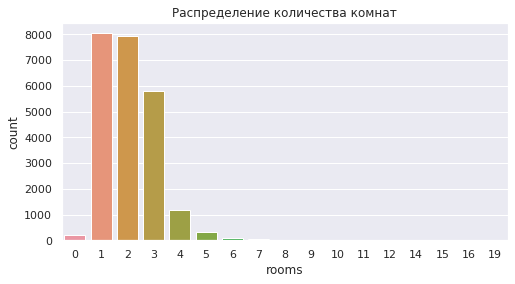

In [157]:
sns.countplot(x=data.rooms);
plt.title('Распределение количества комнат');

In [158]:
data.rooms.value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

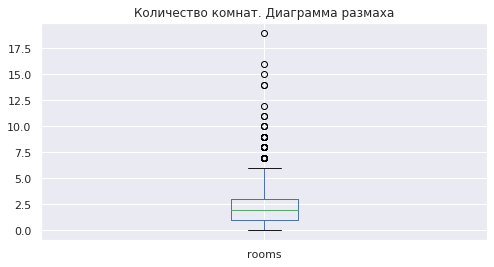

In [159]:
data.rooms.plot(kind='box', grid=True);
plt.title('Количество комнат. Диаграмма размаха');

Хорошо видны выбросы. Попробуем от них избавиться и посмотреть на результат.

Вновь применим функцию, которая задает минимальный и максимальный порог, исключающий выбросы

In [160]:
min_thresh_rooms, max_thresh_rooms = set_thresh(data['rooms'])

print('Диапазон значение rooms, исключающий выбросы', (min_thresh_rooms, max_thresh_rooms))

Диапазон значение rooms, исключающий выбросы (0, 6.0)


Сохраним в переменную `data_rooms_no_outliers` срез данных, исключающий выбросы по столбцу `rooms`

In [161]:
data_rooms_no_outliers = data.query('@min_thresh_rooms <= rooms <= @max_thresh_rooms')

In [162]:
data_rooms_no_outliers.describe().rooms

count    23609.000000
mean         2.047905
std          1.006772
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

In [163]:
print('Количество выбросов, которые были исключены из среза данных:', data.shape[0] - data_rooms_no_outliers.shape[0])
print('Их доля составляет:', 
      round(abs((data_rooms_no_outliers.shape[0] - data.shape[0]) / data.shape[0]), 3), 
      'от всего объема данных')

Количество выбросов, которые были исключены из среза данных: 90
Их доля составляет: 0.004 от всего объема данных


Среднее количество комнат осталось на уровне 2-х комнат на 1 объект недвижимости.  
Однако теперь мы можем увидеть, что для 99,6% квартир, представленных в данных макимальное количество комнат составляет 6.

Построим гистограмму для выбранного среза данных

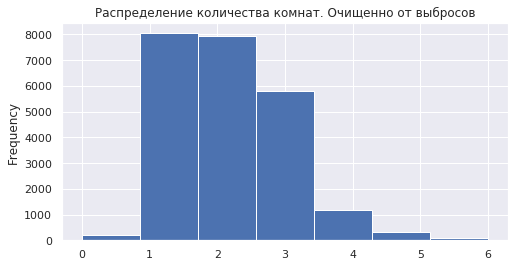

In [164]:
data_rooms_no_outliers['rooms'].plot(kind='hist', bins=7, grid=True);
plt.title('Распределение количества комнат. Очищенно от выбросов');

На гистограмме имеется сильный скос слева. Вероятно это вызвано лимитом значений слева - комнат не может быть меньше 0.

Построим диаграмму размаха для выбранного диапазона данных.

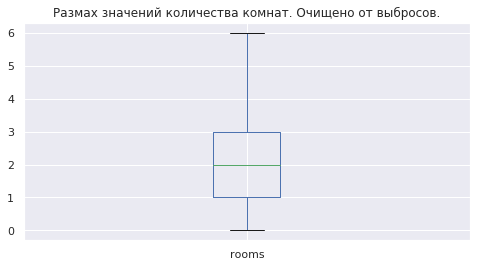

In [166]:
data_rooms_no_outliers['rooms'].plot(kind='box', grid=True);
plt.title('Размах значений количества комнат. Очищено от выбросов.');

На диграмме размаха для среза `data_rooms_no_outliers` отчетливо видно, что 50% объектов недвижимости имеют от 1-й до 3-х комнат. Учитывая то, что медиана больше смещена к низу графика, можно утверждать, что квартир с меньшим количеством комнат (от 0 до 3-х) в выгрузке представлено больше, нежели квартир с большим количеством комнат (от 3-х до 6-и). 

**Краткое резюме:**

- Средняя количество комнат объектов, находящихся в выгрузке составляет: 2 
- Минимальное количество комнат жилого объекта, из представленных в выгрузке: 0  
- Максимальное количество комнат жилого объекта, из представленных в выборке: 19  
- 50% объектов недвижимости, представленных в выгрузке имеют от 1-й до 3-х комнат
- 99,6% квартир, представленных в выгрузке имеют от 1-й до 6-и комнат.

#### Высота потолков `ceiling_height`

In [167]:
data.describe().ceiling_height

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Средняя высота потолков - 2,65м в соответсвии с медианой, 2,77м - в соответсвии со средним арифметическим. В целом, значения расположены достаточно близко.  
Минимальная и макимальная высота - 1м и 100м соотвественно.  

Интересно, что за объект имеет высоту 1м и 100м. Посмотрим на них полностью.

In [168]:
data.query('ceiling_height == 100')

total_images  last_price  total_area first_day_exposition  rooms  \
22869             0    15000000        25.0           2018-07-25      1   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
22869           100.0           5.0         14.0      5             1       0   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
22869          0          11.0      5.0  Санкт-Петербург           34963.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
22869               8283.0                 1          223.0                 3   

       ponds_nearest  days_exposition  sqm_price  dayofweek_first_exp  \
22869           30.0             19.0     600000                    2   

       month_first_exp  year_first_exp floor_cat  live_to_total_area  \
22869                7            2018      Last                0.56   

       kitchen_to_total_area  
22869                   0.44

Здесь явно допущена опечатка.

In [169]:
data.query('ceiling_height == 1')

total_images  last_price  total_area first_day_exposition  rooms  \
22590            16     6000000        55.0           2018-10-31      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
22590             1.0          12.0         32.4      7            -1       0   

       open_plan  kitchen_area  balcony    locality_name  airports_nearest  \
22590          0          10.0      0.0  Санкт-Петербург           33053.0   

       cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
22590              14217.0                 2          293.0                 2   

       ponds_nearest  days_exposition  sqm_price  dayofweek_first_exp  \
22590          289.0             13.0     109091                    2   

       month_first_exp  year_first_exp floor_cat  live_to_total_area  \
22590               10            2018     Other                0.59   

       kitchen_to_total_area  
22590                   0.18

Сложно сказать однозначно ошибка ли это округления, либо действительно есть объект с высотой 1м. Однако очень похоже на опечатку, так как очень сложно представить квартиру стоимостью 6млн рублей с высотой потолка 1м

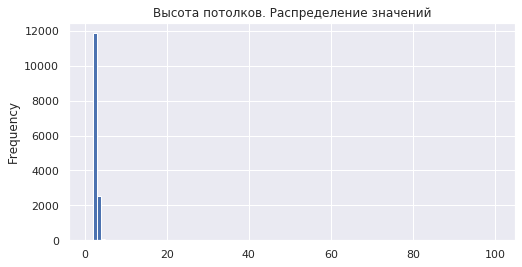

In [170]:
data['ceiling_height'].plot(kind='hist', bins=100);
plt.title('Высота потолков. Распределение значений');

Из за наличия выбросов, сложно воспринимать гистограмму.  
Посмотрим также как выглядит "ящик с усами"

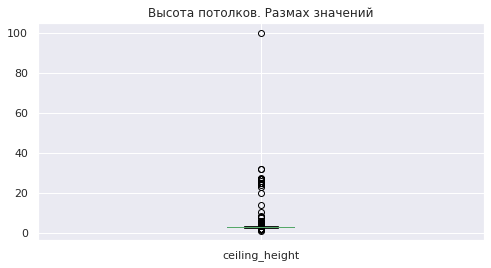

In [171]:
data['ceiling_height'].plot(kind='box');
plt.title('Высота потолков. Размах значений');

Снова выбросы не дают визуально оценить разброс данных. Попробуем избавиться от них, задав границы с помощью созданной нами функции `set_thresh()` и затем передадим полученные параметры в срез. Срез сохраним в переменной `data_ceiling_height_no_outliers`

In [172]:
min_thresh_ceiling_height, max_thresh_ceiling_height = set_thresh(data['ceiling_height'])

print('Диапазон значение ceiling_height, исключающий выбросы', (min_thresh_ceiling_height, max_thresh_ceiling_height))

Диапазон значение ceiling_height, исключающий выбросы (2.1, 3.2)


In [173]:
data_ceiling_height_no_outliers = data.query('@min_thresh_ceiling_height <= ceiling_height <= @max_thresh_ceiling_height')

In [174]:
data_ceiling_height_no_outliers.describe().ceiling_height

count    13673.000000
mean         2.679899
std          0.183950
min          2.200000
25%          2.500000
50%          2.640000
75%          2.760000
max          3.200000
Name: ceiling_height, dtype: float64

In [175]:
print('Количество выбросов, которые были исключены из среза данных:', data.dropna(subset=['ceiling_height']).shape[0] - data_ceiling_height_no_outliers.shape[0])
print('Их доля составляет:', 
      round(abs((data_ceiling_height_no_outliers.shape[0] - data.dropna(subset=['ceiling_height']).shape[0]) / data.dropna(subset=['ceiling_height']).shape[0]), 3), 
      'от всего объема данных')

Количество выбросов, которые были исключены из среза данных: 831
Их доля составляет: 0.057 от всего объема данных


Средняя высота потолков стала 2,64м в соответсвии с медианой, а среднее арифметическое снизилось с 2,77м до 2,67м.  
Минимальная и максимальная высота для 94,3% данных составляет - 2,2 и 3,2м соотвественно.  

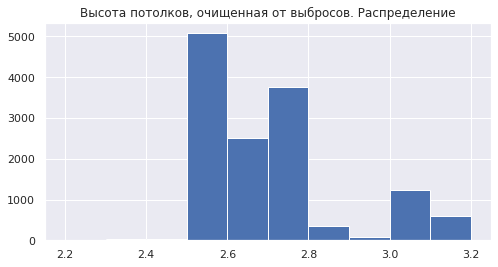

In [176]:
data_ceiling_height_no_outliers.ceiling_height.hist(bins=10);
plt.title('Высота потолков, очищенная от выбросов. Распределение');

Гистограмма напоминает нормальное распределение однако имеет 3 пика: в районе 2,5м и 2,7м, 3,1м. 
Вохможно, в районе данных значений располагаются типовые высоты потолков.

Посмотрим также как выглядит диаграмма размаха.

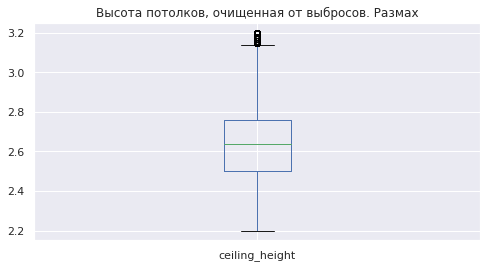

In [177]:
data_ceiling_height_no_outliers['ceiling_height'].plot(kind='box', grid=True);
plt.title('Высота потолков, очищенная от выбросов. Размах');

Видно, что нам удалось очистить данный столбец от выбросов. Незначительное их количество на значениях выше 3,1 м не мешает восприятию данных.

**Краткое резюме:**

- Средняя высота потолков составляет: 2,64м (величина рассчитана на основании 94,3% датасета, очищенного от выбросов)  
- Минимальная и максимальная высота для 94,3% данных составляет - 2,2 и 3,2м соотвественно.
- 50% объектов недвижимости, представленных в выгрузке имеют высоту потолков от 2,5м до 2,76м

### Изучим время продажи квартиры. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [178]:
data.describe().days_exposition

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее время срока продажи квартиры составляет 180 дней. Медианное время - 95 дней.  
Стандартное отклонение больше среднего в 1,2 раза. Наблюдается очень большое разброс в данных.  
Среднее арифметическое больше медианы праткически в два раза.  

Построим гистограмму.

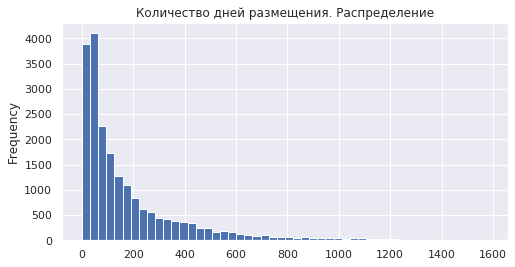

In [179]:
data['days_exposition'].plot(kind='hist', bins=50, grid=True);
plt.title('Количество дней размещения. Распределение');

На гистограмме виден очень длинный хвост справа и сильный скос слева. 
Большая часть значений расположена в левой части графика. Длинный хвост справа как раз таки и привел к сильному смещению среднего арифметического значения сроков продажи.

Посмотрим как выглядят данные на диаграмме размаха.

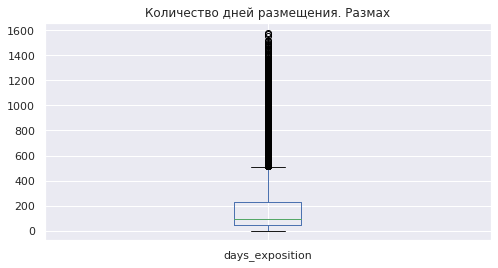

In [180]:
data['days_exposition'].plot(kind='box', grid=True);
plt.title('Количество дней размещения. Размах');

Выбросы с высокими значениями сроков продажи сильно смещают среднее арифметическое в большую сторону. С таким количеством выбросов сложно оценить общую тенденцию, которой бы характеризовалась большая часть данных.

Зададим верхние и нижние значения, которые бы исключали выбросы.

In [181]:
min_thresh_days_exposition, max_thresh_days_exposition = set_thresh(data['days_exposition'])

print('Диапазон значение days_exposition, исключающий выбросы', (min_thresh_days_exposition, max_thresh_days_exposition))

Диапазон значение days_exposition, исключающий выбросы (1.0, 512.5)


Сохраним в переменную `data_days_exposition_no_outliers` срез данных без выбросов.

In [182]:
data_days_exposition_no_outliers = data.query('@min_thresh_days_exposition <= days_exposition <= @max_thresh_days_exposition')

In [183]:
data_days_exposition_no_outliers.describe().days_exposition

count    18849.000000
mean       128.753886
std        121.531193
min          1.000000
25%         41.000000
50%         85.000000
75%        183.000000
max        512.000000
Name: days_exposition, dtype: float64

In [184]:
print('Количество выбросов, которые были исключены из среза данных:', data.dropna(subset=['days_exposition']).shape[0] - data_days_exposition_no_outliers.shape[0])
print('Их доля составляет:', 
      round(abs((data_days_exposition_no_outliers.shape[0] - data.dropna(subset=['days_exposition']).shape[0]) / data.dropna(subset=['days_exposition']).shape[0]), 3), 
      'от всего объема данных (за исключением строк с отсутствующими значениями)')
print('Общее количество строк в выгрузке без пропусков в столбце days_exposition:', data.dropna(subset=['days_exposition']).shape[0], 'из', data.shape[0])

Количество выбросов, которые были исключены из среза данных: 1669
Их доля составляет: 0.081 от всего объема данных (за исключением строк с отсутствующими значениями)
Общее количество строк в выгрузке без пропусков в столбце days_exposition: 20518 из 23699


Среднее время срока продажи квартиры составляет сократилось со 180 до 128 дней. Медианное время сократилось с 95 до 85 дней.  
Несмотря на то, что стандартное отклонение осталось по прежнему высоким, оно уже не превышает показатель среднего арифметического.  

Построим гистограмму по срезу `data_days_exposition_no_outliers`

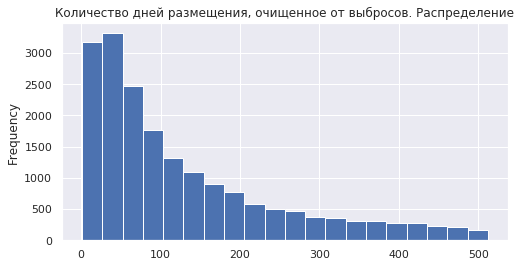

In [185]:
data_days_exposition_no_outliers['days_exposition'].plot(kind='hist', grid=True, bins=20);
plt.title('Количество дней размещения, очищенное от выбросов. Распределение');

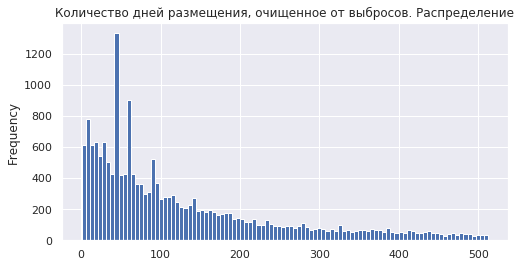

In [186]:
data_days_exposition_no_outliers['days_exposition'].plot(kind='hist', grid=True, bins=100);
plt.title('Количество дней размещения, очищенное от выбросов. Распределение');

Несмотря на то, что пик приходится на показатель 85 дней, все же значительное число объектов недвижимости продаются дольше.  

Посмотрим также как будет выглядеть диаграмм размаха для нового среза.

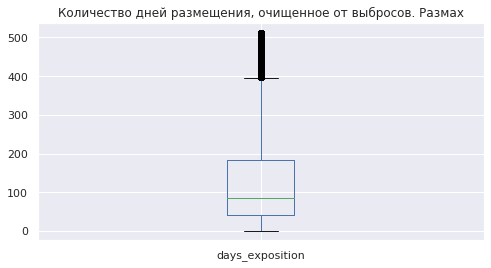

In [187]:
data_days_exposition_no_outliers['days_exposition'].plot(kind='box', grid=True);
plt.title('Количество дней размещения, очищенное от выбросов. Размах');

Здесь мы можем пронаблюдать верхнюю границу интерквантильного разсаха для навшего среза данных - 400 дней. Будем считать, что все, что расположено выше данной границы - "слишком долго".  
50% значений срока продажи у нас расположены в диапазоне от 1-го до 85-дней (разброс 85 дней), остальные 50% - от 85 до 512 (разброс более 400 дней). Отсюда и такое высокое значение стандартного отклонения. 

**Краткое резюме**

- Можно утверждать, что в среднем продажа занимает от 85 до 128 дней.  
- Если продажа заняла менее 41 дня - продажа прошла на удивление быстро. (для 91,9% данных 25% значений расположены ниже значения 41 день)  
- Если продажа заняла более 400 дней, можно полагать что продажа действительно затянулась (верхняя граница интерквантильного размаха для среза данных без выбросов, в который входит 91,9% от общего объема данных)

### Изучим факторы, которые больше всего влияют на стоимость квартиры.  

В данном разделе рассмотрим:  
- Зависит ли цена от площади
- Зависит ли цена от числа комнат
- Зависит ли цена от удалённости от центра
- Зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом.
- Зависит ли цена от от даты размещения: дня недели, месяца и года.

#### Зависит ли цена от площади

Для начала рассчитаем коэффициент корреляции Пирсона для двух столбцов: `last_price` и `total_area`.

In [188]:
data['last_price'].corr(data['total_area'])

0.6536750579657244

Коэффициент Пирсона 0,65 говорит о том, что действительно присутствует средней силы корреляция между этими двумя признаками.

Посмотрим на диаграмму разброса

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


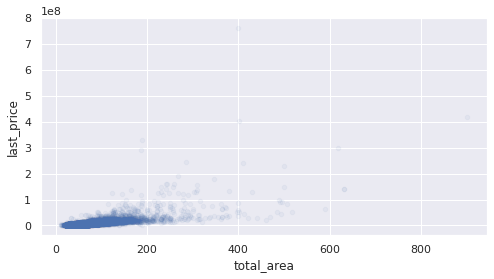

In [189]:
data[['last_price', 'total_area']].plot(x='total_area', y='last_price', kind='scatter', alpha=0.05);

Видно, что точки уплотняются в определенной зоне и выстраиваются в линию. Чем ывыше плотность точек, тем сильнее корреляция. Однако выбросы искажают картину.

Возьмем для анализа срез данных, в котором отсутствут выбросы по столбцам `last_price` и `total_area`

In [190]:
data_total_area_last_price_no_outliers = data.query(
    '@min_thresh_total_area <total_area < @max_thresh_total_area and @min_thresh_last_price < last_price < @max_thresh_last_price')

print('data_total_area_last_price_no_outliers содержит', 
      round(data_total_area_last_price_no_outliers.shape[0] / data.shape[0], 3)*100, 
      'процентов от общего числа объектов выгрузки')

data_total_area_last_price_no_outliers содержит 90.5 процентов от общего числа объектов выгрузки


Посчитаем коэффициент корреляции.

In [191]:
data_total_area_last_price_no_outliers['last_price'].corr(data_total_area_last_price_no_outliers['total_area'])

0.6944185364503246

Теперь коэффициент корреляции состаляет 0,69, что указывает нам на то, что корреляция между факторами даже более значительная.

Посмотрим на график разброса.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


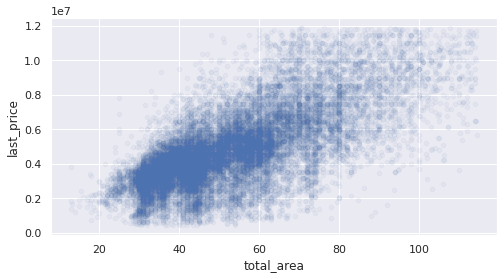

In [192]:
data_total_area_last_price_no_outliers.plot(x='total_area', y='last_price', kind='scatter', alpha=0.05);

Теперь гораздо более отчетливо видно, что точки плотно концентрируются на графике, и выстраиваются в линию.  

Посмотрим также как будет выглядеть взаимное распределение данных на графике `hexbin`.

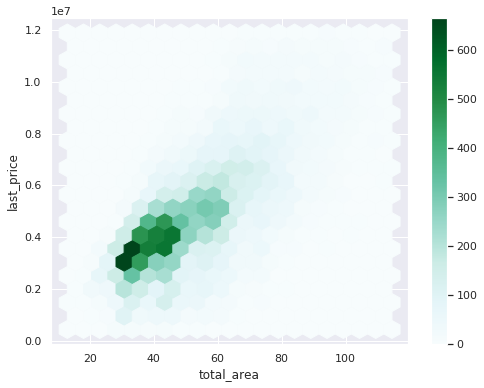

In [193]:
data_total_area_last_price_no_outliers.plot(x='total_area', y='last_price', kind='hexbin',gridsize=20, figsize=(8, 6), sharex=False, grid=True);

Можно заметить, что наибольшая плотность в распредении данных (а значит более сильная корреляция) приходится на значения площади 20-80 кв.м, при стоимости недвижимости от 1-го до 8-и млн.р.

**Краткое резюме:**

Присутствует положительная корреляция средней силы между площадью и ценой объекта недвижимости. Чем больше площадь объекта тем выше его стоимость.  
Наиболее тесная связь наблюдается в диапазоне площади 20-80 кв.м и диапазоне цены 1-8 млн.р.

#### Зависит ли цена от числа комнат

Сохраним срез данных, очищенный от выбросов в столбцах `rooms` и `last_price` в переменную `data_rooms_last_price_no_outliers`

In [194]:
data_rooms_last_price_no_outliers = data.query(
    '@min_thresh_rooms < rooms < @max_thresh_rooms and @min_thresh_last_price < last_price < @max_thresh_last_price')

print('data_rooms_last_price_no_outliers содержит', 
      round(data_rooms_last_price_no_outliers.shape[0] / data.shape[0], 3)*100, 
      'процентов от общего числа объектов выгрузки')

data_rooms_last_price_no_outliers содержит 90.4 процентов от общего числа объектов выгрузки


Построим гистограммы распределения стоимости для каждого значения количества комнат.

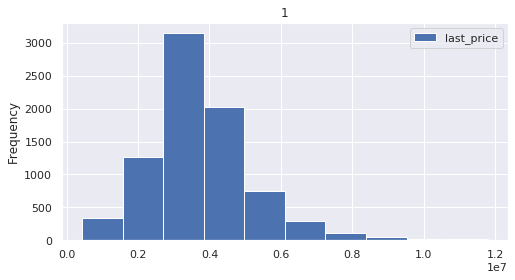

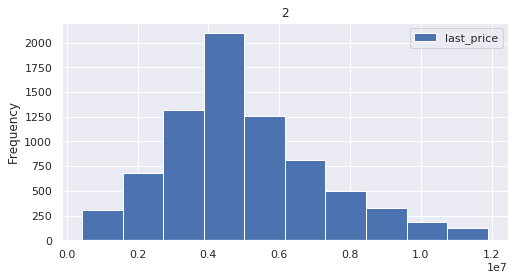

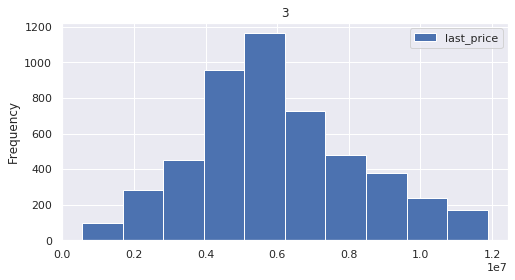

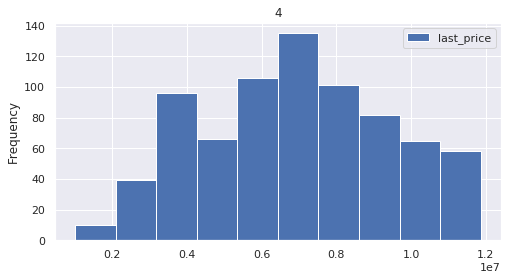

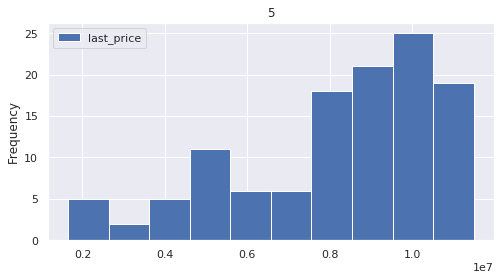

In [195]:
for room, data_grouped in data_rooms_last_price_no_outliers.groupby('rooms'):
    data_grouped.plot(y='last_price', kind='hist', title=room)

Хорошо видно, что для каждого значения количества комнат, значения стоимости распределены нормально. С данными все в порядке.

Посмотрим на значение коэффцицента Пирсона.

In [196]:
data_rooms_last_price_no_outliers['last_price'].corr(data_rooms_last_price_no_outliers['rooms'])

0.44372656187489334

Значение 0,44 указывает на то, что есть слабая положительная корреляция.

Посмотрим, как будет выглядеть диаграмма размаха.  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


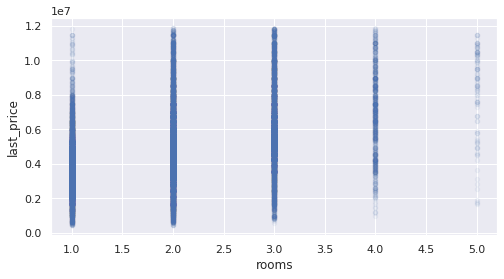

In [197]:
data_rooms_last_price_no_outliers.plot(x='rooms', y='last_price', kind='scatter', alpha=0.05);

Для того, чтобы было более наглядно, добавим на график линию тренда, а также увеличим прозачность, чтобы увидеть где сосредоточено большинство значений.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


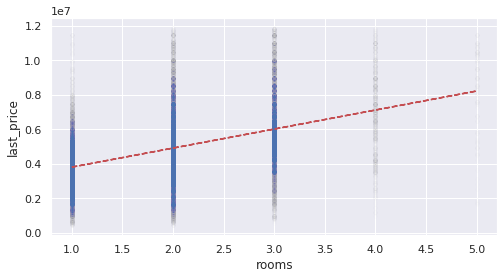

In [198]:
data_rooms_last_price_no_outliers.plot(x='rooms', y='last_price', kind='scatter', alpha=0.005);

x = data_rooms_last_price_no_outliers['rooms']
y = data_rooms_last_price_no_outliers['last_price']

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--");

Действительно, можно заметить, что есть небольшая корреляция и с увеличением количества комнат увеличивается цена недвижимости.

Не смотря на низкий показатель коэффциента линейной зависимости Пирсона, корреляция все же присутсвует. И мы можем отобразить ее еще более наглядно.

Сгруппируем данные по количеству комнат, и для значения найдем медианную стоимость. Сводную таблицу сохраним в переменную `pivot_rooms_last_price`

In [199]:
pivot_rooms_last_price = data_rooms_last_price_no_outliers.pivot_table(index='rooms', values='last_price', aggfunc='median')
pivot_rooms_last_price

last_price
rooms            
1         3600000
2         4650000
3         5700000
4         6985000
5         8945000

Построим график.

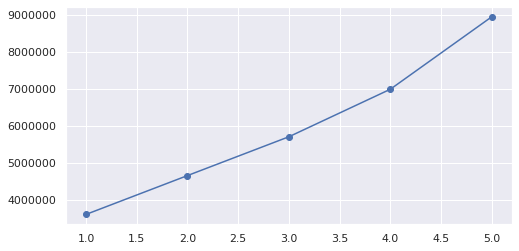

In [200]:
plt.plot(pivot_rooms_last_price, 'o-');

На графике очень хорошо видно, что прямо с увеличением количества комнат растет медианная стоимость объекта недвижимости.

**Краткое резюме**

Стоимость объекта недвижимости зависит от количества комнат. Не смотря на низкий показатель линейной корреляции Пирсона (0,44), можно утверждать, что чем больше комнат, тем в среднем для объекта будет выше стоимость.

#### Зависит ли цена от удалённости от центра

Посмотрим на распределение столбца `cityCenters_nearest`

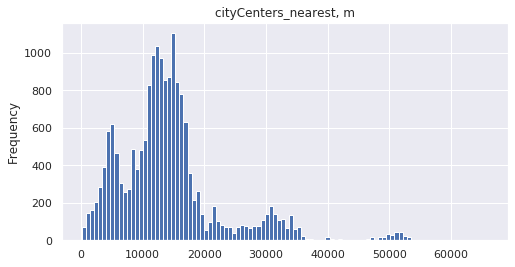

In [201]:
data['cityCenters_nearest'].plot(kind='hist', bins=100, title='cityCenters_nearest, m');

На графике видны 3 основных пика. Такое может быть, когда есть какие то 3 группы данных, объединенных каким-то единым признаком. 3 группы данных, в каждой из которых данные распределены нормально.

Посмотрим на коэффициент линейной корреляции Пирсона

In [202]:
data_last_price_no_outliers['cityCenters_nearest'].corr(data_last_price_no_outliers['last_price'])

-0.3458057017577241

Присутствует слабая отрицательная корреляция. Это означает, с увеличением расстояния до центра стоимость снижается

Посмотрим как выглядит график разброса.

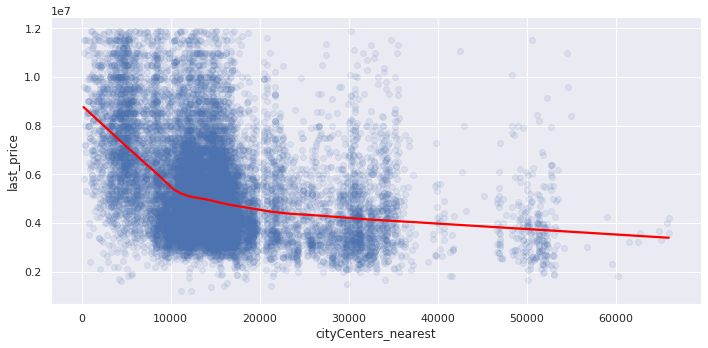

In [203]:
sns.lmplot(data=data_last_price_no_outliers,
           x='cityCenters_nearest',
           y='last_price',
           lowess=True, 
           aspect = 2,
           scatter_kws={'alpha': 0.1},
           line_kws={'color': 'red'});

Можно увидеть, что корреляция присутствует, но нелинейная.

**Краткое резюме**

Не смотря на то, что коэффициент линейной регрессии низкий (-0,34) и не смотря на высокий разброс значений на графике scatterplot, можно утверждать, что взаимосвязь между отдаленностью от центра и стоимостью присутсвует. Однако она нелинейная. По мере удаление от центра на дистанцию до 10000м стоимость снижается сначительно быстрее, нежели при удалении на дистанцию от 10000м и далее. 

#### Зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом.

Вспомним уникальные значения столбца `floor_cat`

In [204]:
data_last_price_no_outliers['floor_cat'].unique()

[First, Other, Last, Unknown]
Categories (4, object): [First, Other, Last, Unknown]

Посмотрим как распределена стоимость внутри каждой категории этажей.

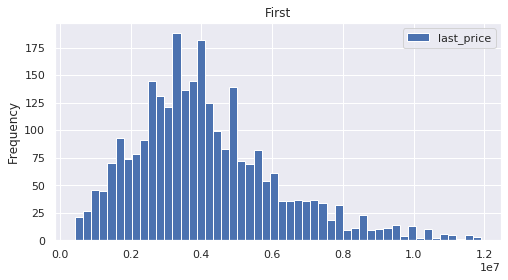

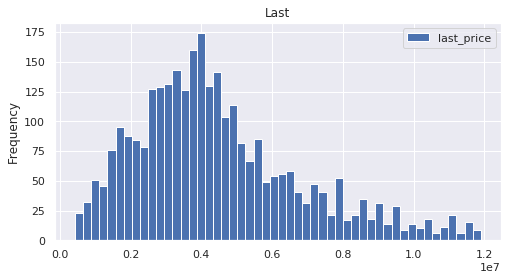

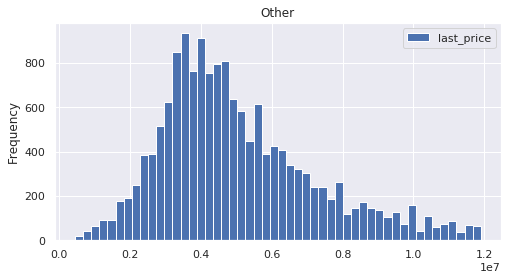

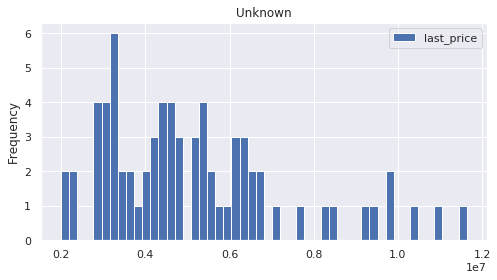

In [205]:
for category, grouped_data in data_last_price_no_outliers.groupby('floor_cat'):
    grouped_data.plot(y='last_price', kind='hist', title=category, bins=50)

Можно заметить, что распределение стоимости для категория **Unknown**, в которую вошли неизвестные значения этажа, не обладает формой нормального распределением в отличие от известных нам категорий этаже, которые ее все же напоминают. Категория **Unknown** неоднородна и может включать любую из ниже перечисленных категорий. Эту категорию мы включать в анализ не будем.

Создадим сводную таблицу, в которой для каждой категории этажа подсчитаем медианное значение стоимости.

In [206]:
data_last_price_no_outliers.query('floor_cat != "Unknown"').pivot_table(index='floor_cat', 
                                                                        values='last_price', 
                                                                        aggfunc='median')

last_price
floor_cat            
First         3830000
Last          4000000
Other         4600000

В целом видно, что цена квартир расположенных на последнем этаже выше, нежели цена квартир, расположенных на последнем этаже, а цена квартир, расположенных на ином этаже выше этих двух цен.

Однако это данные, которые обобщены по всем годам.  
Посмотрим, действительно ли такая закономерность наблюдается внутри каждого года.

Построим свобдную таблицу, в которой отобразим медианное значение цены для каждой категории этажа внутри каждого года.

In [207]:
data_last_price_no_outliers.query('floor_cat != "Unknown"').pivot_table(index='floor_cat',
                                                                        columns='year_first_exp',
                                                                        values='last_price', 
                                                                        aggfunc='median')

year_first_exp     2014     2015     2016     2017     2018     2019
floor_cat                                                           
First           4850000  3990000  3892000  3700000  3700000  4225000
Last            4075000  4245000  4000000  3950000  4050000  4275000
Other           5965000  5130000  4430000  4490000  4550000  5000000

Отобразим значения на графике.

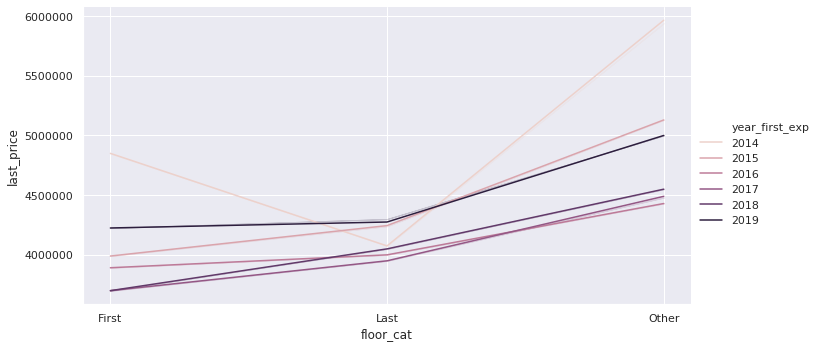

In [208]:
sns.relplot(data=data_last_price_no_outliers.query('floor_cat != "Unknown"'), 
            x='floor_cat', 
            y='last_price', 
            hue='year_first_exp', 
            kind='line',
            legend='full',
            aspect=2,
            estimator=np.median,
            ci=False);

Также, для наглядности отобразим данные на барчарте.

Чтобы увидеть общую тененденцию:

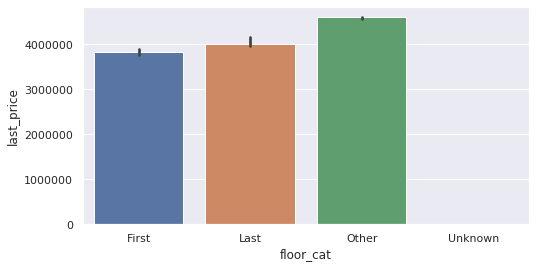

In [209]:
sns.barplot(x='floor_cat', 
            y='last_price', 
            estimator=np.median,
            data=data_last_price_no_outliers.query('floor_cat != "Unknown"'));

А так можно заметить выбивающийся год. Ну и общую тенденцию тоже можно увидеть, если хорошо присмотреться.

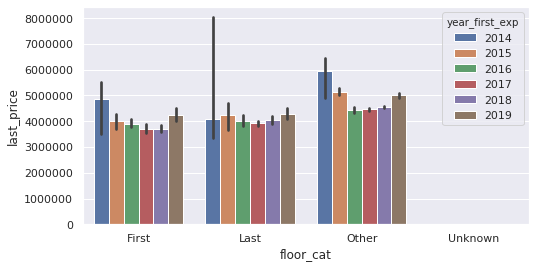

In [210]:
sns.barplot(x='floor_cat', 
            y='last_price', 
            estimator=np.median,
            hue='year_first_exp',
            data=data_last_price_no_outliers.query('floor_cat != "Unknown"'));

Видно, что график 2014 года сильно отличается от остальных. Интересно, чем это может быть вызвано.  
Посмотрим, на количество объявлений для каждого года.

In [211]:
data_last_price_no_outliers.groupby(['year_first_exp'])['last_price'].agg('count')

year_first_exp
2014      89
2015    1016
2016    2522
2017    7502
2018    7921
2019    2614
Name: last_price, dtype: int64

Итак, у нас собраны данные за 6 лет, с 2014 по 2019 года.  
В 2014 году было размещено меньше всего объявлений. Либо это связано с экономической ситуацией того года, либо просто выгрузка  включает в себя лишь часть объявлений за этот год.  

UPD:  
"В октябре 2014 года на сайте появился поиск по новостройкам Петербурга и Ленинградской области, в декабре площадка открыла конечным пользователям возможность самостоятельно публиковать объявления" (с) Википедия

Посмотрим на количество выложенных объявлений за каждый год по месяцам.

In [212]:
pivot_month_in_year_count = data_last_price_no_outliers.pivot_table(
    index=['year_first_exp'], 
    columns='month_first_exp', 
    values='last_price', 
    aggfunc='count').fillna(0)

pivot_month_in_year_count

month_first_exp     1       2      3      4      5      6      7      8   \
year_first_exp                                                             
2014               0.0     0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2015              46.0    53.0  102.0   43.0   58.0   81.0   80.0   74.0   
2016             109.0   236.0  317.0  386.0  393.0  418.0  132.0   82.0   
2017             264.0   390.0  201.0  595.0  520.0  625.0  526.0  681.0   
2018             549.0  1238.0  948.0  285.0  140.0  495.0  806.0  764.0   
2019             389.0   500.0  800.0  873.0   52.0    0.0    0.0    0.0   

month_first_exp     9      10      11     12  
year_first_exp                                
2014               0.0    0.0     7.0   82.0  
2015              75.0  129.0   141.0  134.0  
2016             109.0  105.0   121.0  114.0  
2017             901.0  859.0  1115.0  825.0  
2018             719.0  866.0   769.0  342.0  
2019               0.0    0.0     0.0    0.0

Видим, что в 2014 году данные были взяты только за ноябрь-декабрь, а в 2019 году - с января по май.  
Следовательно, анализ будем строить только на основании данных за 2015 - 2018 года.  
Сохраним срез данных за 2015-2018 года в переменную `data_last_price_no_outliers_4_years`

In [213]:
data_last_price_no_outliers_4_years = data_last_price_no_outliers.query('2015 <= year_first_exp <= 2018')

Построим график еще раз.

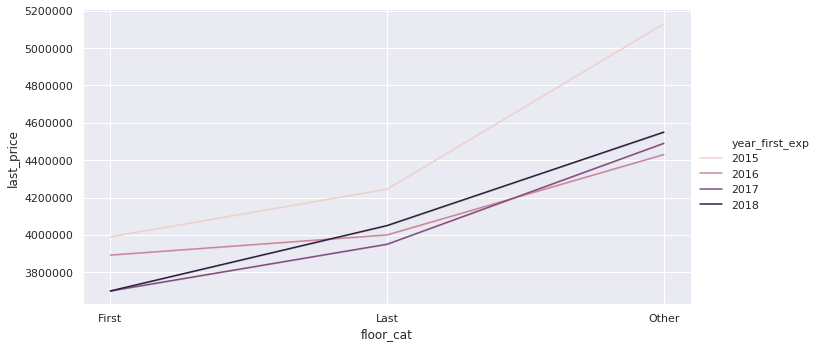

In [214]:
sns.relplot(data=data_last_price_no_outliers_4_years.query('floor_cat != "Unknown"'), 
            x='floor_cat', 
            y='last_price', 
            hue='year_first_exp', 
            kind='line',
            legend='full',
            aspect=2,
            estimator=np.median,
            ci=False);

Теперь тенденция проследживается явно. Если расположить цену квартир в порядке возрастания, то получится: "Первый этаж < Последний этаж < Другой этаж"

**Краткое резюме**

Зависимость между ценой квартиры и этажом, на котором она расположена присутствует.  
Цена квартир, расположенных на последнем этаже в среднем выше, чем цена квартир расположенных на первом этаже. При этом цена квартир, расположенных на ином этаже выше этих двух цен.

#### Зависит ли цена от от даты размещения: дня недели, месяца и года.

1. Проверим, зависит ли стоимость от года размещения.

Создадим сводную таблицу, в которой для каждого года рассчитаем медианную стоимость недвижимости (так как медианное значение более устойчиво к выбросам), а также количество выложенных объявлений.

In [215]:
data_last_price_no_outliers_4_years.groupby(['year_first_exp'])['last_price'].agg(['median', 'count'])

median  count
year_first_exp                
2015            4900000   1016
2016            4300000   2522
2017            4300000   7502
2018            4395000   7921

Посмотрим на гистограмму распределения стоимости по годам.

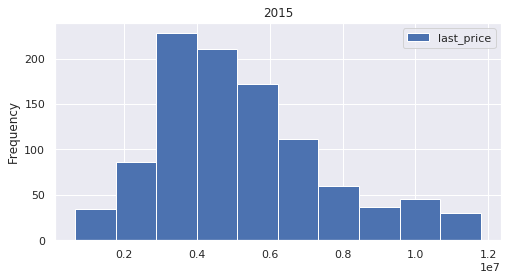

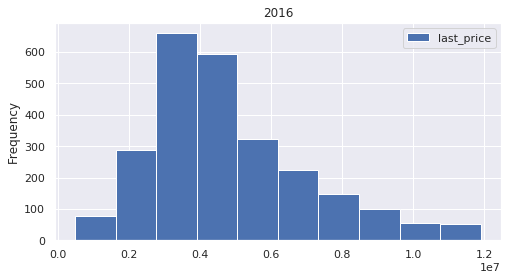

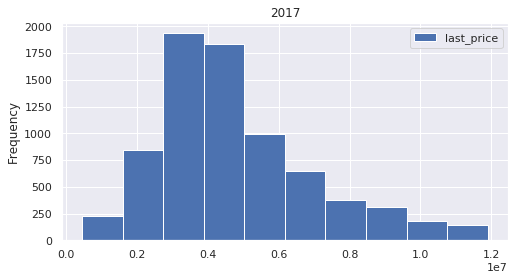

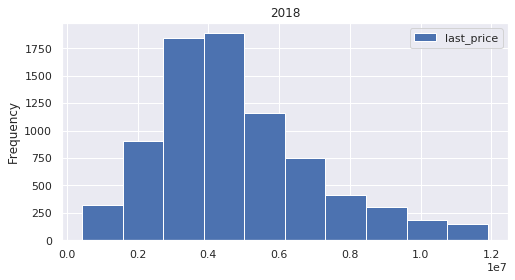

In [216]:
for year_exp, data_grouped in data_last_price_no_outliers_4_years.groupby('year_first_exp'):
    data_grouped.plot(kind='hist', title=year_exp, y='last_price')

В целом, форма напоминает нормальное распределение.

Построим график на основании данных из сводной таблицы.

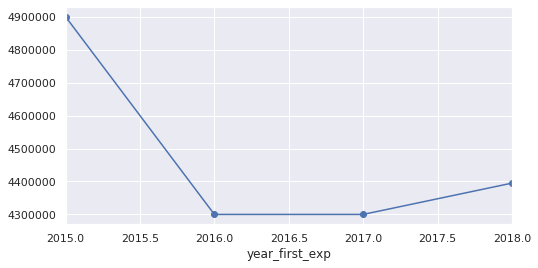

In [217]:
data_last_price_no_outliers_4_years.groupby(['year_first_exp'])['last_price'].median().plot(style='o-');

На графике хорошо видно, что с 2015 по 2016 год медианная стоимость недвижимости снизилась 5,5млн.р до 4,3 млн.р. С 2016 по 2017 год цена оставалась практически на одном уровне, после чего вплость до 2018 года произошло повышение до 4,4 млн.р.  
**Можно сделать предположение, что стоимость объектов недвижимости зависит от года размещения объявления.**

2. Проанализируем, зависит ли стоимость от месяца, когда было размещено объявление.

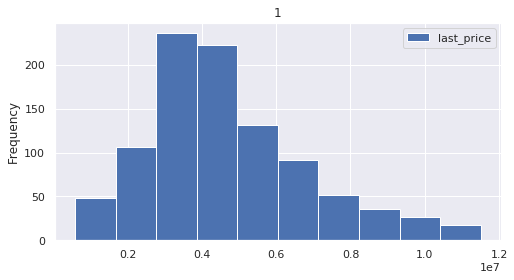

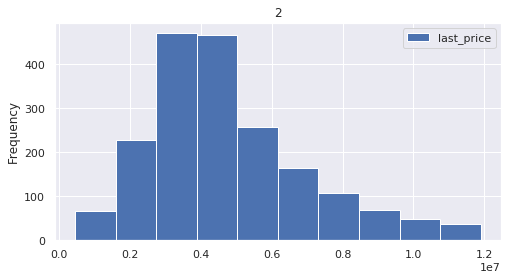

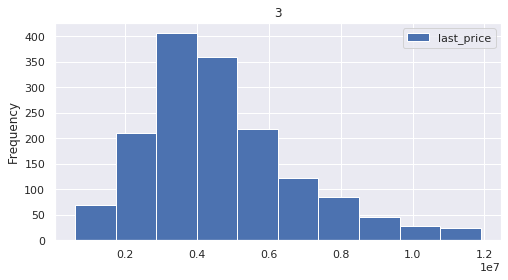

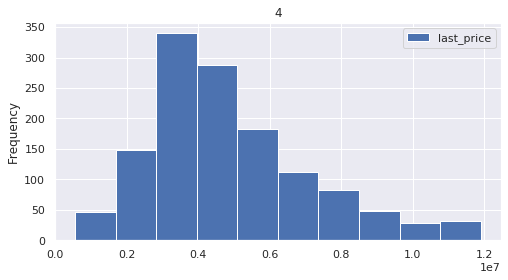

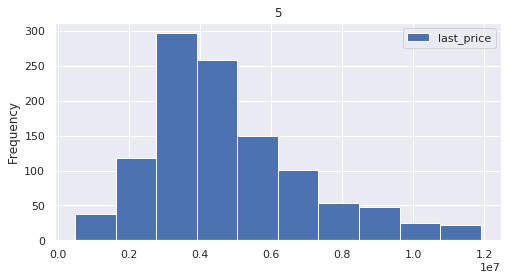

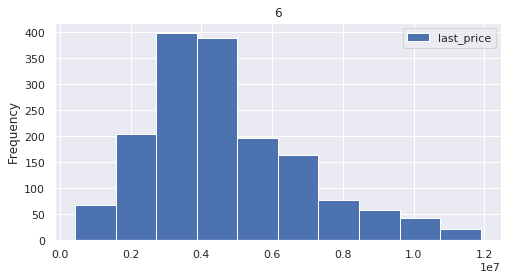

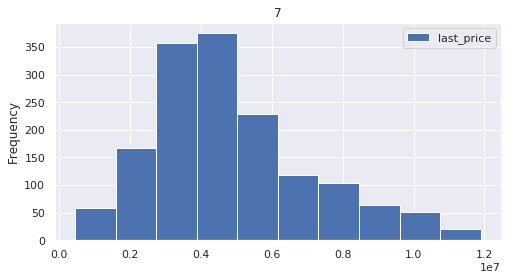

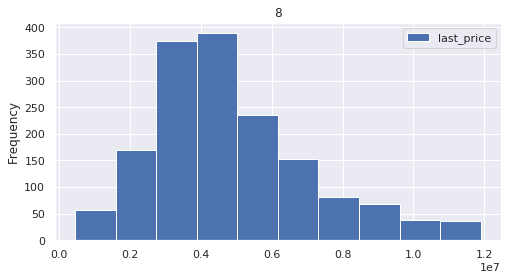

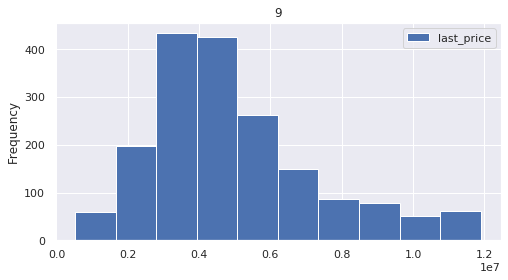

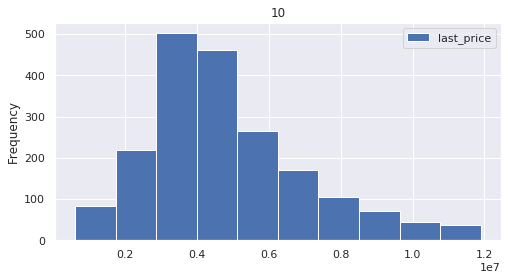

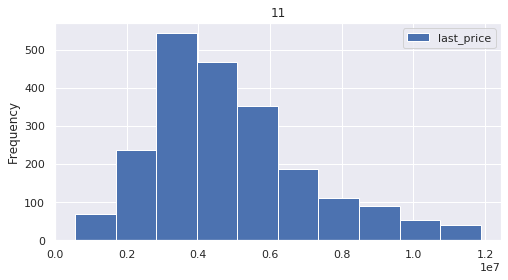

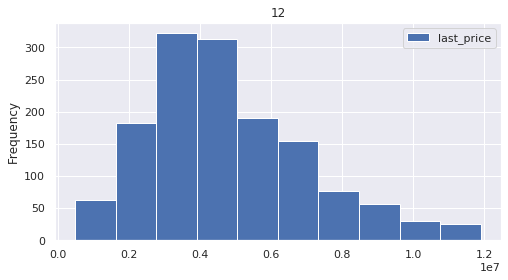

In [218]:
for month_exp, data_grouped in data_last_price_no_outliers_4_years.groupby('month_first_exp'):
    data_grouped.plot(kind='hist', title=month_exp, y='last_price')

Гистограммы стоимости для каждого месяца напоминают форму нормального распределения. С данными все в порядке.

Построим сводную таблицу и отобразим на ней медианную стоимость для каждого месяца, когда было выложено объявление, а также их количество.

In [219]:
data_last_price_no_outliers_4_years.groupby(['month_first_exp'])['last_price'].agg(['median', 'count'])

median  count
month_first_exp                  
1                4260000.0    968
2                4300000.0   1917
3                4250000.0   1568
4                4400000.0   1309
5                4350000.0   1111
6                4200000.0   1619
7                4380596.0   1544
8                4395000.0   1601
9                4401770.5   1804
10               4400000.0   1959
11               4450000.0   2146
12               4400000.0   1415

Построим график изменения стоимости по месяцам, чтобы посмотреть, есть ли какой-то паттерн. Каждый год выделим отдельной линией графика, чтобы анализировать непосредственно то, как себя вела цена внутри данного года. 

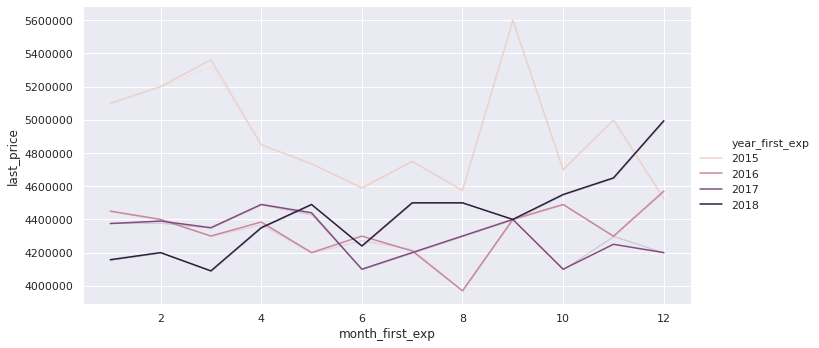

In [220]:
sns.relplot(data=data_last_price_no_outliers_4_years, 
            x='month_first_exp', 
            y='last_price', 
            hue='year_first_exp', 
            kind='line', 
            aspect=2,
            estimator=np.median,
            ci=False);

Как таковой паттерн отсутствует. Если бы стоимость зависела от месяца, то мы бы наблюдали на графике явное повышение или снижение цены в определенный промежутки времени. Такого поведения мы не наблюдаем. Следовательно, можно сделать вывод, что **стоимость недвижимости не зависит от месяца, когда было выложено объявление**

3. Проанализируем зависимость дня недели, когда было выложено объявление и стоимости.

Построим сводную таблицу и отобразим на ней медианную стоимость для каждого месяца, когда было выложено объявление, а также их количество.

In [221]:
data_last_price_no_outliers_4_years.groupby(['dayofweek_first_exp'])['last_price'].agg(['median', 'count'])

median  count
dayofweek_first_exp                
0                    4350000   2841
1                    4399000   3304
2                    4400000   3161
3                    4350000   3408
4                    4300000   3291
5                    4350000   1584
6                    4350000   1372

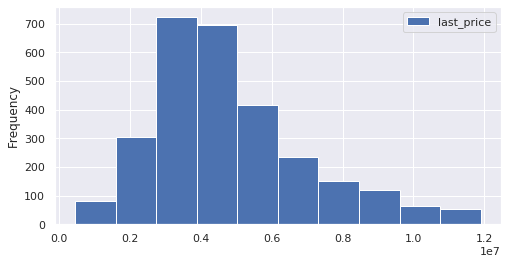

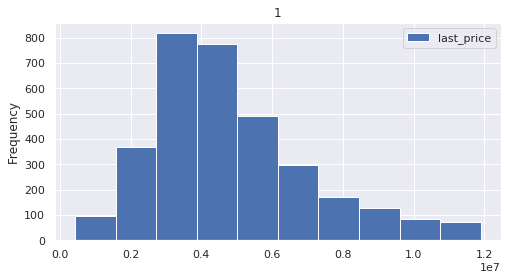

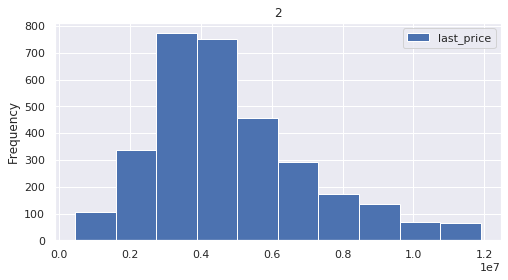

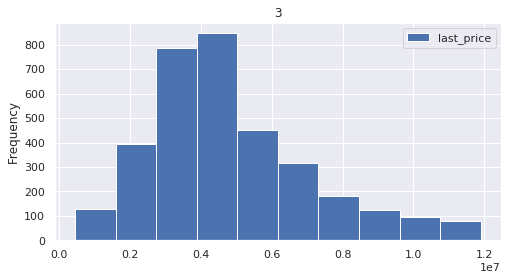

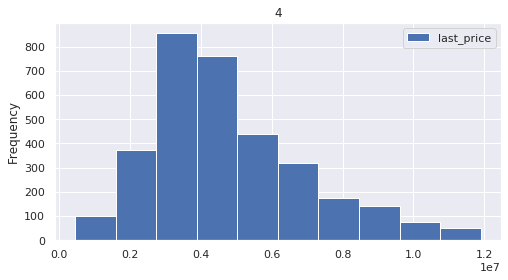

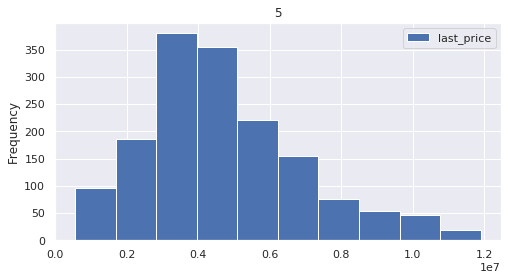

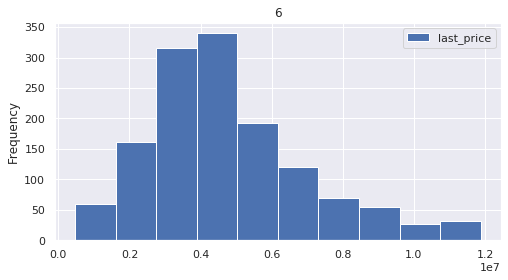

In [222]:
for day_exp, data_grouped in data_last_price_no_outliers_4_years.groupby('dayofweek_first_exp'):
    data_grouped.plot(kind='hist', title=day_exp, y='last_price')

Гистограммы стоимости для каждого дня недели напоминают форму нормального распределения. С данными все в порядке.

Построим график изменения стоимости по дням недели, чтобы посмотреть, есть ли какой-то паттерн. Каждый месяц выделим отдельной линией графика, чтобы анализировать непосредственно то, как себя вела цена внутри данного месяца по дням недели. 

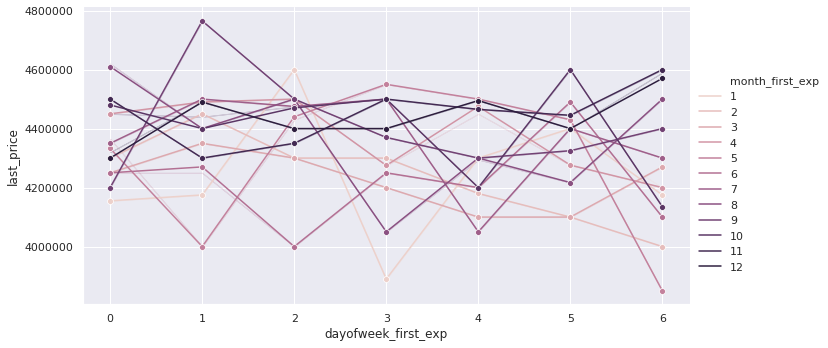

In [223]:
sns.relplot(data=data_last_price_no_outliers_4_years, 
            x='dayofweek_first_exp', 
            y='last_price', 
            hue='month_first_exp', 
            kind='line', legend='full',
            aspect=2,
            estimator=np.median, marker='o',
            ci=False);

Паттерн отсутствует. Если бы стоимость зависела от дня недели, то мы бы наблюдали на графике явное повышение или снижение цены в определенный промежутки времени внутри каждого месяца. Такого поведения мы не наблюдаем. Следовательно, можно сделать вывод, что **стоимость недвижимости не зависит от дня недели, когда было выложено объявление**

**Краткое резюме**

На основании проведенного анализа, мы выявили, что:  
- Стоимость недвижимости зависит от года, когда было выложено объявление. Это может быть связано с конкретной экономической ситуацией, присущей для каждого года.
- Стоимость недвижимости не зависит ни от дня недели, ни от месяца, когда было выложено объявление.

#### Вывод

В данном разделе мы рассмотрели:  
- Зависит ли цена от площади
- Зависит ли цена от числа комнат
- Зависит ли цена от удалённости от центра
- Зависит ли цена от того, на каком этаже расположена квартира: первом, последнем или другом.
- Зависит ли цена от даты размещения: дня недели, месяца и года.  

На основании проведенного анализа, было выявлено, что:  
- Цена недвижимости зависит от площади. Присутствует прямая линейная зависимость.
- Цена недвижимости зависит от числа комнат. Чем больше комнат, тем в среднем выше стоимость на недвижимость.
- Цена недвижимости зависит от удаленности от центра, однако зависимость нелинейна. При отдалении от центра на расстояние до 10000м цена падает быстрее, нежели при отдалении отцентра на расстояние от 10000м и далее.
- Цена недвижимости зависит от того, на каком этаже она расположена. "Цена квартиры на первом этаже" < "Цена квартиры на последнем этаже"  < "Цена квартиры ином этаже".
- Цена недвижимости зависит от года размещения объявления, однако не зависит ни от дня недели, ни от месяца размещения.

### Выберем 10 населённых пунктов с наибольшим числом объявлений. Выделим среди них населённые пункты с самой высокой и низкой стоимостью жилья.    

Создадим сводную таблицу, в которую сохраним медианную цену недвижимости для каждого населенного пункта, а также количество выложенных объявлений.

In [224]:
pivot_locality_name_sqm_price = data_last_price_no_outliers.pivot_table( 
    index='locality_name', 
    aggfunc={'last_price': 'count', 'sqm_price': 'median'}) #создадим сводную таблицу

pivot_locality_name_sqm_price.columns = ['count', 'sqm_price'] #зададим имена столбцам

pivot_locality_name_sqm_price_top_10 = pivot_locality_name_sqm_price.sort_values(by=('count'), 
                                                                                 ascending=False).head(10) #отсортируем значения

pivot_locality_name_sqm_price_top_10 #выведем на экран

count  sqm_price
locality_name                    
Санкт-Петербург  13762   101887.0
Мурино             590    86175.5
Кудрово            470    95555.0
Шушары             440    76876.0
Всеволожск         397    65789.0
Пушкин             339    98438.0
Колпино            336    74690.0
Парголово          327    91643.0
Гатчина            305    67696.0
Выборг             236    58133.0

In [225]:
#отобразим вывод по разделу на экране

print(f'''Наибольшая средняя стоимость квадратного метра (среди топ-10 город по количеству размещенных объявлений составляет): 
{pivot_locality_name_sqm_price_top_10.sqm_price.max()} руб/кв.м. 
Это средняя стоимость квадратного метра в городе: 
{pivot_locality_name_sqm_price_top_10.query('sqm_price == @pivot_locality_name_sqm_price_top_10.sqm_price.max()').index[0]}.


Наименьшая средняя стоимость квадратного метра (среди топ-10 город по количеству размещенных объявлений составляет): 
{pivot_locality_name_sqm_price_top_10.sqm_price.min()} руб/кв.м. 
Это средняя стоимость квадратного метра в городе: 
{pivot_locality_name_sqm_price_top_10.query('sqm_price == @pivot_locality_name_sqm_price_top_10.sqm_price.min()').index[0]}
''')

Наибольшая средняя стоимость квадратного метра (среди топ-10 город по количеству размещенных объявлений составляет): 
101887.0 руб/кв.м. 
Это средняя стоимость квадратного метра в городе: 
Санкт-Петербург.


Наименьшая средняя стоимость квадратного метра (среди топ-10 город по количеству размещенных объявлений составляет): 
58133.0 руб/кв.м. 
Это средняя стоимость квадратного метра в городе: 
Выборг



### Изучим предложение квартир в Санкт-Петербурге. Выясним какая область входит в центр.

#### Создадим нужный срез данных

Создадим срез данных, который будет включать квартиры, расположенные в Санкт-Петербурге. Удалим из него строки, в которых пропущено расстояние до центра.

In [226]:
data_spb = data.query('locality_name == "Санкт-Петербург"').dropna(subset=['cityCenters_nearest'])

#### Добавим столбец с расстоянием в км до центра города.

Создадим столбец с расстоянием до центра в километрах. Значения округлим до ближайшего целого числа.

In [228]:
data_spb['cityCenters_nearest_km'] = [
    (data_spb.cityCenters_nearest[i] // 1000 + 1) 
    if data_spb.cityCenters_nearest[i] % 1000 >= 500 
    else data_spb.cityCenters_nearest[i] // 1000 
    for i in data_spb.index
]

data_spb['cityCenters_nearest_km'] = pd.to_numeric(data_spb['cityCenters_nearest_km'], downcast='integer')

Проверим результат заполнения.

In [229]:
data_spb[['cityCenters_nearest', 'cityCenters_nearest_km']].head(5)

cityCenters_nearest  cityCenters_nearest_km
0              16028.0                      16
2              13933.0                      14
3               6800.0                       7
4               8098.0                       8
7              11634.0                      12

Данные заполнены корректно.

#### Очистим `data_spb` от выбросов в столбце `last_price`

In [230]:
data_spb.describe()['last_price'].apply("{:,.0f}".format)

count         15,660
mean       8,032,783
std       12,969,982
min           12,190
25%        4,200,000
50%        5,500,000
75%        8,130,000
max      763,000,000
Name: last_price, dtype: object

Посмотрим на количество выбросов в столбце `last_price` для Санкт-Петербурга.

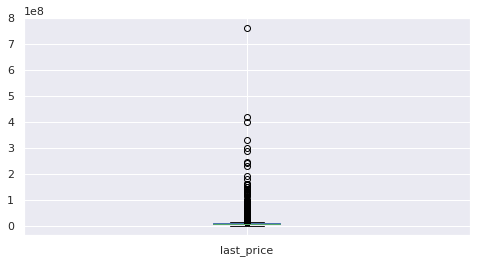

In [231]:
data_spb.last_price.plot(kind='box');

Выбросы есть. И скорее всего они помешают анализу и восприятию графиков. Избавимся от них.  
Сохраним новый срез в переменной `data_spb_last_price_no_outliers`

In [232]:
min_thresh_spb_last_price, max_thresh_spb_last_price = set_thresh(data_spb['last_price'])
print('Диапазон значение last_price для data_spb, исключающий выбросы', (min_thresh_spb_last_price, max_thresh_spb_last_price))

data_spb_last_price_no_outliers = data_spb.query('@min_thresh_spb_last_price <= last_price <= @max_thresh_spb_last_price')
print('Количество выбросов, которые были исключены из среза данных:', data_spb.shape[0] - data_spb_last_price_no_outliers.shape[0])
print('Их доля составляет:', 
      round(abs((data_spb_last_price_no_outliers.shape[0] - data_spb.shape[0]) / data_spb.shape[0]), 3), 
      'от всего объема данных')

Диапазон значение last_price для data_spb, исключающий выбросы (12190, 14025000.0)
Количество выбросов, которые были исключены из среза данных: 1331
Их доля составляет: 0.085 от всего объема данных


Посмотим на максимальные и минимальные значения столбца `cityCenters_nearest` для `data_spb_last_price_no_outliers`

In [233]:
data_spb_last_price_no_outliers.describe()['cityCenters_nearest']

count    14329.000000
mean     12046.732849
std       4657.731183
min        208.000000
25%       9380.000000
50%      12582.000000
75%      15103.000000
max      29493.000000
Name: cityCenters_nearest, dtype: float64

#### Проанализируем, где располагается область, которая входит центр города

Построим график, на котором отобразим медианные значения цены для каждого километра, а также отобразим линию тренда.

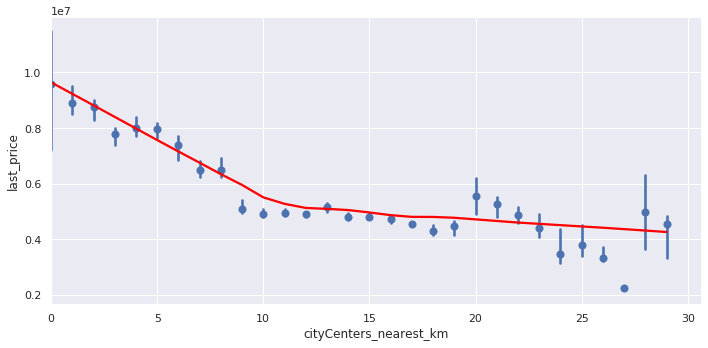

In [234]:
graph = sns.lmplot(data=data_spb_last_price_no_outliers,
                   x='cityCenters_nearest_km',
                   y='last_price',
                   lowess=True, 
                   aspect=2, height=5, 
                   x_estimator=np.median,
                   scatter_kws={'alpha': 1.},
                   line_kws={'color': 'red'});
plt.xlim(0);

Хорошо заметно, что по мере приближения к центру от 30-го до 11-го километра цена растет достаточно плавно, в то время как начиная с 10 км виден сильный перелом, и скорость прироста цены увеличивается.  
Можно предположить, что область от 0 до 10 км включительно входит в центр города.

#### Вывод:

На основании проведенного анализа можно утверждать, что область от 0-го до 10-го км удаленности от центра входит в центр города.

### Выделим сегмент квартир в центре. Проанализируем эту территорию. Сравним с данными по городу в целом.

В ходе анализа будут изучены следующие параметры:  
- Площадь
- Цена
- Число комнат
- Высота потолков

#### Подготовка данных к анализу

Создадим столбец в датафрейме `data_spb`, в котором укажем, находится ли объект внутри центра города, либо же за его пределами.  
Будем считать, что все объекты расположенные на расстоянии 10 км от центра включительно расположены в центре города.

In [235]:
data_spb['is_center'] = [1 
                         if data_spb.cityCenters_nearest_km[i] <= 10 
                         else 0 
                         for i in data_spb.index]

Проверим результат заполнения.

In [236]:
data_spb[['cityCenters_nearest_km', 'is_center']].head()

cityCenters_nearest_km  is_center
0                      16          0
2                      14          0
3                       7          1
4                       8          1
7                      12          0

Посмотрим, как распределено количество объектов, расположенных на переферии и в центре между собой.

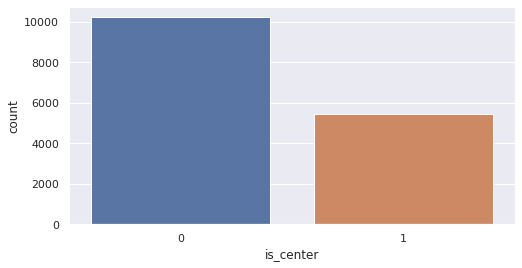

In [237]:
sns.countplot(x=data_spb['is_center']);

In [238]:
data_spb.groupby('is_center')['cityCenters_nearest_km'].count()

is_center
0    10229
1     5431
Name: cityCenters_nearest_km, dtype: int64

Объектов, расположенных на переферии Санкт-Петербурга примерно в 2 раза больше чем объектов, расположенных в центре города.

Можем переходить к анализу.

#### Площадь

In [239]:
data_spb['total_area'].describe()

count    15660.000000
mean        64.658142
std         40.222451
min         12.000000
25%         42.000000
50%         55.000000
75%         74.500000
max        900.000000
Name: total_area, dtype: float64

Средняя площадь для Санкт-Петербурга составляет 64 кв.м, медианная площадь - 55 кв.м. Стандартное отклонение в 40кв.м достаточно велико. Возможно, это вызвано очень большим диапазоном минимиального  - максимального занчения: 12 - 900 кв.м.

Построим диаграмму размаха и гистограмму, чтобы посмотреть на распределение.

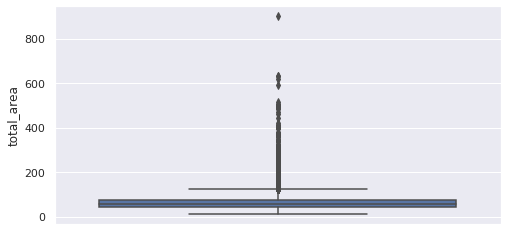

In [240]:
sns.boxplot(data=data_spb, y='total_area');

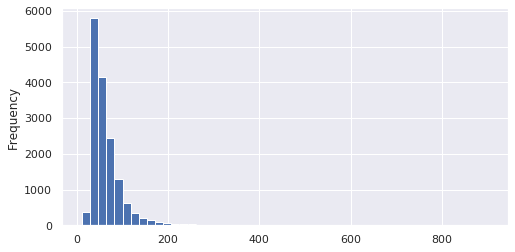

In [241]:
data_spb['total_area'].plot(kind='hist', bins=50, grid=True);

Гистограмма напоминает форму нормального распределения.  Очень длинный хвост справа может быть объяснен тем, что присутсвуют выбросы, редкие значение, которые выбиваются из общей картины. Их также очень хорошо видно на графике разброса. Очистим от них данные.  
Сохраним срез данных в переменной `data_spb_total_area_no_outliers`

In [242]:
min_thresh_spb_total_area, max_thresh_spb_total_area = set_thresh(data_spb['total_area'])

print('Диапазон значение total_area для data_spb, исключающий выбросы', (min_thresh_spb_total_area, max_thresh_spb_total_area))

data_spb_total_area_no_outliers = data_spb.query('@min_thresh_spb_total_area <= total_area <= @max_thresh_spb_total_area')
print('Количество выбросов, которые были исключены из среза данных:', data_spb.shape[0] - data_spb_total_area_no_outliers.shape[0])
print('Их доля составляет:', 
      round(abs((data_spb_total_area_no_outliers.shape[0] - data_spb.shape[0]) / data_spb.shape[0]), 3), 
      'от всего объема данных')

Диапазон значение total_area для data_spb, исключающий выбросы (12.0, 123.2)
Количество выбросов, которые были исключены из среза данных: 902
Их доля составляет: 0.058 от всего объема данных


In [243]:
data_spb_total_area_no_outliers.describe()['total_area']

count    14758.000000
mean        57.465612
std         21.618511
min         12.000000
25%         41.000000
50%         53.000000
75%         70.000000
max        123.200000
Name: total_area, dtype: float64

Среднее значение сократилось с 64 до 57 кв.м., медианное - с 55 до 53. Что важно, стандартное отклонение сократилось пратически в 2 раза - с 40 до 21,6 кв.м

Посмотрим как отличаются средние значения площади для центра города и для переферии.

Зададим функции для 25 и 75 персентиля, чтобы использовать их для агрегации в groupby.

In [244]:
# 25 персентиль
def q25(x):
    return x.quantile(0.25)

# 75 персентиль
def q75(x):
    return x.quantile(0.75)

Посмотрим на размах площади для квартир расположенных в центре и вне него.

In [245]:
data_spb_total_area_no_outliers.groupby('is_center')['total_area'].agg([q25, np.median, q75]).transpose() 

is_center     0     1
q25        39.1  45.6
median     49.0  63.0
q75        63.3  84.0

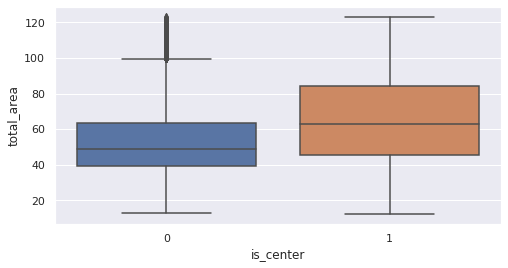

In [246]:
sns.boxplot(data=data_spb_total_area_no_outliers, y='total_area', x='is_center');

Видно, что для квартир в центре в среднем характерна большая площадь (63 кв.м против 49).  
На диаграмме размаха также можно заметить, что интерквантильный размах значений площади для квартир в центре также выше: для квартир в центре эти значения лежат в диапазоне 45,4-84 кв.м, для остальных - 39,1 - 63,3 кв.м.

Посмотрим на распределение площади для двух категорий. (кваhтир в центре и вне центра)

In [247]:
#зададим функцию, которая будет строить парную гистограмму с нормализованными значениями.

def pair_hist(data, column, bins=20, kde=True, norm=True, title=None):
    fig, ax = plt.subplots()
    sns.distplot(a=data.query('is_center == 1')[column], 
             norm_hist=norm, 
             label='center',
             color='green', kde=kde,
             bins=bins, 
             hist_kws=({"alpha": 0.5}), 
             kde_kws=({"lw": 3}));

    sns.distplot(a=data.query('is_center == 0')[column],  
             norm_hist=norm, 
             label='non-center',
             color='red', kde=kde,
             bins=bins,
             hist_kws=({"alpha": 0.5}),
             kde_kws=({"lw": 3}));
    ax.legend();
    ax.set_title(title)
    return

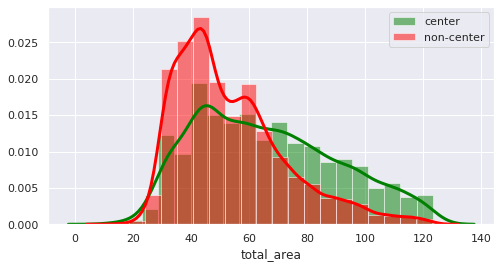

In [248]:
pair_hist(data_spb_total_area_no_outliers, 'total_area')

Обе гистограммы напоминают форму нормального распределения. Хорошо видно, что у квартир в центре правый хвост более выражен, что еще раз показывает, тот факт, что квартиры в центре чаще имеют большую площадь.

**Краткое резюме**

- Средняя площадь квартир в центре (63 кв.м) больше нежели в остальной части города (49, кв.м.)  
- 50% значений площади для квартир в центре находится в диапазоне 45,4-84 кв.м, в то время как для квартир в других частях города - 39,1 - 63,3 кв.м.

#### Цена

Ранее мы сохранили в переменную `data_spb_last_price_no_outliers` значения стоимости, очищенные от выбросов по столбцу `last_price`. Однако там отсутствовал столбец `is_center`. Придется создать срез еще раз. Перезапишем срез в ту же переменную.  

In [249]:
min_thresh_spb_last_price, max_thresh_spb_last_price = set_thresh(data_spb['last_price'])
data_spb_last_price_no_outliers = data_spb.query('@min_thresh_spb_last_price <= last_price <= @max_thresh_spb_last_price')

print('Диапазон значение last_price для data_spb, исключающий выбросы', (min_thresh_spb_last_price, max_thresh_spb_last_price))
print('Количество выбросов, которые были исключены из среза данных:', data_spb.shape[0] - data_spb_last_price_no_outliers.shape[0])
print('Их доля составляет:', 
      round(abs((data_spb_last_price_no_outliers.shape[0] - data_spb.shape[0]) / data_spb.shape[0]), 3), 
      'от всего объема данных')

Диапазон значение last_price для data_spb, исключающий выбросы (12190, 14025000.0)
Количество выбросов, которые были исключены из среза данных: 1331
Их доля составляет: 0.085 от всего объема данных


In [250]:
data_spb_last_price_no_outliers.describe()['last_price'].apply("{:,.0f}".format)

count        14,329
mean      5,979,708
std       2,530,973
min          12,190
25%       4,100,000
50%       5,250,000
75%       7,200,000
max      14,000,000
Name: last_price, dtype: object

Посмотрим, насколько различается средняя цена для квартир в центре и в остальной части города.

In [251]:
data_spb_last_price_no_outliers.groupby('is_center')['last_price'].agg([q25, np.median, q75]) 

q25   median      q75
is_center                           
0          3920000  4835000  6210000
1          5000000  6900000  9300000

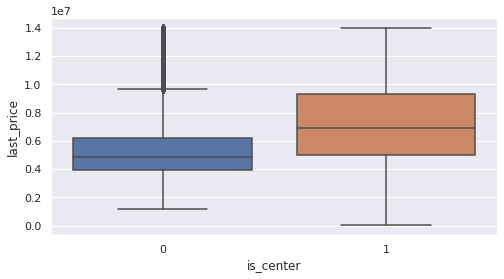

In [252]:
sns.boxplot(data=data_spb_last_price_no_outliers, y='last_price', x='is_center');

На графике размаха видно, что медианная цена квартир в центре (6,9 млн. р) выше, чем в остальной части города (4,8 млн.р.). Также для центра характерен больший разброс цены (5-9,3 млн.р), нежели для квартир в остальной части города (3,9-6,2 млн.р)

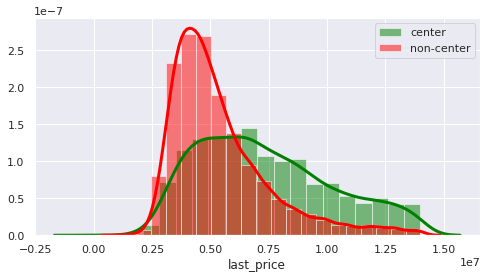

In [253]:
pair_hist(data_spb_last_price_no_outliers, 'last_price')

Формы распределения напоминают нормальное.  
При этом для квартир в центре характерно наличие большего количества объектов по более высокой стоимости и больший разброс значений, за счет чего гистограмма получилась более сглаженная, в то время как для квартир вне центра цена меньше варьируется и гораздо более сконцентрирована вокруг среднего значения.

**Краткое резюме**

- Стоимость квартир в центре в среднем выше, нежели за его пределами. (6,9 млн. р против 4,8 млн.р.)  
- При этом цена квартир в центре обладает большим отклонением от среднего, в то время как цена квартир за пределами центра обладает меньшей вариативностью и сильнее сконцентрирована вокруг среднего значения.  
- 50% значений цены для квартир в центре назодятся в диапазоне 5-9,3 млн.р, в то время как для квартир в остальной части города - в диапазоне 3,9-6,2 млн.р.

#### Число комнат

In [254]:
data_spb.describe()['rooms']

count    15660.000000
mean         2.171073
std          1.146765
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Среднее количество комнат для Санкт-Петербурга - 2.

Посмотрим как будет выглядеть диаграмма размаха для этих двух зон.

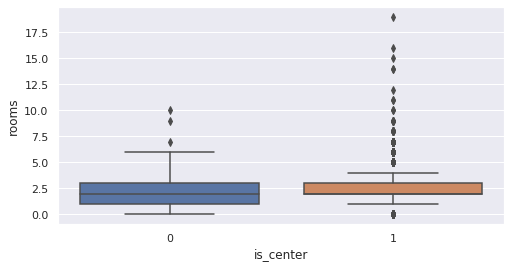

In [255]:
sns.boxplot(data=data_spb, y='rooms', x='is_center');

Видно, что для квартир в центре характерно в редких случаях наличие более 3-х комнат. Максимальное количество - 19 комнат.  
Для объектов за пределами центра также есть есть несколько значений выше 3-х комнат, однако в данном случае они не превышают 10-и.  
Однако, для того, чтобы эти редкие значения не мешали проанализировать общие тенденции от них все же придется избавиться.

In [256]:
min_thresh_spb_rooms, max_thresh_spb_rooms = set_thresh(data_spb['rooms'])
data_spb_rooms_no_outliers = data_spb.query('@min_thresh_spb_rooms <= rooms <= @max_thresh_spb_rooms')

print('Диапазон значение rooms для data_spb, исключающий выбросы', (min_thresh_spb_rooms, max_thresh_spb_rooms))
print('Количество выбросов, которые были исключены из среза данных:', data_spb.shape[0] - data_spb_rooms_no_outliers.shape[0])
print('Их доля составляет:', 
      round(abs((data_spb_rooms_no_outliers.shape[0] - data_spb.shape[0]) / data_spb.shape[0]), 3), 
      'от всего объема данных')

Диапазон значение rooms для data_spb, исключающий выбросы (0, 6.0)
Количество выбросов, которые были исключены из среза данных: 85
Их доля составляет: 0.005 от всего объема данных


In [257]:
data_spb_rooms_no_outliers.groupby('is_center')['rooms'].agg([q25, np.median, q75]).transpose()

is_center  0  1
q25        1  2
median     2  2
q75        3  3

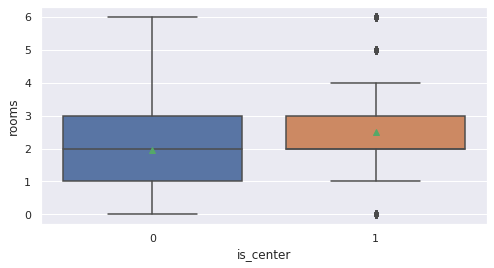

In [258]:
sns.boxplot(data=data_spb_rooms_no_outliers, y='rooms', x='is_center', showmeans=True);

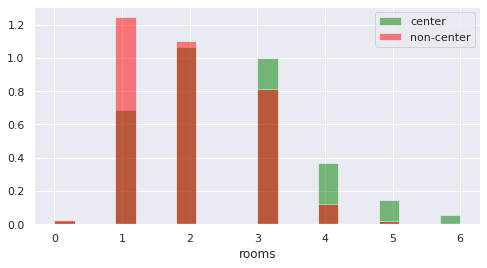

In [259]:
pair_hist(data_spb_rooms_no_outliers, 'rooms', kde=False)

Интересное наблюдение: Средние (медианные) значения для количества комнат - совпадают (2). Однако среднее значение у центральных квартир расположено чуть выше, нежели у квартир вне центральной части города.  

Обратим также внимание на гистограмму. Видно, что доля квартир с количеством комнат 3 и больше преобладает среди объектов, расположенных внутри центральной части города, нежели доля таковых за его пределами. Среди объектов недвижимости за пределами центра преобладают 1 - 2-х комнатные квартиры.

**Краткое резюме**

- Среднее количество комнат для квартир, расположеных в центре и за его пределами составляет 2 комнаты.  
- Однако для центральной части города характерно большее наличие квартир с 3-мя и большим количеством комнат, в то время как для переферии города характерно большее наличие квартир с 1 - 2-мя комнатами. 

#### Высота потолков

In [260]:
data_spb.describe()['ceiling_height']

count    10073.000000
mean         2.803164
std          1.298763
min          1.000000
25%          2.550000
50%          2.700000
75%          2.850000
max        100.000000
Name: ceiling_height, dtype: float64

Срежняя высота потолков для Санкт-Петербурга - 2,8м, в то время как медиана находится на значении 2,7м. В целом, значения расположены достаточно близко.  

Подорительными кажется значения 1м и 100м.  
Посмотрим на наличие выбросов в целом. Для этого построим график разброса. А также посмотрим, как выглядит распределение на гистограмме.

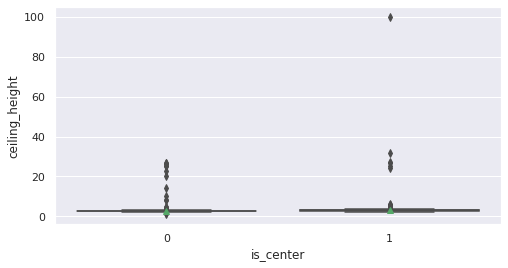

In [261]:
sns.boxplot(data=data_spb, y='ceiling_height', x='is_center', showmeans=True);

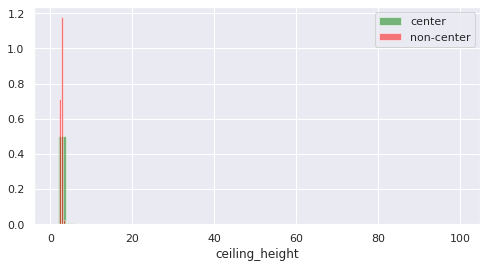

In [262]:
pair_hist(data_spb, 'ceiling_height', kde=False, bins=50)

Из за выбивающихся значений (выбросов) сложно воспринимать гистограмму.  
Наличие выбросов явно прослеживается на обоих графиках. Очистим данные от них.

In [263]:
min_thresh_spb_ceiling_height, max_thresh_spb_ceiling_height = set_thresh(data_spb['ceiling_height'])
data_spb_ceiling_height_no_outliers = data_spb.query('@min_thresh_spb_ceiling_height <= ceiling_height <= @max_thresh_spb_ceiling_height')

print('Диапазон значение ceiling_height для data_spb, исключающий выбросы', (min_thresh_spb_ceiling_height, max_thresh_spb_ceiling_height))
print('Количество выбросов, которые были исключены из среза данных:', data_spb.dropna(subset=['ceiling_height']).shape[0] - data_spb_ceiling_height_no_outliers.shape[0])
print('Их доля составляет:', 
      round(abs((data_spb_ceiling_height_no_outliers.shape[0] - data_spb.dropna(subset=['ceiling_height']).shape[0]) / data_spb.dropna(subset=['ceiling_height']).shape[0]), 3), 
      'от всего объема данных')

Диапазон значение ceiling_height для data_spb, исключающий выбросы (2.1, 3.3)
Количество выбросов, которые были исключены из среза данных: 551
Их доля составляет: 0.055 от всего объема данных


In [264]:
data_spb_ceiling_height_no_outliers.describe()['ceiling_height']

count    9522.000000
mean        2.714926
std         0.209015
min         2.300000
25%         2.550000
50%         2.670000
75%         2.800000
max         3.300000
Name: ceiling_height, dtype: float64

Среднее и медианное значения снизились до 2,71 и 2,67 соответсвенно. Стандартное отклонение с 1,2м снизилось до 0,2 м. И что более важно, нам удалось избавиться от значений в 1 и 100 метров.

Посмотрим вновь на разброс значение для двух локаций, на гистограмму распределения, а также отобразим в таблице средние значения.

In [265]:
data_spb_ceiling_height_no_outliers.groupby('is_center')['ceiling_height'].agg([q25, np.median, q75]).transpose()

is_center     0    1
q25        2.50  2.7
median     2.60  2.9
q75        2.72  3.0

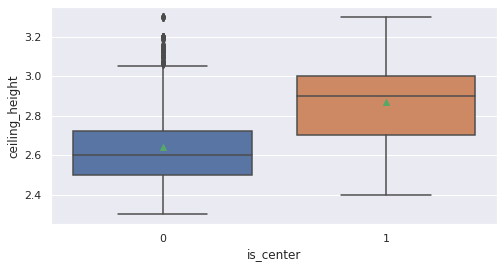

In [266]:
sns.boxplot(data=data_spb_ceiling_height_no_outliers, y='ceiling_height', x='is_center', showmeans=True);

Хорошо заметны различия. Для квартир в центре среднея высота потолков составляет 2,9 м, в то время как для осатльных квартир - 2,6 м.  
50% квартир в центре имеют высоту потолков 2,7 - 3 метра, в то время как для остальных квартир Санкт-Петербурга эти значения составляют 2,5 - 2,72 метра.

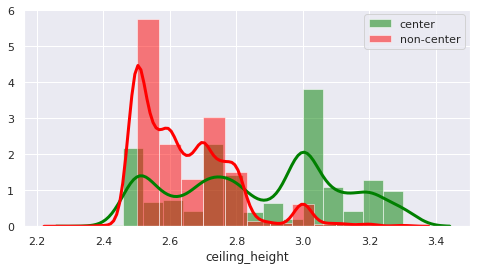

In [267]:
pair_hist(data_spb_ceiling_height_no_outliers, 'ceiling_height', bins=15)

На гистограмме можно заметить, что распределение значений высоты потолков для каждой из локаций имеет три пика (в районе 2,5м, 2,7м, 3м).  
Возможно, квартиры, представленные в датасете объеденены по какому-то признаку, и для каждой категории характерна определенная высота.  Либо же эти высоты просто являются стандартами для высоты квартирных потолков, и значения которые лежат между ними встречаются гораздо реже, и их можно охарактеризовать как "нестандартная высота". 
При этом видно, что для квартир в центре характерны более высокие потолки.

Попробуем разделить данные на меньшее число корзины, например на 4.

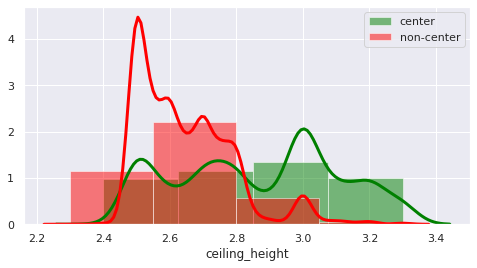

In [268]:
pair_hist(data_spb_ceiling_height_no_outliers, 'ceiling_height', bins=4)

В таком разрезе гистограмма чуть больше напоминает форму нормального распределения.  

**Краткое резюме**

Средняя высота потолков квартир, расположенных в центре Санкт-Петербурга больше нежели высота потолков в остальных квартирах (2,9м против 2,6м).  
В центре преобладают кватриры с более высокими потолками, нежели в других районах города.

### Выделим факторы, которые влияют на стоимость квартиры.

В ходе анализа будет изучено влияние на цену следующих параметров: 
- Число комнат
- Этаж
- Удалённость от центра
- Дата размещения объявления

#### Влияние числа комнат на цену квартиры

In [269]:
data_spb_rooms_last_price_no_outliers = data_spb.query('@min_thresh_spb_rooms < rooms < @max_thresh_spb_rooms and @min_thresh_spb_last_price < last_price < @max_thresh_spb_last_price')

print('data_spb_rooms_last_price_no_outliers содержит', 
      round(data_spb_rooms_last_price_no_outliers.shape[0] / data_spb.shape[0], 2)*100, 
      'процент от общего числа объектов выгрузки по Санкт-Петербургу')

data_spb_rooms_last_price_no_outliers содержит 91.0 процент от общего числа объектов выгрузки по Санкт-Петербургу


Посмотрим как распределена цена квартир для каждого значения столбца `rooms` в разрезе недвижимости в центре и за ее пределами.

In [270]:
#создадим сортированный список уникальных значений столбца rooms.

unique_num_of_rooms = sorted(list(data_spb_rooms_last_price_no_outliers.rooms.unique()))

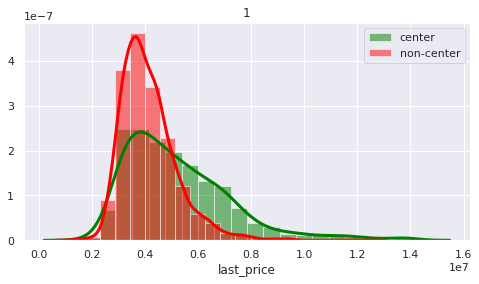

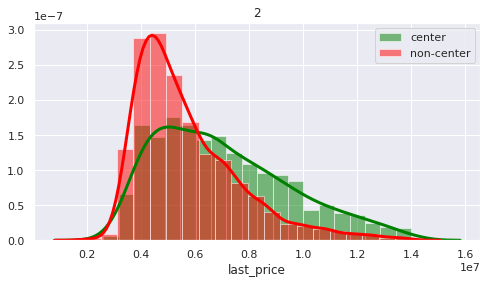

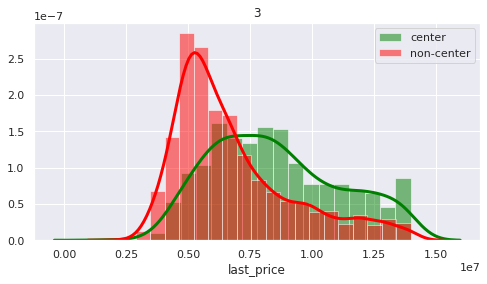

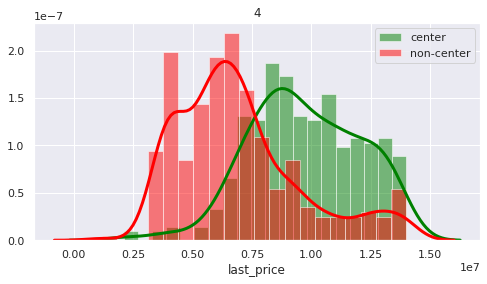

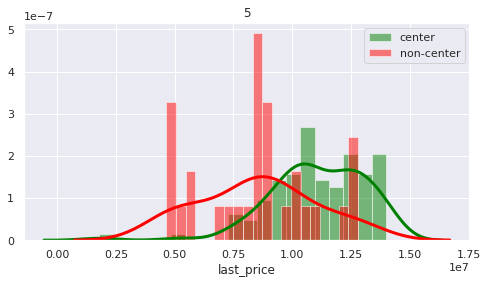

In [271]:
for num in unique_num_of_rooms:
    pair_hist(data_spb_rooms_last_price_no_outliers.query('rooms == @num'), 'last_price', title=num)

По графику видно, что в срднем цена для квартир в центре немного выше, нежели для квартир в остальной части города.  
При этом с увеличением числа комнат, пики гистограмм плавно смещаются вправо. Это может говорить о том, что с увеличением комнат в квартире, цена на нее растет.  
При этом важно также обратить внимание на последнюю гистограммму. Можно заметить, что гистограмма, постоенная для квартир вне центра города разрежена, что говорит о том, что среди таковых можно встретить наличие 5-и комнат гораздо реже, нежели в квартирах в центре города.

Посмотрим на график разброса.

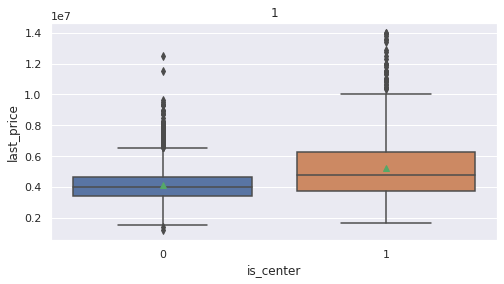

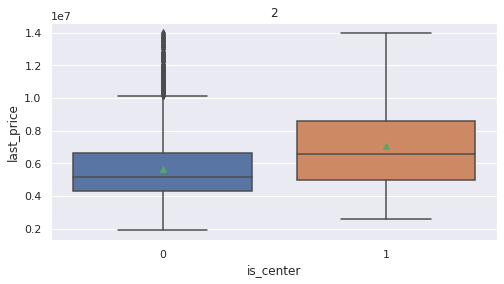

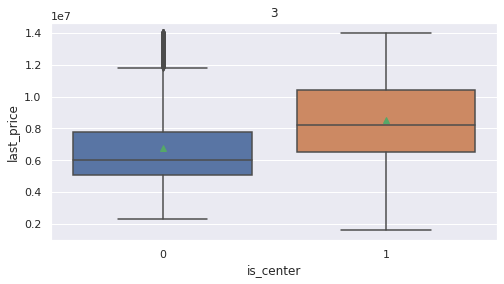

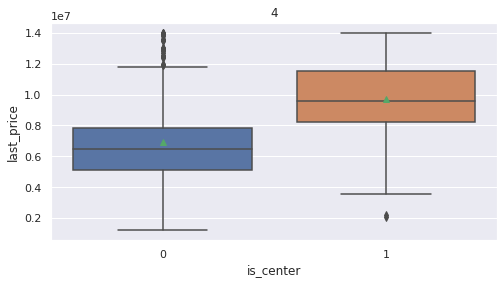

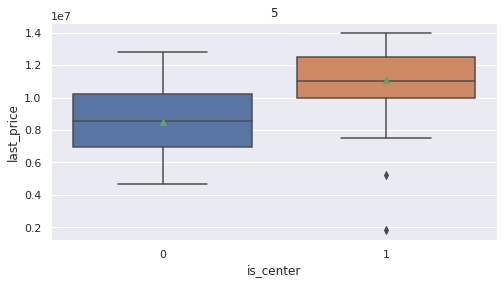

In [272]:
for num in unique_num_of_rooms:
    sns.boxplot(data=data_spb_rooms_last_price_no_outliers.query('rooms == @num'), y='last_price', x='is_center', showmeans=True).set_title(num)
    plt.show()

На графике разброса также видно, что цена с увеличением комнат растет для обоих сегментов квартир.

Чтобы пронаблюдать, с одинаковой ли скоростью растет цена для обоих сегментов квартир с увеличением комнат, создадим сводную таблицу, в которой вычислим медианную стоимость квартир для каждого количества комнат. Затем на основании этой таблицы построим график.

In [273]:
pivot_spb_rooms_last_price = data_spb_rooms_last_price_no_outliers.pivot_table(index='rooms', 
                                                                               columns='is_center', 
                                                                               values='last_price', 
                                                                               aggfunc='median')
pivot_spb_rooms_last_price.columns = ['price_non_center', 'price_center']
pivot_spb_rooms_last_price

price_non_center  price_center
rooms                                
1               3970000       4800000
2               5200000       6600000
3               6000000       8200000
4               6500000       9600000
5               8550000      10995000

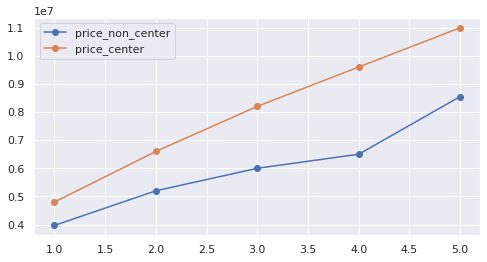

In [274]:
fig, ax = plt.subplots()
ax.plot(pivot_spb_rooms_last_price, marker='o')
ax.legend(pivot_spb_rooms_last_price.columns);

На графике видно, что в центре средняя цена квартир равномерно увеличивается с увеличением комнат, в то время как для квартир в остальной части города характерен меньший темп роста цены, и резкий скачок стоимости при переходе от 4-х к 5-и комнатной квартире.

***Краткое резюме**

Как влияет количество комнат на цену квартир в центре, и в остальной части города.  
- В центре: Цена постепенно возрастает с увеличением количества комнат.
- Вне центра: Цена с увеличением количества комнат возрастает медленнее, нежели в центре, однако при переходе от 4-х комнатной к 5-комнатной квартире, цена демонстрирует более резкий скачок.

#### Влияние этажа на цену квартиры

Рассмотрим, зависит ли цена квартиры от этажа, на котором она расположена (Firts, Last, Other) и различается ли эта зависимость для двух локаций (центр, не-центр)

Посмотрим, как распределена цена для каждой из категорий этажей

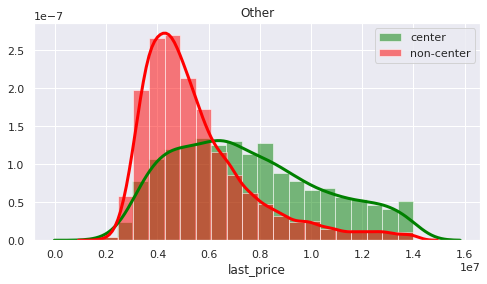

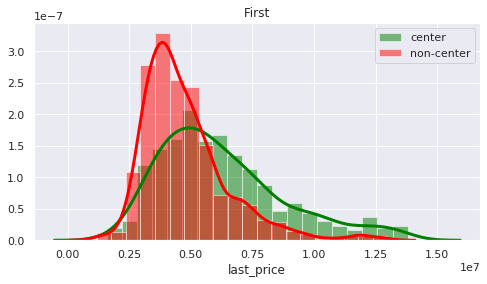

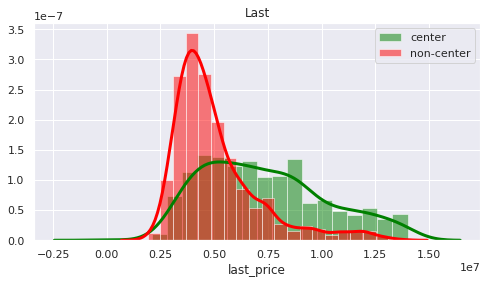

In [275]:
for floor_cat in data_spb_last_price_no_outliers.query('floor_cat != "Unknown"').floor_cat.unique():
    pair_hist(data_spb_last_price_no_outliers.query('floor_cat == @floor_cat'), 'last_price', title=floor_cat)

В целом, гистограммы напоминают форму нормального распределения, с тем лишь отличем, что для квартир в центре характерна более сглаженная форма пика. Это свойство мы уже встречали, когда рассматривали распределение цен в двух зонах города в целом. Для распределения цен по каждому из этажей это свойство сохранилось, поэтому не будем заостарять на этом внимание. 

Проверим, одинаковое ли соотношение предложения на квартиры по годам. (Чтобы исключить вариант искажения средней цены в результате того, что в какой-то из годов, для которого была характерна в среднем большая или меньшая стоимость на квартиры было выложено большее или меньшее количество объявлений с определенным этажом)

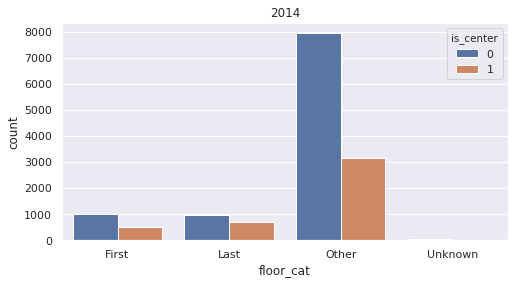

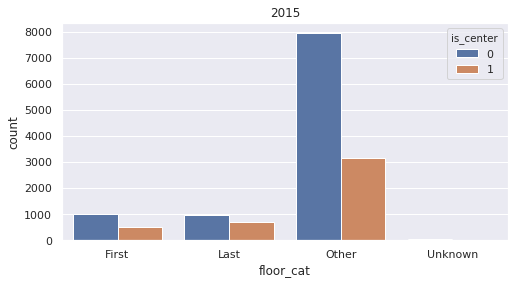

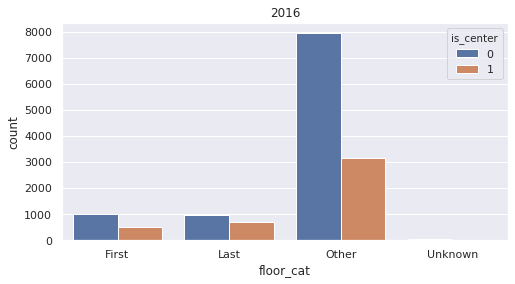

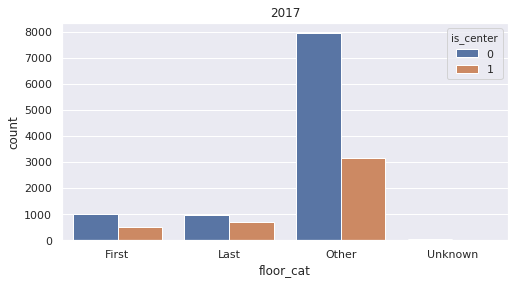

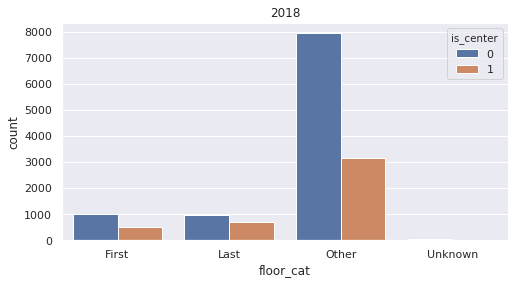

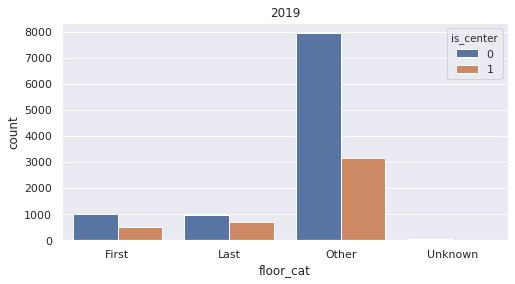

In [276]:
for year in sorted(list(data_spb_last_price_no_outliers.year_first_exp.unique())):
    sns.countplot(data=data_spb_last_price_no_outliers, x='floor_cat', hue='is_center').set_title(year);
    plt.show()

В целом соотношения предложения по годам одинаковое.  
Можно также заметить, что для квартир вне центра количество выставленных на продажу квартир на первом и последних этажах сопадает, в то время как для квартир в центре предложение квартир на последних этажах незначительно превышает предложение квартир на первых.

Построим график, и проанализируем зависимость категории этажа на цену квартир для центра и не-центра. В данном случае обойдемся без построения сводной таблицы.

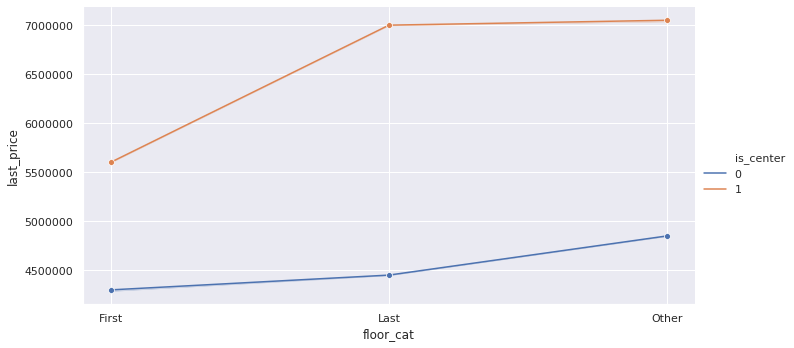

In [277]:
sns.relplot(data=data_spb_last_price_no_outliers.query('floor_cat != "Unknown" and 2015 <= year_first_exp <= 2018'), 
            x='floor_cat', 
            y='last_price', 
            hue='is_center', 
            kind='line',
            legend='full',
            aspect=2,
            estimator=np.median,
            ci=False,
            marker='o');

Можно заметить, что и для обоих категорий квартир стоимость цена зависит от этажа. Последний жтаж дороже первого, в то время как этаж "другое" дороже двух предыдущих.  
Однако для квартир вне центра стомиость от категории к категории увеличивается плавно, в то время как для квартир в центре характерен более высокий перепад цен между квартирами на первом и последнем этаже. Цена "иного" этажа отличается от цены последнего незначительно.  
Можно предположить, что квартиры, расположенные в центре города на последних этажах обладают большей привлекательностью. 

**Краткое резюме**

- В центре предложение квартир на последних этажах незначительно превышает предложение квартир на первых, в то время как для вкартир вне центра предложение на превых и последних этажах приблизительно находится на одном уровне.  
- Цена для обоих локаций зависит от этажа. Квартиры на последнем этаже стоят дороже, нежели квартиры на первом, а цена квартир на "ином" этаже превышает значение двух предыдущих категорий.  
- При этом, есть разница в перепаде цен. Для квартир в центре характерен больший перепад цены между первым и последним этажом, и соверщенно незначительнйый между ценой последнего и "иного" этажа. В то время как для квартир вне центра характерен более плавный рост цены, и незначительно более высокий перепад между ценой последнего и "иного этажа".

#### Влияние удаленности от центра на цену квартиры

Посмотрим как распределены значения удаленности от центра для объектов, расположенных в центральной зоне и за ее пределами.

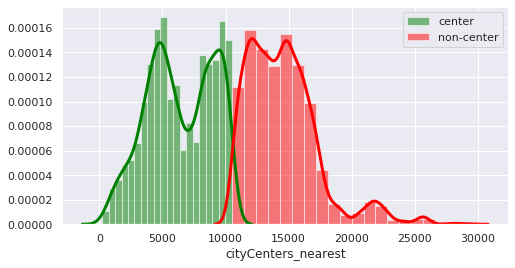

In [278]:
pair_hist(data_spb_last_price_no_outliers, 'cityCenters_nearest')

На общей гистограмме вновь видим 3 пика. Первые два пика приходятся на центральную зону, третий - на не-центр.  
Видимо в центре города есть 2 жилые зоны, в которых продавались квартиры. Эти зоны были расположены примерно на расстонии 5000 и 10000 метров от центра. Возможно, это какие-то зоны с новостройками, в которых большее количество предложений, нежели в других зонах.  
Для остальных объектов такая зона находится примерно на расстоянии 15000 м от центра города.

Построим график изменения цены в зависимости от отдаленности от центра для двух рассматриваемых районов Санкт-Петербурга, и посмотрим как имзеняется цена на квартиры в этих двух зонах. 

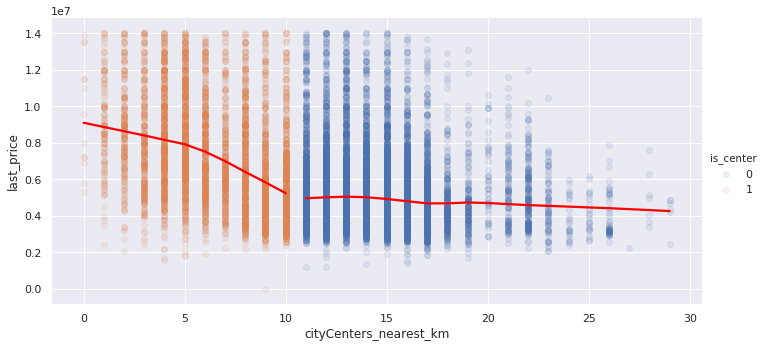

In [279]:
sns.lmplot(data=data_spb_last_price_no_outliers,
               x='cityCenters_nearest_km',
               y='last_price', 
               hue='is_center',
               lowess=True, aspect=2,
               scatter_kws={'alpha':0.1},
               line_kws={'color': 'red'});

На графике заметно, что при приближении к центру города цена растет.  
Однако для объектов, расположенных вне центра Санкт-Петербурга цена растет в горазда более медленном темпе, нежели для обхектов расположенных в центре. Темп роста цены при приближению к центру города практически в 2 раза выше у квартир в центре, нежели у квартир в остальной части города.

**Краткое резюме**

- Цена на квартиры в Санкт-Петербурге зависит от удаленности от центра.  
- Для квартир, расположенных в центре характерен более стремительный рост цены по мере приближения к центру, нежели для квартир, расположенных в остальной части города.

#### Влияние даты размещения на цену квартиры

В процессе анализа, изучим:  
- Влияние года размещения на цену квартир в Санкт-Петербурге (в цетральной части города и вне)
- Влияние месяца размещения на цену квартир в Санкт-Петербурге (в цетральной части города и вне)
- Влияние дня недели размещения на цену квартир в Санкт-Петербурге (в цетральной части города и вне)

Посмотрим количество размещений по годам и месяцам для Санкт-Петербурга, чтобы отобрать года для анализа.

In [280]:
data_spb_last_price_no_outliers.pivot_table(index='year_first_exp', 
                                            columns='month_first_exp', 
                                            values='last_price', 
                                            aggfunc='count')

month_first_exp     1      2      3      4      5      6      7      8   \
year_first_exp                                                            
2014               NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
2015              29.0   38.0   74.0   30.0   36.0   53.0   57.0   58.0   
2016              71.0  149.0  214.0  242.0  253.0  290.0   95.0   54.0   
2017             166.0  274.0  135.0  422.0  364.0  411.0  375.0  489.0   
2018             312.0  768.0  570.0  182.0   99.0  290.0  528.0  501.0   
2019             254.0  354.0  540.0  613.0   31.0    NaN    NaN    NaN   

month_first_exp     9      10     11     12  
year_first_exp                               
2014               NaN    NaN   11.0   55.0  
2015              58.0   92.0  106.0   94.0  
2016              79.0   86.0   83.0   79.0  
2017             623.0  569.0  739.0  499.0  
2018             450.0  583.0  493.0  209.0  
2019               NaN    NaN    NaN    NaN

Видим, что за 2014 и 2019 года недостаточно данных. Проведем анализ, основывая на 2015 - 2018 годах.

Создадим срез данных за 2014 - 2019 года.

In [281]:
data_spb_last_price_no_outliers_4_years = data_spb_last_price_no_outliers.query(
    '2015 <= year_first_exp <= 2018')

1. Изучим влияние года размещения на цену квартир в Санкт-Петербурге.

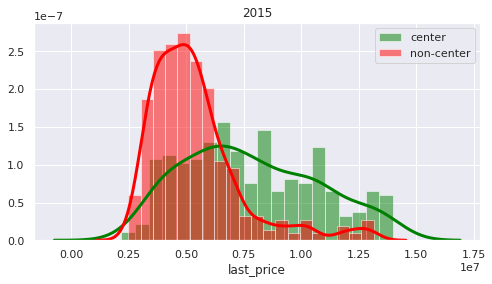

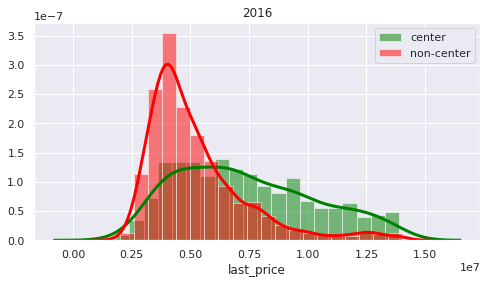

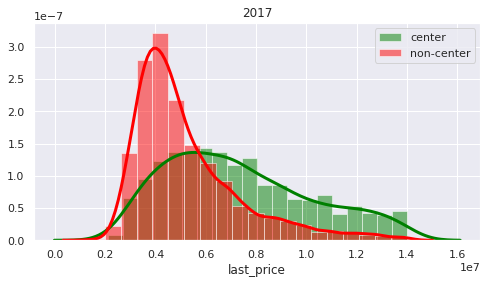

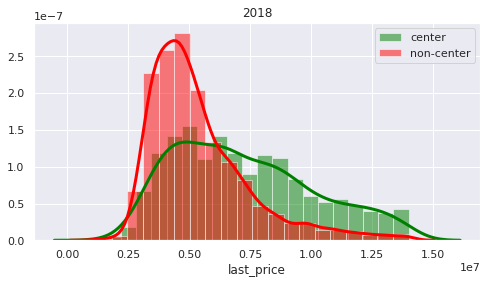

In [282]:
for year_exp, data_grouped in data_spb_last_price_no_outliers_4_years.groupby('year_first_exp'):
    pair_hist(data_grouped, 'last_price', title=year_exp)

Форма распределения цены по годам напоминает форму распределения цены для всех объектов недвидимости в целом. С данными все в порядке.

Построим график, на котором отобразим изменение цены на объекты недвижимости по годам.

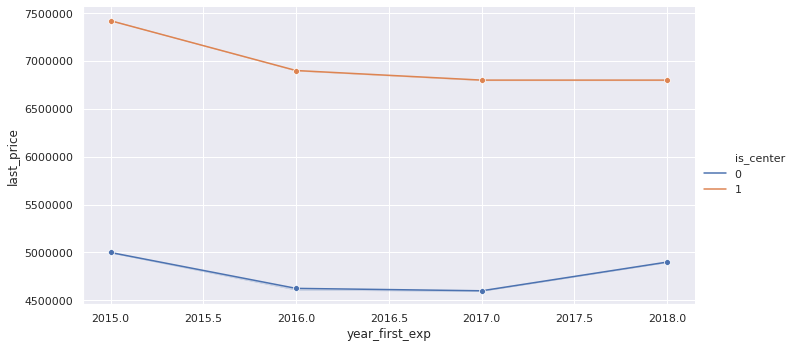

In [283]:
sns.relplot(data=data_spb_last_price_no_outliers_4_years, 
            x='year_first_exp', 
            y='last_price', 
            hue='is_center', 
            kind='line',
            legend='full',
            aspect=2,
            estimator=np.median,
            ci=False,
            marker='o');

По графику можно заметить, что **стоимость действителньно менялась от года к году в обоих категориях квартир.**  
Отличие состоит лишь в том, что квартиры вне центра выросли в цене с 2017 по 2018 год, в то время как цена на квартиры в центре в этот период времени не показала праткически никакой динамики. Также, можно заметить, что стоимость квартир в центре в период 2015-2016 снизилась незначительно сильнее чем для квартир вне центра

2. Изучим влияние месяца размещения на цену квартир в Санкт-Петербурге.

Построим гистограмму распределения цены по месяцам.

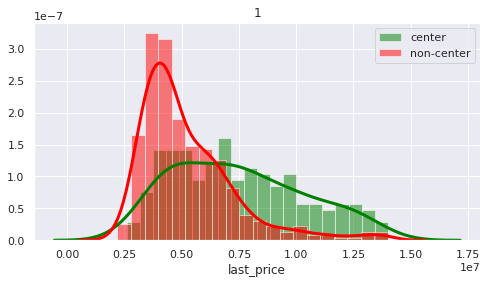

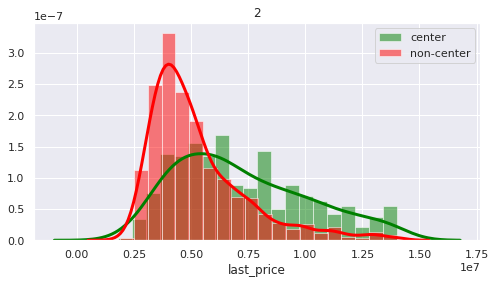

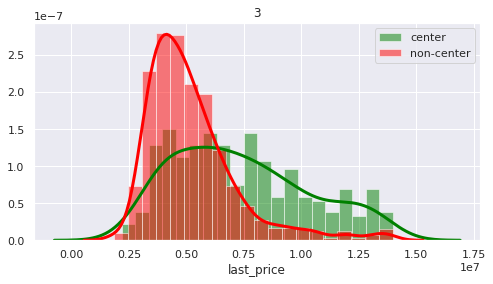

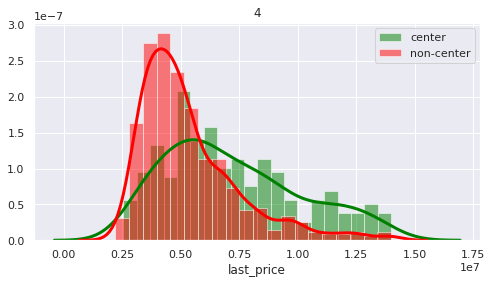

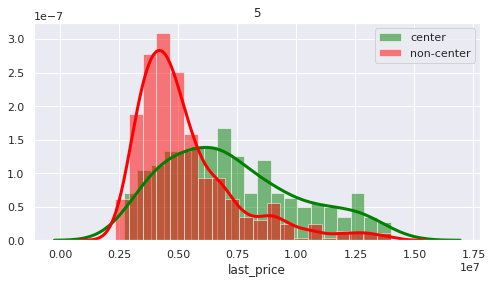

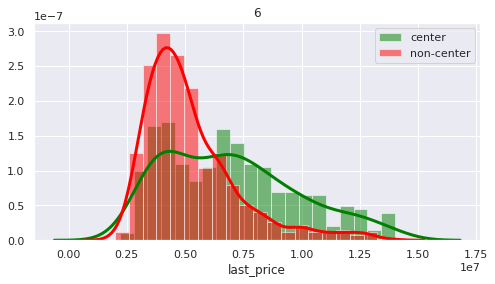

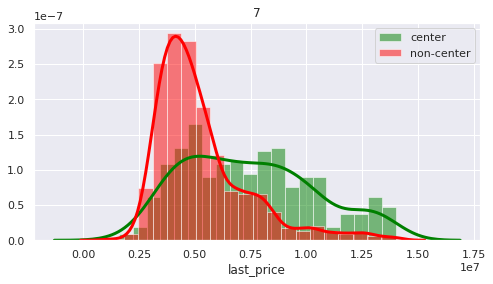

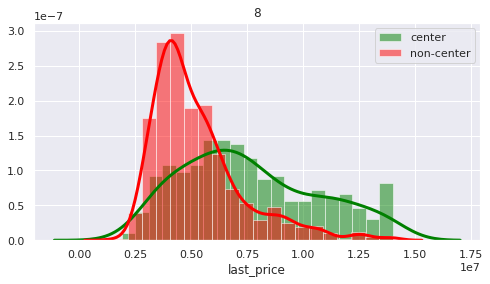

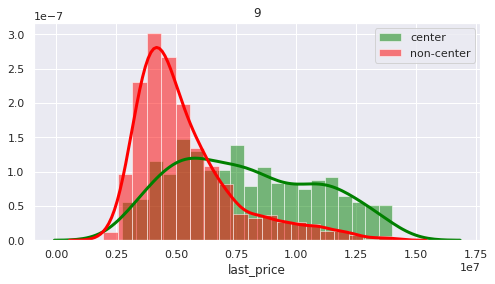

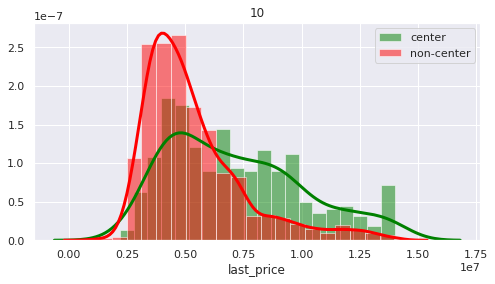

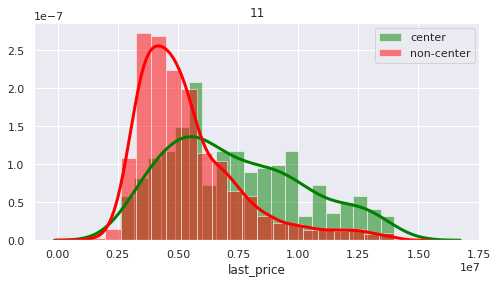

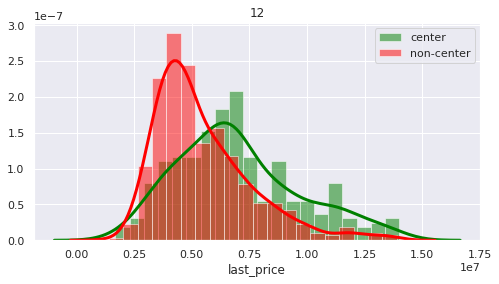

In [284]:
for month_exp, data_grouped in data_spb_last_price_no_outliers_4_years.groupby('month_first_exp'):
    pair_hist(data_grouped, 'last_price', title=month_exp)

Форма распределения цены по годам напоминает форму распределения цены для всех объектов недвидимости в целом, аномалий не обнаружено. Можно приступать к анализу.

Построим график, на котором отобразим изменение цены на квартиры по месяцам.  
Для каждого года построим отдельный график, чтобы посмотреть, есть ли какие-либо паттерны, которые повторяются из года в год.

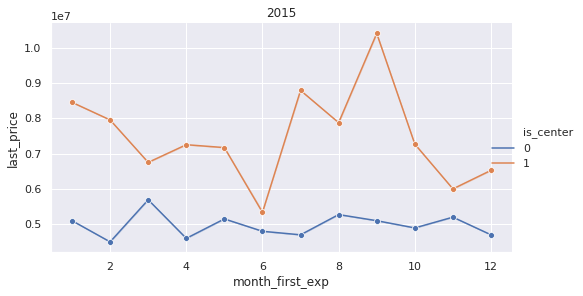

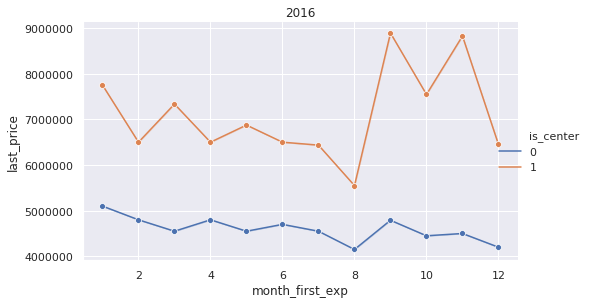

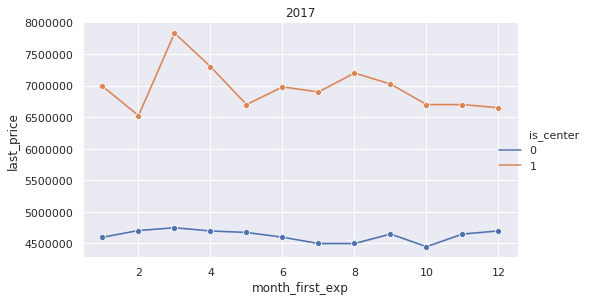

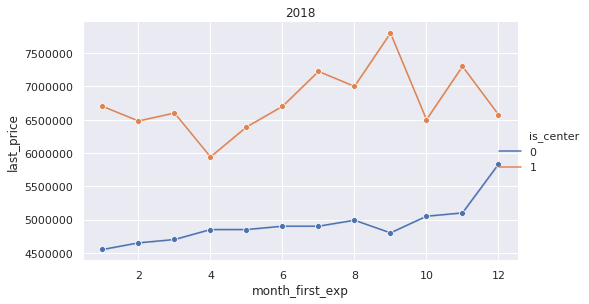

In [285]:
for month, data_grouped in data_spb_last_price_no_outliers_4_years.groupby('year_first_exp'):
    g1 = sns.relplot(data=data_grouped, 
                x='month_first_exp', 
                y='last_price', 
                hue='is_center', 
                kind='line',
                legend='full',
                aspect=2,
                estimator=np.median,
                ci=False,
                marker='o');
    plt.title(month)
    g1.fig.set_figwidth(8)
    g1.fig.set_figheight(4)

Паттернов обнаружить не удалось. Можно утверждать, что **цена не зависит от месяца размещения. Это справедливо как для квартир в центре, так и вне центра города.**

3. Изучим влияние дня недели размещения на цену квартир в Санкт-Петербурге.

Построим гистограмму распределения цены по дням недели.

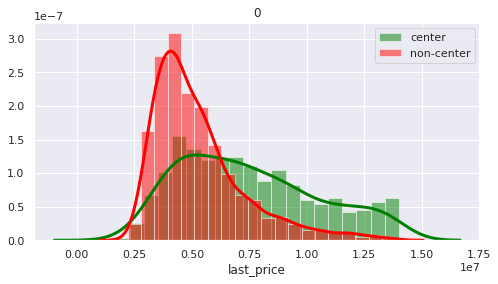

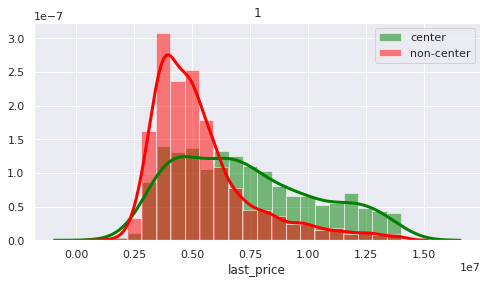

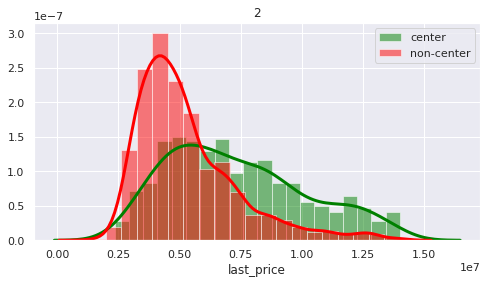

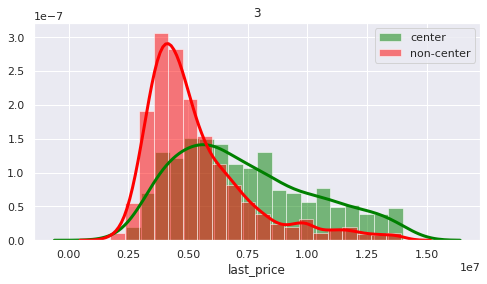

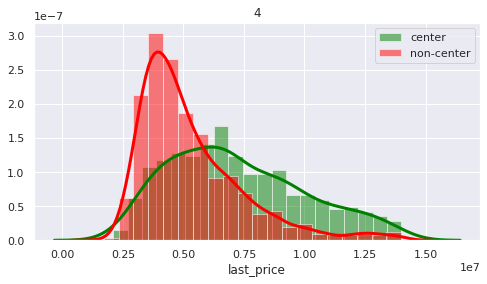

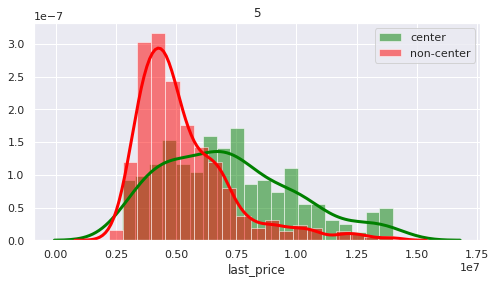

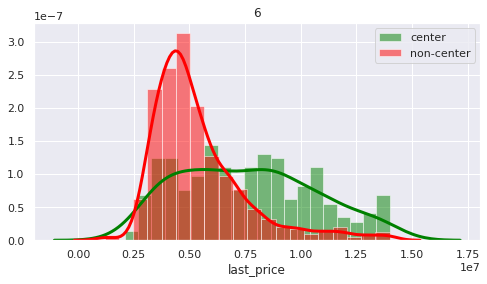

In [286]:
for dayofweek_exp, data_grouped in data_spb_last_price_no_outliers_4_years.groupby('dayofweek_first_exp'):
    pair_hist(data_grouped, 'last_price', title=dayofweek_exp)

Аномалий не обнаружено. Можно приступать к анализу.

Построим график, на котором отобразим изменение цены на квартиры по месяцам.  
Для каждого месяца построим отдельный график, чтобы посмотреть, есть ли какие-либо паттерны, которые повторяются из месяца в месяц.

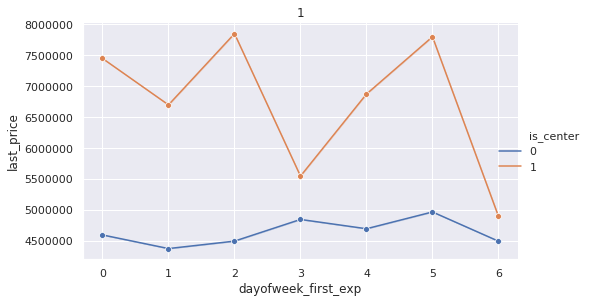

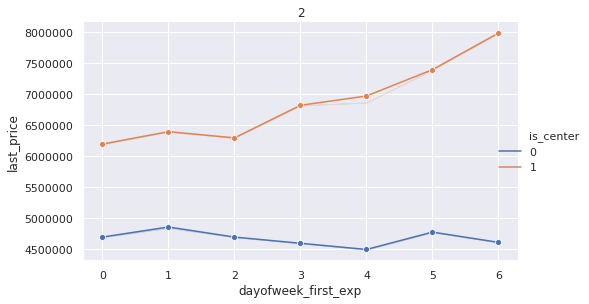

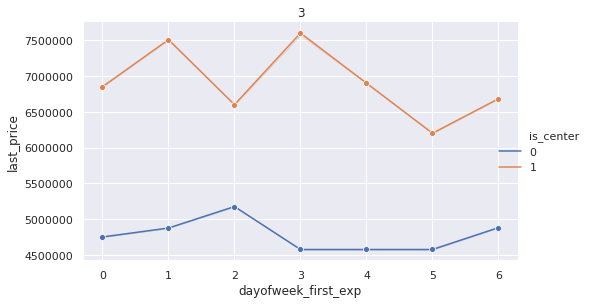

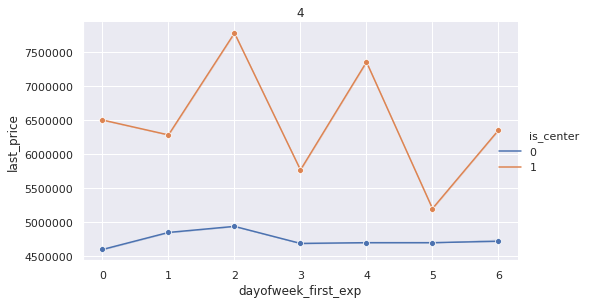

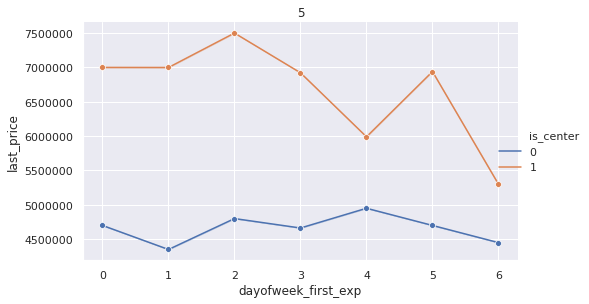

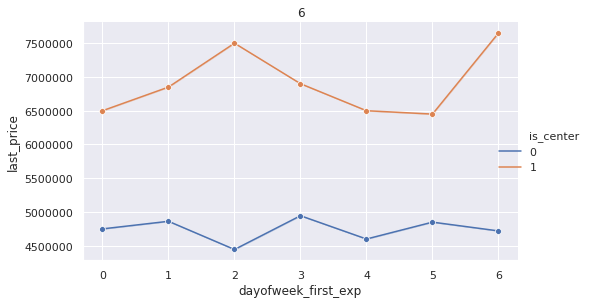

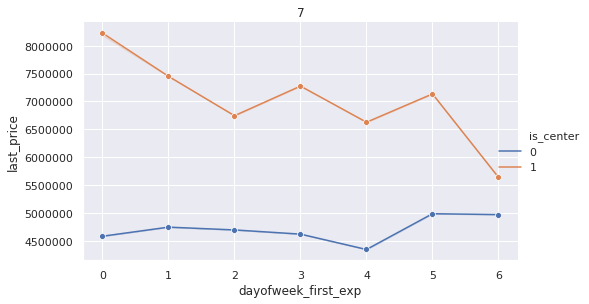

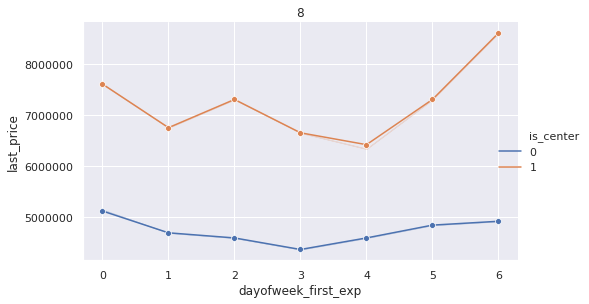

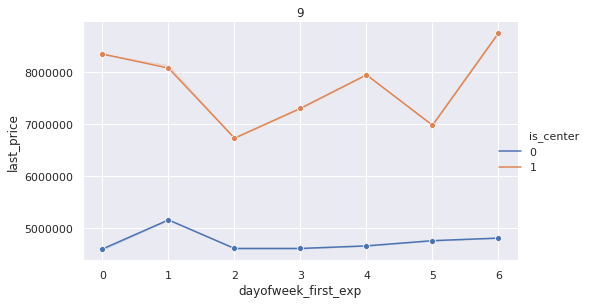

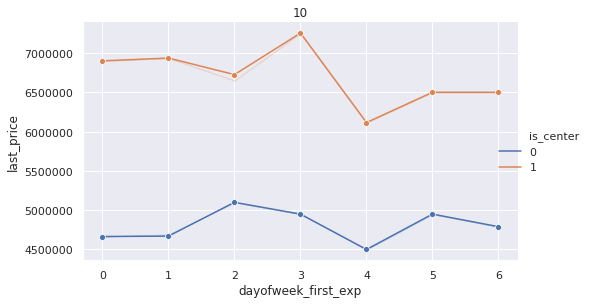

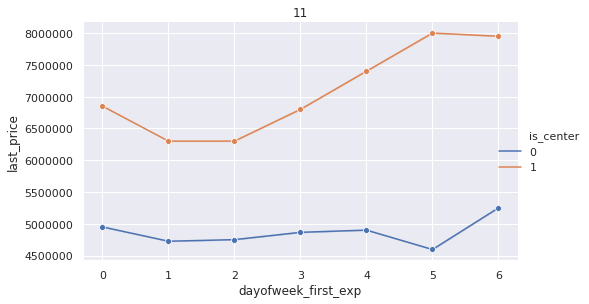

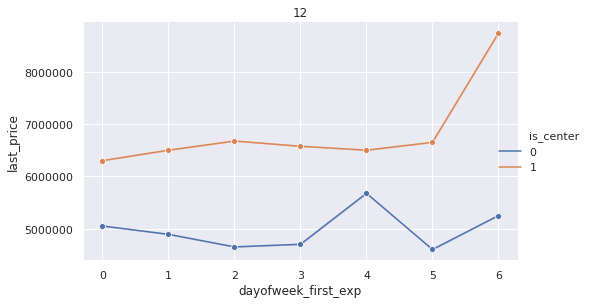

In [287]:
for dayofweek, data_grouped in data_spb_last_price_no_outliers_4_years.groupby('month_first_exp'):
    g1 = sns.relplot(data=data_grouped, 
                x='dayofweek_first_exp', 
                y='last_price', 
                hue='is_center', 
                kind='line',
                legend='full',
                aspect=2,
                estimator=np.median,
                ci=False,
                marker='o');
    plt.title(dayofweek)
    g1.fig.set_figwidth(8)
    g1.fig.set_figheight(4)

Паттерн отсутствует. Если бы стоимость зависела от дня недели, то на графике явно было бы заметно однзначное повышение или снижение цены в определенный промежутки времени внутри каждого месяца. Такого поведения мы не наблюдаем. Следовательно, можно сделать вывод, что **стоимость недвижимости не зависит от дня недели, когда было выложено объявление**. Это справедливо для обоих категорий квартир.

**Краткое резюме**

В ходе анализа, мы изучили:  
- Влияние года размещения на цену квартир в Санкт-Петербурге (в цетральной части города и вне)
- Влияние месяца размещения на цену квартир в Санкт-Петербурге (в цетральной части города и вне)
- Влияние дня недели размещения на цену квартир в Санкт-Петербурге (в цетральной части города и вне) 
  
Было выявлено, что:  
- **Цена квартир зависит от года размещения**. При этом, цена на квартиры в центре в период 2017-2018 года не показала праткически никакой динамики, в то время как средняя цена на квартиры вне центра выросла в этот период. Еще одно отличие заключалось в том, что цена квартир в центре в период 2015-2016 снижалась незначительно сильнее чем для квартир вне центра.
- **Цена квартир не зависит от месяца и дня недели размещения**. Это утверждение справдливо как для квартир в центре города, так и за пределами центра.

#### Вывод

В данном разделе мы рассмотрели влияние на цену квартир в Санкт-Петербурге следующих параметров: 
- Число комнат
- Этаж
- Удалённость от центра
- Дата размещения объявления  

А также то, насколько данное влияние на квартиры, расположенные в центре города, отличается от влияния на квартиры, расположенные за пределами центральной зоны.  
  
Было выявлено, что:   
- В центре: цена постепенно возрастает с увеличением количества комнат. Вне центра: цена с увеличением количества комнат возрастает медленнее, нежели в центре, однако при переходе от 4-х комнатной к 5-комнатной квартире, цена демонстрирует более резкий скачок.
- Цена для обоих локаций зависит от этажа. Квартиры на последнем этаже стоят дороже, нежели квартиры на первом, а цена квартир на "ином" этаже превышает значение двух предыдущих категорий. При этом, есть разница в перепаде цен. Для квартир в центре характерен больший перепад цены между первым и последним этажом, и соверщенно незначительный между ценой последнего и "иного" этажа. В то время как для квартир в остальной части города характерен более плавный рост цены, и незначительно более высокий перепад между ценой последнего и "иного этажа". Также, интересно заметить, что центре предложение квартир на последних этажах незначительно превышает предложение квартир на первых, в то время как для квартир в остальной части города предложение на первых и последних этажах приблизительно находится на одном уровне.  
- Цена как квартир, расположенных в центре, так и квартир в остальной части города зависит от удаленности от центра.При этом, есть отличия. Для квартир, расположенных в центре характерен более стремительный рост цены по мере приближения к центральной точке города, нежели для остальных квартир.

## Общий вывод

В ходе работы были предприняты следующие шаги:
- Была осуществлена предобработка данных
- Были добавлены новые признаки, рассчитанные на основании имеющихся данных
- Был произведен исследовательский анализ данных
  
В ходе предобработки данных, мы: 
- Избавились от неявных дубликатов в столбце `locality_name`
- Выявили столбцы с пропущенными значениями. Часть пропусков была заполнена. Оставшаяся часть была оставлена без измененений. Всего нам удалось сократить количество столбцов с пропусками с 14 до 9. 
- Изменили тип хранения данных в тех столбцах, для которых это было обосновано и необходимо.
  
На этапе добавления новых признаков в таблицу, были добавлены:
- Цена квадратного метра
- День недели, месяц, год размещения
- Категорию этажа квартиры (первый, последний, другой, неизвестный)
- Отношение жилой площади к общей
- Отношение площади кухни к общей площади
  
В ходе исследовательского анализа, были проделаны следующие шаги::
1. Были изучены площадь, цена, число комнат, высота потолков для объектов, представленных в выборке. Были получены следующие результаты: 
 - Средняя площадь квартир: 50 кв.м (на основании медианы). Минимальная площадь: 12 кв.м. Максимальная площадь: 900 кв.м. 94,8% объектов выборки имеют площадь в диапазоне 12.0 кв.м. - 114.8 кв.м.
 - Средняя стоимость квартир: 4,400,000 р (на основании медианы). Минимальная стоимость: 430,000 р. (с учетом очистки данных от выбросов). Максимальная стоимость квартиры: 763,000,000 р. 91,4% объектов выборки имеют стоимость в диапазоне 430,000р. - 11,900,000р.
 - Средняя количество комнат для квартиры: 2. Минимальное: 0. Максимальное: 19. 50% квартир имеют от 1-й до 3-х комнат. 99,6% квартир имеют от 1-й до 6-и комнат.
 - Средняя высота потолков: 2,64м (с учетом очистки данных от выбросов). 94,3% квартир имеют мин. и макс. высоту потолков - 2,2 и 3,2м соотвественно. 50% объектов имеют высоту потолков от 2,5м до 2,76м
 - Среднее время продажи составляет от 85 до 128 дней. Если продажа заняла менее 41 дня - можно полагать, что продажа прошла на удивление быстро. (для 91,9% данных 25% значений расположены ниже значения 41 день). Если продажа заняла более 400 дней, можно полагать что продажа действительно затянулась (на основании верхней границы интерквантильного размаха, рассчитанного для для 91,9% квартир)
2. Были изучены влияние следующих факторов на цену квартиры: число комнат, удалённость от центра, категория этажа, дата размещения. Были получены следующие результаты: 
 - Цена квартир зависит от площади. Чем больше площадь тем выше цена. Присутсвует линейная корреляция средней силы.
 - Цена квартир зависит от числа комнат. Чем больше комнат, тем в среднем выше стоимость на недвижимость.
 - Цена квартир зависит от удаленности от центра, однако зависимость нелинейна. При отдалении от центра на расстояние до 10 км цена снижается быстрее, нежели при отдалении от центра на расстояние от 10 км и далее.
 - Цена квартир зависит от того, на каком этаже она расположена. Квартиры на последнем этаже стоят дороже квартир на первом, в то время как квартиры на "ином" этаже стоят еще дороже.
 - Цена квартир зависит от года размещения объявления, однако не зависит ни от дня недели, ни от месяца размещения.
3.  Были отобраны 10 населённых пунктов с наибольшим числом объявлений. Среди них были выделены населённые пункты с самой высокой и низкой стоимостью жилья. Были получены следующие результаты:  

Город | Количество объявлений | Средняя цена за кв. метр
----- | --------------------- | ------------------------
Санкт-Петербург|13762|101887.0  
Мурино         | 590 | 86175.5  
Кудрово	| 470 | 95555.0
Шушары	| 440 |	76876.0
Всеволожск | 397 | 65789.0
Пушкин	| 339 | 98438.0
Колпино | 336| 74690.0
Парголово	| 327|	91643.0
Гатчина	| 305 | 67696.0
Выборг	| 236 |58133.0  

 - Наибольшая средняя цена кв. метра характерна для г. Санкт-Петербург и составляет: 101887.0 руб/кв.м. 
 - Наименьшая средняя цена кв. метра характерна для г. Выборг и составляет: 58133.0 руб/кв.м  

4. Следующим шагом были изучены квартиры в г. Санкт-Петербург. На основании анализа была выявлена область, которая входит в центр города: эта область располагается на расстоянии 10 км от центра включительно.  

    4.1. Для квартир, расположенных в центре г. Санкт-Петербург были изучены следующие параметры: площадь, цена, число комнат, высота потолков. Данные параметры были изучены в сравнении с соответствующими параметрами для квартир, расположенных за пределами центра города. Были получены слудующие результаты:  
    - Средняя площадь квартир в центре города: 63 кв.м. В остальной части города: 49, кв.м. 50% значений площади для квартир в центре находится в диапазоне 45,4 - 84 кв.м, в то время как для квартир в других частях города: 39,1 - 63,3 кв.м.
    - Цена квартир в центре в среднем выше, нежели за его пределами. (6,9 млн. р против 4,8 млн.р.). При этом цена квартир в центре имеет больший разброс значений, нежели у квартир за его пределами. 50%  квартир в центре имеют стоимость в диапазоне 5 - 9,3 млн.р, а 50% квартир за пределами центра: 3,9 - 6,2 млн.р.
    - Среднее количество комнат для квартир, расположеных в центре и за его пределами составляет 2 комнаты. Однако для центральной части города характерно большее количество квартир с 3-мя и большим количеством комнат, в то время как для остальной части города характерно наличие квартир с 1 - 2-мя комнатами.
    - В центре преобладают квартиры с более высокими потолками, нежели в других районах города. Средняя высота потолков квартир, расположенных в центре Санкт-Петербурга: 2,9 м. В квартирах, расположенных за его пределами: 2,6 м. 
    4.2. Следующим шагом, для квартир, расположенных в центре г. Санкт-Петербург было изучено влияние на цену следующих параметров: число комнат, этаж, удалённость от центра, дата размещения объявления. Влияние данных параметров было изучено в сравнении с влияние соответствующих параметраов на цену квартир, расположенных за пределами центра города. Были получены слудующие результаты: 
    - Цена квартир зависит от числа комнат. Для центра города характерно постепенное увеличение цены квартир с увеличением числа комнат. Для остальной части города характерен более слабый темп роста цены с увеличением количества комнат, нежели в центре, однако при переходе от 4-х комнатной к 5-комнатной квартире, цена демонстрирует более резкий скачок.
    - Цена квартир зависит от этажа. Квартиры на последнем этаже стоят дороже, нежели квартиры на первом, а цена квартир на "ином" этаже превышает значение двух предыдущих категорий. Однако есть различие. Для квартир в центре характерен больший перепад цены между первым и последним этажом, и совершенно незначительный между ценой последнего и "иного" этажа. Для квартир в остальной части города характерен меньший перепад цен между первым и последним этажами, и незначительно более высокий перепад между ценой последнего и "иного" этажа. *Важно также отметить, что центре (на протяжении 2014 -2019 гг) предложение квартир на последних этажах незначительно превышает предложение квартир на первых. Для квартир в остальной части города предложение на первых и последних этажах приблизительно находится на одном уровне.*
    - Цена квартир в Санкт-Петербурге зависит от удаленности от центра. Для квартир, расположенных в центре характерен праткически в 2 раза более стремительный рост цены по мере приближения к центральной точке города, нежели квартир, за пределами центральной зоны.